In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Vizianagaram']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
3764,4001,18.75,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Black,8.46,0.24,0.19,...,134.0,1340.0,300.0,22.99,0.26,0.25,13.79,1.39,6.48,Blackgram
3765,4002,18.76,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Sandy,4.85,0.03,0.11,...,36.0,74.0,20.0,1.61,0.22,0.13,26.18,0.56,27.57,Sandy
3766,4003,18.75,83.31,Vizianagaram,Parvathipuram,Challam Valasa,Black,6.15,0.15,0.65,...,114.0,799.0,120.0,21.11,0.47,0.31,61.89,2.58,17.93,Paddy
3767,4004,18.76,83.30,Vizianagaram,Parvathipuram,Challam Valasa,Black,5.62,0.09,0.70,...,87.0,1066.0,135.0,13.03,0.41,0.38,110.16,3.16,16.98,Paddy
3768,4005,18.75,83.32,Vizianagaram,Parvathipuram,Challam Valasa,Black,6.86,0.30,0.89,...,433.0,1899.0,297.0,28.37,1.44,0.70,84.45,4.05,47.29,Blackgram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,6.763747,0.291120,0.482342,11.691874,127.775967,1216.181263,300.458248,16.410978,0.880265,0.969328,46.068758,2.190916,33.159002
std,1.175368,0.527502,0.187164,11.915978,94.141766,745.193780,204.656147,24.794001,0.796994,0.715113,42.332614,1.178898,24.745429
min,4.770000,0.020000,0.030000,1.240000,12.000000,74.000000,10.000000,0.240000,0.120000,0.130000,2.180000,0.300000,3.150000
25%,5.635000,0.090000,0.360000,4.095000,70.500000,660.000000,134.500000,5.175000,0.470000,0.415000,12.450000,1.220000,15.880000
50%,6.830000,0.170000,0.470000,6.670000,108.000000,1066.000000,260.000000,9.870000,0.680000,0.680000,30.520000,2.000000,27.570000
75%,7.850000,0.300000,0.600000,14.810000,149.500000,1613.500000,429.000000,18.895000,0.970000,1.405000,70.660000,2.975000,40.355000
max,9.500000,8.500000,1.310000,85.240000,809.000000,4246.000000,1308.000000,328.670000,7.320000,3.740000,236.900000,7.290000,163.030000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Sandy', 'Red', 'Sandy Loam', 'Loam', 'White',
       'Sandyloam', 'Red Sandy', 'Sandy ', 'Black ', 'Sand',
       'Sandy Loam ', 'Cashewnut'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy', 'Sandy ', 'Sand', 'Red Sandy'], 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy Loam ', 'Sandyloam', 'Sandy Loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Loam', 'Loam Soil')
df = df[(df["SoilType"] != 'Cashewnut') & (df["SoilType"] != 'White')]
df.SoilType.unique()

array(['Black Soil', 'Sandy Soil', 'Red Soil', 'Sandy Loam Soil',
       'Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 149,
 'Sandy Loam Soil': 145,
 'Black Soil': 107,
 'Sandy Soil': 71,
 'Loam Soil': 17}

<BarContainer object of 5 artists>

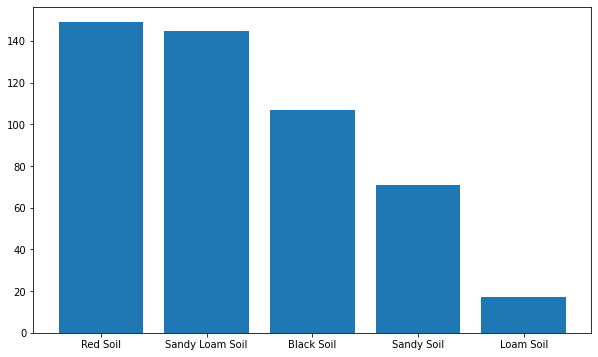

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Blackgram', 'Sandy', 'Paddy', 'Sesumum', 'Sesamum', 'Maize',
       'Black Gram', 'Mango', 'Eucaliptus', 'Cashewnut', 'Ragi',
       'Mango(Intercrop Ragi,)', 'Cashew Nut', 'Mango(Intercrop Ragi)',
       'Mango(Inter Crop Ragi)', 'Red Gram',
       'Mango (Inter Crop Red Gram And Ragi)', 'Oil Palm', 'Mesta',
       'Cashewnut, Mango (Intercrop Maize And Seasamum)', 'Paady',
       'Chilli', 'Sugarcane', 'Banana', 'Coconut', 'Ground Nut', ' Maize',
       'Coconut (Intercop Maize)', 'Cashew Raina', 'Mc', 'Cotton'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy                                              176
Maize                                              172
Sesamum                                             43
Coconut                                             26
Blackgram                                           13
Cashew Nut                                           8
Banana                                               7
Mango                                                6
Cashewnut                                            6
Ragi                                                 4
Mesta                                                3
Paady                                                3
Ground Nut                                           2
Oil Palm                                             2
Mango(Inter Crop Ragi)                               2
Sandy                                                1
Cotton                                               1
Black Gram                                           1
Cashewnut,

Paddy        179
Maize        173
Sesamum       44
Coconut       27
CashewNut     15
BlackGram     14
Mango         12
Name: Crop, dtype: int64


<BarContainer object of 7 artists>

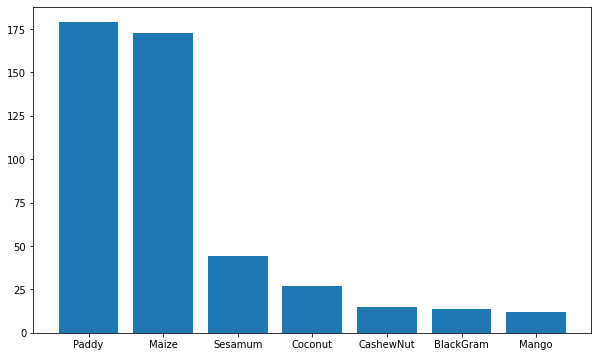

In [15]:
df['Crop'] = df['Crop'].replace(['Blackgram', 'Black Gram'], 'BlackGram')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Sesumum', 'Sesamum')
df['Crop'] = df['Crop'].replace(' Maize', 'Maize')
df['Crop'] = df['Crop'].replace(['Mango(Intercrop Ragi)', 'Mango(Intercrop Ragi,)', 'Mango(Inter Crop Ragi)', 'Mango (Inter Crop Red Gram And Ragi)', 'Cashewnut, Mango (Intercrop Maize And Seasamum)'], 'Mango')
df['Crop'] = df['Crop'].replace(['Cashewnut', 'Cashew Nut', 'Cashew Raina'], 'CashewNut')
df['Crop'] = df['Crop'].replace('Coconut (Intercop Maize)', 'Coconut')
df = df[(df['Crop'] != 'Sandy') & (df['Crop'] != 'Eucaliptus') & (df['Crop'] != 'Mc') & (df['Crop'] != 'Mesta') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Red Gram') & (df['Crop'] != 'Oil Palm') & (df['Crop'] != 'Ragi') & (df['Crop'] != 'Sugarcane') & (df['Crop'] != 'Cotton') & (df['Crop'] != 'Ground Nut')]
df = df[df['Crop'] != 'Banana']

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.281542,0.035015,0.398014,0.317697,0.545172,0.674187,0.252758,0.186213,0.669005,-0.669751,-0.246604,-0.343555
EC,0.281542,1.000000,0.235520,0.346411,0.304910,0.243800,0.491103,0.846380,0.314124,0.349722,-0.146395,0.048183,-0.054909
OC,0.035015,0.235520,1.000000,0.193455,0.228135,0.422226,0.363388,0.354167,0.273680,0.292924,0.337670,0.696471,0.062055
P,0.398014,0.346411,0.193455,1.000000,0.463098,0.172051,0.389330,0.380022,0.612654,0.477513,-0.123186,-0.011556,-0.109731
K,0.317697,0.304910,0.228135,0.463098,1.000000,0.266066,0.345684,0.280814,0.352003,0.335616,-0.248655,-0.081370,0.065889
Ca,0.545172,0.243800,0.422226,0.172051,0.266066,1.000000,0.779671,0.307892,0.024606,0.458529,-0.174735,0.284958,-0.212633
Mg,0.674187,0.491103,0.363388,0.389330,0.345684,0.779671,1.000000,0.478890,0.139498,0.739764,-0.319765,0.154586,-0.228722
S,0.252758,0.846380,0.354167,0.380022,0.280814,0.307892,0.478890,1.000000,0.301916,0.400227,-0.029385,0.196379,-0.060452
Zn,0.186213,0.314124,0.273680,0.612654,0.352003,0.024606,0.139498,0.301916,1.000000,0.173359,-0.006438,0.089369,0.105286
B,0.669005,0.349722,0.292924,0.477513,0.335616,0.458529,0.739764,0.400227,0.173359,1.000000,-0.330251,0.070365,-0.320651


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Fe', 'Mn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P      K     Fe    Mn  Black Soil  Loam Soil  \
3764  8.46  0.24  0.19  2.41  134.0  13.79  6.48           1          0   

      Red Soil  Sandy Loam Soil  Sandy Soil  
3764         0                0           0  
3764    BlackGram
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:7] = sc1.fit_transform(X[:, 0:7])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [23]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [25]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [26]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [27]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [28]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7929936305732485


In [29]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 78.17 %
Standard Deviation: 3.15 %


# Decision Tree Classifier

In [30]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [32]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7292993630573248


In [33]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.61 %
Standard Deviation: 3.63 %


# Random Forest Classifier

In [34]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [36]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8503184713375797


In [37]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.13 %
Standard Deviation: 2.91 %


In [38]:
pickle.dump(clf3_3, open('Vizianagaram_model.pkl', 'wb'))
pickle.dump(sc2, open('Vizianagaram_scaler.pkl', 'wb'))

# XGBoost

In [39]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [40]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [41]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8439490445859873


In [42]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [43]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.02 %
Standard Deviation: 3.22 %


# Multi-layer Perceptron Classifier

In [44]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [45]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [46]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.805111821086262
Testing Accuracy:  0.7611464968152867


In [47]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.55 %
Standard Deviation: 3.22 %


# Catboost

In [48]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.4356006	total: 140ms	remaining: 13.9s
1:	learn: 1.2331542	total: 142ms	remaining: 6.94s
2:	learn: 1.1457053	total: 143ms	remaining: 4.62s
3:	learn: 1.0523980	total: 144ms	remaining: 3.46s
4:	learn: 1.0074813	total: 145ms	remaining: 2.76s
5:	learn: 0.9559438	total: 147ms	remaining: 2.3s
6:	learn: 0.8979502	total: 148ms	remaining: 1.97s
7:	learn: 0.8477222	total: 150ms	remaining: 1.73s
8:	learn: 0.8032481	total: 151ms	remaining: 1.53s
9:	learn: 0.7764138	total: 153ms	remaining: 1.37s
10:	learn: 0.7451687	total: 154ms	remaining: 1.25s
11:	learn: 0.7216857	total: 155ms	remaining: 1.14s
12:	learn: 0.7103179	total: 157ms	remaining: 1.05s
13:	learn: 0.6931107	total: 158ms	remaining: 972ms
14:	learn: 0.6756363	total: 160ms	remaining: 904ms
15:	learn: 0.6563794	total: 161ms	remaining: 844ms
16:	learn: 0.6440854	total: 162ms	remaining: 791ms
17:	learn: 0.6387353	total: 163ms	remaining: 743ms
18:	learn: 0.6352835	total: 164ms	remaining: 701ms
19:	learn: 0.6118634	total: 166ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.044384706
bestIteration = 99

Training on fold [1/5]

bestTest = 1.009739612
bestIteration = 99

Training on fold [2/5]

bestTest = 1.090602067
bestIteration = 99

Training on fold [3/5]

bestTest = 1.021706702
bestIteration = 99

Training on fold [4/5]

bestTest = 1.04907434
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.8969773	test: 1.8992173	best: 1.8992173 (0)	total: 2.76ms	remaining: 2.76s
1:	learn: 1.8504826	test: 1.8545080	best: 1.8545080 (1)	total: 5.21ms	remaining: 2.6s
2:	learn: 1.8090951	test: 1.8153065	best: 1.8153065 (2)	total: 7.52ms	remaining: 2.5s
3:	learn: 1.7790751	test: 1.7830238	best: 1.7830238 (3)	total: 9.9ms	remaining: 2.47s
4:	learn: 1.7444335	test: 1.7476660	best: 1.7476660 (4)	total: 12.5ms	remaining: 2.48s
5:	learn: 1.7098470	test: 1.7157266	best: 1.7157266 (5)	total: 14.8ms	remaining: 2.46s
6:	learn: 1.6765137	test: 1.6836081	best: 1.6836081 (6)	total: 17.3ms	remaining: 2.45s
7:	learn: 1.6441152	test: 1.6535292	best: 1.6535292 (7)	total: 19.6ms	remaining: 2.42s
8:	learn: 1.6137704	test: 1.6236880	best: 1.6236880 (8)	total: 21.9ms	remaining: 2.41s
9:	learn: 1.5844996	test: 1.5969067	best: 1.5969067 (9)	total: 24.4ms	remaining: 2.42s
10:	learn: 1.5611349	test: 1.5742395	best: 1.5742395 (10)	total: 26.7ms	remaining: 2.4s
11:	learn: 1.5363691	test: 1.5496106	best: 1.

111:	learn: 0.7894937	test: 0.8606739	best: 0.8606739 (111)	total: 288ms	remaining: 2.28s
112:	learn: 0.7870190	test: 0.8584390	best: 0.8584390 (112)	total: 290ms	remaining: 2.28s
113:	learn: 0.7837601	test: 0.8552826	best: 0.8552826 (113)	total: 293ms	remaining: 2.27s
114:	learn: 0.7814265	test: 0.8530462	best: 0.8530462 (114)	total: 295ms	remaining: 2.27s
115:	learn: 0.7781506	test: 0.8499466	best: 0.8499466 (115)	total: 297ms	remaining: 2.27s
116:	learn: 0.7752456	test: 0.8479626	best: 0.8479626 (116)	total: 300ms	remaining: 2.26s
117:	learn: 0.7728352	test: 0.8460975	best: 0.8460975 (117)	total: 302ms	remaining: 2.26s
118:	learn: 0.7701779	test: 0.8435410	best: 0.8435410 (118)	total: 305ms	remaining: 2.26s
119:	learn: 0.7676362	test: 0.8415553	best: 0.8415553 (119)	total: 307ms	remaining: 2.25s
120:	learn: 0.7655808	test: 0.8394932	best: 0.8394932 (120)	total: 310ms	remaining: 2.25s
121:	learn: 0.7638421	test: 0.8379800	best: 0.8379800 (121)	total: 313ms	remaining: 2.25s
122:	learn

205:	learn: 0.6339455	test: 0.7311919	best: 0.7311919 (205)	total: 536ms	remaining: 2.06s
206:	learn: 0.6323558	test: 0.7301027	best: 0.7301027 (206)	total: 539ms	remaining: 2.06s
207:	learn: 0.6314135	test: 0.7297080	best: 0.7297080 (207)	total: 542ms	remaining: 2.06s
208:	learn: 0.6302242	test: 0.7286124	best: 0.7286124 (208)	total: 545ms	remaining: 2.06s
209:	learn: 0.6295446	test: 0.7278914	best: 0.7278914 (209)	total: 547ms	remaining: 2.06s
210:	learn: 0.6286846	test: 0.7274513	best: 0.7274513 (210)	total: 550ms	remaining: 2.05s
211:	learn: 0.6277078	test: 0.7268606	best: 0.7268606 (211)	total: 552ms	remaining: 2.05s
212:	learn: 0.6262268	test: 0.7261199	best: 0.7261199 (212)	total: 555ms	remaining: 2.05s
213:	learn: 0.6253515	test: 0.7251987	best: 0.7251987 (213)	total: 557ms	remaining: 2.05s
214:	learn: 0.6240487	test: 0.7237953	best: 0.7237953 (214)	total: 560ms	remaining: 2.04s
215:	learn: 0.6224125	test: 0.7224570	best: 0.7224570 (215)	total: 563ms	remaining: 2.04s
216:	learn

299:	learn: 0.5420837	test: 0.6653194	best: 0.6653194 (299)	total: 815ms	remaining: 1.9s
300:	learn: 0.5412989	test: 0.6651249	best: 0.6651249 (300)	total: 818ms	remaining: 1.9s
301:	learn: 0.5402978	test: 0.6641850	best: 0.6641850 (301)	total: 820ms	remaining: 1.9s
302:	learn: 0.5398295	test: 0.6640254	best: 0.6640254 (302)	total: 823ms	remaining: 1.89s
303:	learn: 0.5387611	test: 0.6627865	best: 0.6627865 (303)	total: 827ms	remaining: 1.89s
304:	learn: 0.5383669	test: 0.6625219	best: 0.6625219 (304)	total: 831ms	remaining: 1.89s
305:	learn: 0.5374516	test: 0.6621397	best: 0.6621397 (305)	total: 833ms	remaining: 1.89s
306:	learn: 0.5364341	test: 0.6616806	best: 0.6616806 (306)	total: 836ms	remaining: 1.89s
307:	learn: 0.5356999	test: 0.6613680	best: 0.6613680 (307)	total: 838ms	remaining: 1.88s
308:	learn: 0.5349791	test: 0.6604688	best: 0.6604688 (308)	total: 843ms	remaining: 1.89s
309:	learn: 0.5340859	test: 0.6597452	best: 0.6597452 (309)	total: 846ms	remaining: 1.88s
310:	learn: 0

418:	learn: 0.4592717	test: 0.6082914	best: 0.6082914 (418)	total: 1.17s	remaining: 1.62s
419:	learn: 0.4589238	test: 0.6081488	best: 0.6081488 (419)	total: 1.17s	remaining: 1.62s
420:	learn: 0.4577539	test: 0.6065816	best: 0.6065816 (420)	total: 1.18s	remaining: 1.62s
421:	learn: 0.4569973	test: 0.6054679	best: 0.6054679 (421)	total: 1.18s	remaining: 1.61s
422:	learn: 0.4564502	test: 0.6048335	best: 0.6048335 (422)	total: 1.18s	remaining: 1.61s
423:	learn: 0.4556679	test: 0.6041914	best: 0.6041914 (423)	total: 1.19s	remaining: 1.61s
424:	learn: 0.4548659	test: 0.6032098	best: 0.6032098 (424)	total: 1.19s	remaining: 1.61s
425:	learn: 0.4545385	test: 0.6031344	best: 0.6031344 (425)	total: 1.19s	remaining: 1.61s
426:	learn: 0.4540738	test: 0.6027444	best: 0.6027444 (426)	total: 1.19s	remaining: 1.6s
427:	learn: 0.4533750	test: 0.6024767	best: 0.6024767 (427)	total: 1.2s	remaining: 1.6s
428:	learn: 0.4528293	test: 0.6020809	best: 0.6020809 (428)	total: 1.2s	remaining: 1.6s
429:	learn: 0.4

524:	learn: 0.4025723	test: 0.5669863	best: 0.5669863 (524)	total: 1.52s	remaining: 1.37s
525:	learn: 0.4018989	test: 0.5666024	best: 0.5666024 (525)	total: 1.52s	remaining: 1.37s
526:	learn: 0.4010737	test: 0.5659180	best: 0.5659180 (526)	total: 1.52s	remaining: 1.37s
527:	learn: 0.4007277	test: 0.5660275	best: 0.5659180 (526)	total: 1.52s	remaining: 1.36s
528:	learn: 0.4002577	test: 0.5658142	best: 0.5658142 (528)	total: 1.53s	remaining: 1.36s
529:	learn: 0.3999152	test: 0.5653524	best: 0.5653524 (529)	total: 1.53s	remaining: 1.36s
530:	learn: 0.3993301	test: 0.5650913	best: 0.5650913 (530)	total: 1.53s	remaining: 1.35s
531:	learn: 0.3985791	test: 0.5647814	best: 0.5647814 (531)	total: 1.54s	remaining: 1.35s
532:	learn: 0.3981511	test: 0.5645283	best: 0.5645283 (532)	total: 1.54s	remaining: 1.35s
533:	learn: 0.3972819	test: 0.5632902	best: 0.5632902 (533)	total: 1.54s	remaining: 1.34s
534:	learn: 0.3965891	test: 0.5631958	best: 0.5631958 (534)	total: 1.54s	remaining: 1.34s
535:	learn

652:	learn: 0.3512331	test: 0.5368817	best: 0.5368817 (652)	total: 1.88s	remaining: 998ms
653:	learn: 0.3507961	test: 0.5363805	best: 0.5363805 (653)	total: 1.88s	remaining: 996ms
654:	learn: 0.3506099	test: 0.5362390	best: 0.5362390 (654)	total: 1.89s	remaining: 993ms
655:	learn: 0.3500722	test: 0.5357171	best: 0.5357171 (655)	total: 1.89s	remaining: 991ms
656:	learn: 0.3497398	test: 0.5354860	best: 0.5354860 (656)	total: 1.89s	remaining: 989ms
657:	learn: 0.3494694	test: 0.5353753	best: 0.5353753 (657)	total: 1.9s	remaining: 986ms
658:	learn: 0.3493024	test: 0.5352227	best: 0.5352227 (658)	total: 1.9s	remaining: 983ms
659:	learn: 0.3490759	test: 0.5350536	best: 0.5350536 (659)	total: 1.9s	remaining: 980ms
660:	learn: 0.3486985	test: 0.5346366	best: 0.5346366 (660)	total: 1.9s	remaining: 976ms
661:	learn: 0.3484063	test: 0.5347915	best: 0.5346366 (660)	total: 1.91s	remaining: 973ms
662:	learn: 0.3481279	test: 0.5348326	best: 0.5346366 (660)	total: 1.91s	remaining: 970ms
663:	learn: 0.

772:	learn: 0.3159215	test: 0.5122541	best: 0.5122541 (772)	total: 2.23s	remaining: 655ms
773:	learn: 0.3155783	test: 0.5119509	best: 0.5119509 (773)	total: 2.23s	remaining: 652ms
774:	learn: 0.3151298	test: 0.5117061	best: 0.5117061 (774)	total: 2.24s	remaining: 649ms
775:	learn: 0.3147524	test: 0.5112983	best: 0.5112983 (775)	total: 2.24s	remaining: 646ms
776:	learn: 0.3143012	test: 0.5111724	best: 0.5111724 (776)	total: 2.24s	remaining: 644ms
777:	learn: 0.3139875	test: 0.5111053	best: 0.5111053 (777)	total: 2.25s	remaining: 641ms
778:	learn: 0.3138001	test: 0.5109692	best: 0.5109692 (778)	total: 2.25s	remaining: 638ms
779:	learn: 0.3132953	test: 0.5102352	best: 0.5102352 (779)	total: 2.25s	remaining: 635ms
780:	learn: 0.3130870	test: 0.5102929	best: 0.5102352 (779)	total: 2.25s	remaining: 632ms
781:	learn: 0.3125168	test: 0.5097213	best: 0.5097213 (781)	total: 2.26s	remaining: 629ms
782:	learn: 0.3121981	test: 0.5093468	best: 0.5093468 (782)	total: 2.26s	remaining: 626ms
783:	learn

903:	learn: 0.2807586	test: 0.4912288	best: 0.4912288 (903)	total: 2.59s	remaining: 275ms
904:	learn: 0.2805921	test: 0.4911185	best: 0.4911185 (904)	total: 2.59s	remaining: 272ms
905:	learn: 0.2804013	test: 0.4910339	best: 0.4910339 (905)	total: 2.59s	remaining: 269ms
906:	learn: 0.2801082	test: 0.4908375	best: 0.4908375 (906)	total: 2.6s	remaining: 266ms
907:	learn: 0.2796417	test: 0.4902983	best: 0.4902983 (907)	total: 2.6s	remaining: 264ms
908:	learn: 0.2795434	test: 0.4902430	best: 0.4902430 (908)	total: 2.6s	remaining: 261ms
909:	learn: 0.2792328	test: 0.4899807	best: 0.4899807 (909)	total: 2.61s	remaining: 258ms
910:	learn: 0.2790187	test: 0.4900597	best: 0.4899807 (909)	total: 2.61s	remaining: 255ms
911:	learn: 0.2788626	test: 0.4900095	best: 0.4899807 (909)	total: 2.61s	remaining: 252ms
912:	learn: 0.2786563	test: 0.4898495	best: 0.4898495 (912)	total: 2.61s	remaining: 249ms
913:	learn: 0.2785515	test: 0.4898593	best: 0.4898495 (912)	total: 2.62s	remaining: 246ms
914:	learn: 0

996:	learn: 0.2600524	test: 0.4790208	best: 0.4789359 (995)	total: 2.84s	remaining: 8.54ms
997:	learn: 0.2599380	test: 0.4789391	best: 0.4789359 (995)	total: 2.84s	remaining: 5.7ms
998:	learn: 0.2596481	test: 0.4788846	best: 0.4788846 (998)	total: 2.84s	remaining: 2.85ms
999:	learn: 0.2593540	test: 0.4785474	best: 0.4785474 (999)	total: 2.85s	remaining: 0us

bestTest = 0.478547419
bestIteration = 999

0:	loss: 0.4785474	best: 0.4785474 (0)	total: 3.03s	remaining: 15.2s
0:	learn: 1.7876198	test: 1.7952031	best: 1.7952031 (0)	total: 3.01ms	remaining: 3s
1:	learn: 1.6609521	test: 1.6746418	best: 1.6746418 (1)	total: 5.34ms	remaining: 2.66s
2:	learn: 1.5633960	test: 1.5824052	best: 1.5824052 (2)	total: 7.58ms	remaining: 2.52s
3:	learn: 1.4978017	test: 1.5121193	best: 1.5121193 (3)	total: 9.82ms	remaining: 2.45s
4:	learn: 1.4301107	test: 1.4442335	best: 1.4442335 (4)	total: 12.1ms	remaining: 2.41s
5:	learn: 1.3630053	test: 1.3864766	best: 1.3864766 (5)	total: 14.5ms	remaining: 2.4s
6:	learn

94:	learn: 0.5334859	test: 0.6579286	best: 0.6579286 (94)	total: 261ms	remaining: 2.49s
95:	learn: 0.5308573	test: 0.6549435	best: 0.6549435 (95)	total: 264ms	remaining: 2.49s
96:	learn: 0.5294944	test: 0.6536815	best: 0.6536815 (96)	total: 266ms	remaining: 2.48s
97:	learn: 0.5270886	test: 0.6532998	best: 0.6532998 (97)	total: 270ms	remaining: 2.48s
98:	learn: 0.5249497	test: 0.6525634	best: 0.6525634 (98)	total: 272ms	remaining: 2.48s
99:	learn: 0.5219280	test: 0.6500819	best: 0.6500819 (99)	total: 275ms	remaining: 2.48s
100:	learn: 0.5185580	test: 0.6473406	best: 0.6473406 (100)	total: 278ms	remaining: 2.47s
101:	learn: 0.5148720	test: 0.6470445	best: 0.6470445 (101)	total: 280ms	remaining: 2.47s
102:	learn: 0.5144388	test: 0.6467770	best: 0.6467770 (102)	total: 283ms	remaining: 2.46s
103:	learn: 0.5121469	test: 0.6461587	best: 0.6461587 (103)	total: 286ms	remaining: 2.46s
104:	learn: 0.5104256	test: 0.6455206	best: 0.6455206 (104)	total: 289ms	remaining: 2.46s
105:	learn: 0.5085264	

225:	learn: 0.3200945	test: 0.5182985	best: 0.5182985 (225)	total: 617ms	remaining: 2.11s
226:	learn: 0.3192464	test: 0.5172168	best: 0.5172168 (226)	total: 620ms	remaining: 2.11s
227:	learn: 0.3182655	test: 0.5163484	best: 0.5163484 (227)	total: 622ms	remaining: 2.11s
228:	learn: 0.3180174	test: 0.5159458	best: 0.5159458 (228)	total: 624ms	remaining: 2.1s
229:	learn: 0.3177278	test: 0.5155147	best: 0.5155147 (229)	total: 627ms	remaining: 2.1s
230:	learn: 0.3167072	test: 0.5149322	best: 0.5149322 (230)	total: 629ms	remaining: 2.09s
231:	learn: 0.3150152	test: 0.5133690	best: 0.5133690 (231)	total: 632ms	remaining: 2.09s
232:	learn: 0.3138750	test: 0.5125894	best: 0.5125894 (232)	total: 634ms	remaining: 2.09s
233:	learn: 0.3131755	test: 0.5120471	best: 0.5120471 (233)	total: 636ms	remaining: 2.08s
234:	learn: 0.3120171	test: 0.5119082	best: 0.5119082 (234)	total: 639ms	remaining: 2.08s
235:	learn: 0.3111442	test: 0.5108189	best: 0.5108189 (235)	total: 641ms	remaining: 2.08s
236:	learn: 

338:	learn: 0.2324609	test: 0.4657848	best: 0.4657848 (338)	total: 967ms	remaining: 1.89s
339:	learn: 0.2319892	test: 0.4655811	best: 0.4655811 (339)	total: 970ms	remaining: 1.88s
340:	learn: 0.2313328	test: 0.4656993	best: 0.4655811 (339)	total: 973ms	remaining: 1.88s
341:	learn: 0.2305561	test: 0.4649207	best: 0.4649207 (341)	total: 975ms	remaining: 1.88s
342:	learn: 0.2302935	test: 0.4650260	best: 0.4649207 (341)	total: 978ms	remaining: 1.87s
343:	learn: 0.2298292	test: 0.4649125	best: 0.4649125 (343)	total: 980ms	remaining: 1.87s
344:	learn: 0.2289668	test: 0.4647127	best: 0.4647127 (344)	total: 983ms	remaining: 1.86s
345:	learn: 0.2283329	test: 0.4645621	best: 0.4645621 (345)	total: 985ms	remaining: 1.86s
346:	learn: 0.2277339	test: 0.4649513	best: 0.4645621 (345)	total: 988ms	remaining: 1.86s
347:	learn: 0.2274889	test: 0.4647747	best: 0.4645621 (345)	total: 990ms	remaining: 1.85s
348:	learn: 0.2265849	test: 0.4634519	best: 0.4634519 (348)	total: 993ms	remaining: 1.85s
349:	learn

430:	learn: 0.1840207	test: 0.4466724	best: 0.4462589 (429)	total: 1.22s	remaining: 1.61s
431:	learn: 0.1837180	test: 0.4462448	best: 0.4462448 (431)	total: 1.22s	remaining: 1.61s
432:	learn: 0.1835856	test: 0.4459894	best: 0.4459894 (432)	total: 1.22s	remaining: 1.6s
433:	learn: 0.1833475	test: 0.4456598	best: 0.4456598 (433)	total: 1.23s	remaining: 1.6s
434:	learn: 0.1831014	test: 0.4456243	best: 0.4456243 (434)	total: 1.23s	remaining: 1.6s
435:	learn: 0.1828882	test: 0.4460239	best: 0.4456243 (434)	total: 1.23s	remaining: 1.59s
436:	learn: 0.1824052	test: 0.4461447	best: 0.4456243 (434)	total: 1.24s	remaining: 1.59s
437:	learn: 0.1815520	test: 0.4459166	best: 0.4456243 (434)	total: 1.24s	remaining: 1.59s
438:	learn: 0.1813720	test: 0.4460643	best: 0.4456243 (434)	total: 1.24s	remaining: 1.58s
439:	learn: 0.1809510	test: 0.4456987	best: 0.4456243 (434)	total: 1.25s	remaining: 1.58s
440:	learn: 0.1804785	test: 0.4453417	best: 0.4453417 (440)	total: 1.25s	remaining: 1.58s
441:	learn: 0

548:	learn: 0.1445424	test: 0.4260640	best: 0.4259453 (547)	total: 1.58s	remaining: 1.3s
549:	learn: 0.1442908	test: 0.4259256	best: 0.4259256 (549)	total: 1.58s	remaining: 1.29s
550:	learn: 0.1440527	test: 0.4257013	best: 0.4257013 (550)	total: 1.58s	remaining: 1.29s
551:	learn: 0.1438106	test: 0.4255865	best: 0.4255865 (551)	total: 1.59s	remaining: 1.29s
552:	learn: 0.1436149	test: 0.4256111	best: 0.4255865 (551)	total: 1.59s	remaining: 1.28s
553:	learn: 0.1435195	test: 0.4256687	best: 0.4255865 (551)	total: 1.59s	remaining: 1.28s
554:	learn: 0.1431528	test: 0.4251897	best: 0.4251897 (554)	total: 1.59s	remaining: 1.28s
555:	learn: 0.1427932	test: 0.4255978	best: 0.4251897 (554)	total: 1.6s	remaining: 1.27s
556:	learn: 0.1422303	test: 0.4257006	best: 0.4251897 (554)	total: 1.6s	remaining: 1.27s
557:	learn: 0.1420266	test: 0.4259081	best: 0.4251897 (554)	total: 1.6s	remaining: 1.27s
558:	learn: 0.1419132	test: 0.4258676	best: 0.4251897 (554)	total: 1.61s	remaining: 1.27s
559:	learn: 0.

650:	learn: 0.1210937	test: 0.4176285	best: 0.4176285 (650)	total: 1.86s	remaining: 996ms
651:	learn: 0.1208886	test: 0.4173526	best: 0.4173526 (651)	total: 1.86s	remaining: 994ms
652:	learn: 0.1205671	test: 0.4176550	best: 0.4173526 (651)	total: 1.86s	remaining: 991ms
653:	learn: 0.1204178	test: 0.4173165	best: 0.4173165 (653)	total: 1.87s	remaining: 988ms
654:	learn: 0.1200793	test: 0.4168934	best: 0.4168934 (654)	total: 1.87s	remaining: 985ms
655:	learn: 0.1198384	test: 0.4165893	best: 0.4165893 (655)	total: 1.87s	remaining: 982ms
656:	learn: 0.1195898	test: 0.4167785	best: 0.4165893 (655)	total: 1.88s	remaining: 980ms
657:	learn: 0.1194948	test: 0.4171161	best: 0.4165893 (655)	total: 1.88s	remaining: 977ms
658:	learn: 0.1194470	test: 0.4170538	best: 0.4165893 (655)	total: 1.88s	remaining: 974ms
659:	learn: 0.1191416	test: 0.4172076	best: 0.4165893 (655)	total: 1.88s	remaining: 971ms
660:	learn: 0.1190086	test: 0.4172137	best: 0.4165893 (655)	total: 1.89s	remaining: 968ms
661:	learn

765:	learn: 0.1008646	test: 0.4071932	best: 0.4071618 (764)	total: 2.21s	remaining: 675ms
766:	learn: 0.1007125	test: 0.4068953	best: 0.4068953 (766)	total: 2.21s	remaining: 672ms
767:	learn: 0.1006296	test: 0.4069699	best: 0.4068953 (766)	total: 2.21s	remaining: 669ms
768:	learn: 0.1005499	test: 0.4068282	best: 0.4068282 (768)	total: 2.22s	remaining: 666ms
769:	learn: 0.1003375	test: 0.4071953	best: 0.4068282 (768)	total: 2.22s	remaining: 663ms
770:	learn: 0.1000085	test: 0.4066155	best: 0.4066155 (770)	total: 2.22s	remaining: 660ms
771:	learn: 0.0999221	test: 0.4065735	best: 0.4065735 (771)	total: 2.23s	remaining: 657ms
772:	learn: 0.0997425	test: 0.4069852	best: 0.4065735 (771)	total: 2.23s	remaining: 654ms
773:	learn: 0.0995504	test: 0.4066043	best: 0.4065735 (771)	total: 2.23s	remaining: 651ms
774:	learn: 0.0993972	test: 0.4067212	best: 0.4065735 (771)	total: 2.23s	remaining: 648ms
775:	learn: 0.0991668	test: 0.4069382	best: 0.4065735 (771)	total: 2.23s	remaining: 645ms
776:	learn

886:	learn: 0.0846987	test: 0.4005656	best: 0.4001602 (874)	total: 2.56s	remaining: 326ms
887:	learn: 0.0845883	test: 0.4004403	best: 0.4001602 (874)	total: 2.56s	remaining: 323ms
888:	learn: 0.0843972	test: 0.4004715	best: 0.4001602 (874)	total: 2.57s	remaining: 321ms
889:	learn: 0.0843011	test: 0.4005531	best: 0.4001602 (874)	total: 2.57s	remaining: 318ms
890:	learn: 0.0841833	test: 0.4008070	best: 0.4001602 (874)	total: 2.58s	remaining: 315ms
891:	learn: 0.0841391	test: 0.4006833	best: 0.4001602 (874)	total: 2.58s	remaining: 312ms
892:	learn: 0.0839561	test: 0.4004679	best: 0.4001602 (874)	total: 2.58s	remaining: 309ms
893:	learn: 0.0837917	test: 0.4010512	best: 0.4001602 (874)	total: 2.58s	remaining: 306ms
894:	learn: 0.0836630	test: 0.4012541	best: 0.4001602 (874)	total: 2.59s	remaining: 303ms
895:	learn: 0.0836050	test: 0.4012663	best: 0.4001602 (874)	total: 2.59s	remaining: 300ms
896:	learn: 0.0835515	test: 0.4010135	best: 0.4001602 (874)	total: 2.59s	remaining: 297ms
897:	learn

986:	learn: 0.0736728	test: 0.4008185	best: 0.3995814 (908)	total: 2.82s	remaining: 37.2ms
987:	learn: 0.0736000	test: 0.4010062	best: 0.3995814 (908)	total: 2.82s	remaining: 34.3ms
988:	learn: 0.0735562	test: 0.4009017	best: 0.3995814 (908)	total: 2.83s	remaining: 31.4ms
989:	learn: 0.0734452	test: 0.4008429	best: 0.3995814 (908)	total: 2.83s	remaining: 28.6ms
990:	learn: 0.0733442	test: 0.4004733	best: 0.3995814 (908)	total: 2.83s	remaining: 25.7ms
991:	learn: 0.0732366	test: 0.4004497	best: 0.3995814 (908)	total: 2.83s	remaining: 22.9ms
992:	learn: 0.0731320	test: 0.3999721	best: 0.3995814 (908)	total: 2.84s	remaining: 20ms
993:	learn: 0.0730794	test: 0.3996995	best: 0.3995814 (908)	total: 2.84s	remaining: 17.1ms
994:	learn: 0.0730301	test: 0.3996608	best: 0.3995814 (908)	total: 2.84s	remaining: 14.3ms
995:	learn: 0.0729744	test: 0.3996531	best: 0.3995814 (908)	total: 2.84s	remaining: 11.4ms
996:	learn: 0.0729361	test: 0.3995805	best: 0.3995805 (996)	total: 2.85s	remaining: 8.57ms
9

79:	learn: 0.7920939	test: 0.8690161	best: 0.8690161 (79)	total: 727ms	remaining: 8.36s
80:	learn: 0.7885812	test: 0.8657667	best: 0.8657667 (80)	total: 736ms	remaining: 8.35s
81:	learn: 0.7840101	test: 0.8614200	best: 0.8614200 (81)	total: 744ms	remaining: 8.33s
82:	learn: 0.7802669	test: 0.8585685	best: 0.8585685 (82)	total: 752ms	remaining: 8.3s
83:	learn: 0.7757729	test: 0.8543631	best: 0.8543631 (83)	total: 760ms	remaining: 8.29s
84:	learn: 0.7715893	test: 0.8504571	best: 0.8504571 (84)	total: 768ms	remaining: 8.27s
85:	learn: 0.7678374	test: 0.8467920	best: 0.8467920 (85)	total: 776ms	remaining: 8.25s
86:	learn: 0.7638307	test: 0.8440967	best: 0.8440967 (86)	total: 784ms	remaining: 8.22s
87:	learn: 0.7604112	test: 0.8413918	best: 0.8413918 (87)	total: 792ms	remaining: 8.21s
88:	learn: 0.7567700	test: 0.8370315	best: 0.8370315 (88)	total: 800ms	remaining: 8.19s
89:	learn: 0.7532269	test: 0.8342331	best: 0.8342331 (89)	total: 809ms	remaining: 8.18s
90:	learn: 0.7498201	test: 0.8320

177:	learn: 0.5405151	test: 0.6572074	best: 0.6572074 (177)	total: 1.57s	remaining: 7.26s
178:	learn: 0.5384347	test: 0.6560325	best: 0.6560325 (178)	total: 1.58s	remaining: 7.25s
179:	learn: 0.5369251	test: 0.6550327	best: 0.6550327 (179)	total: 1.59s	remaining: 7.25s
180:	learn: 0.5354727	test: 0.6539751	best: 0.6539751 (180)	total: 1.6s	remaining: 7.26s
181:	learn: 0.5341168	test: 0.6528524	best: 0.6528524 (181)	total: 1.62s	remaining: 7.26s
182:	learn: 0.5324612	test: 0.6513249	best: 0.6513249 (182)	total: 1.63s	remaining: 7.26s
183:	learn: 0.5311748	test: 0.6503246	best: 0.6503246 (183)	total: 1.63s	remaining: 7.25s
184:	learn: 0.5294768	test: 0.6492006	best: 0.6492006 (184)	total: 1.64s	remaining: 7.25s
185:	learn: 0.5279109	test: 0.6481969	best: 0.6481969 (185)	total: 1.65s	remaining: 7.23s
186:	learn: 0.5260796	test: 0.6468926	best: 0.6468926 (186)	total: 1.66s	remaining: 7.23s
187:	learn: 0.5247746	test: 0.6459241	best: 0.6459241 (187)	total: 1.67s	remaining: 7.23s
188:	learn:

279:	learn: 0.4205903	test: 0.5725750	best: 0.5725750 (279)	total: 2.47s	remaining: 6.34s
280:	learn: 0.4198777	test: 0.5721913	best: 0.5721913 (280)	total: 2.47s	remaining: 6.33s
281:	learn: 0.4186761	test: 0.5715712	best: 0.5715712 (281)	total: 2.48s	remaining: 6.32s
282:	learn: 0.4175159	test: 0.5705426	best: 0.5705426 (282)	total: 2.49s	remaining: 6.32s
283:	learn: 0.4165750	test: 0.5697993	best: 0.5697993 (283)	total: 2.5s	remaining: 6.31s
284:	learn: 0.4154798	test: 0.5689555	best: 0.5689555 (284)	total: 2.52s	remaining: 6.31s
285:	learn: 0.4144743	test: 0.5679212	best: 0.5679212 (285)	total: 2.53s	remaining: 6.31s
286:	learn: 0.4134109	test: 0.5669632	best: 0.5669632 (286)	total: 2.54s	remaining: 6.3s
287:	learn: 0.4126135	test: 0.5661496	best: 0.5661496 (287)	total: 2.55s	remaining: 6.3s
288:	learn: 0.4115308	test: 0.5658733	best: 0.5658733 (288)	total: 2.56s	remaining: 6.29s
289:	learn: 0.4105859	test: 0.5655903	best: 0.5655903 (289)	total: 2.56s	remaining: 6.28s
290:	learn: 0

386:	learn: 0.3390584	test: 0.5225000	best: 0.5224075 (385)	total: 3.4s	remaining: 5.39s
387:	learn: 0.3385370	test: 0.5222033	best: 0.5222033 (387)	total: 3.41s	remaining: 5.38s
388:	learn: 0.3378206	test: 0.5221063	best: 0.5221063 (388)	total: 3.42s	remaining: 5.37s
389:	learn: 0.3370749	test: 0.5215678	best: 0.5215678 (389)	total: 3.43s	remaining: 5.36s
390:	learn: 0.3362320	test: 0.5208553	best: 0.5208553 (390)	total: 3.44s	remaining: 5.35s
391:	learn: 0.3352905	test: 0.5204890	best: 0.5204890 (391)	total: 3.44s	remaining: 5.34s
392:	learn: 0.3344804	test: 0.5197503	best: 0.5197503 (392)	total: 3.45s	remaining: 5.33s
393:	learn: 0.3340406	test: 0.5195956	best: 0.5195956 (393)	total: 3.46s	remaining: 5.32s
394:	learn: 0.3331959	test: 0.5194660	best: 0.5194660 (394)	total: 3.47s	remaining: 5.31s
395:	learn: 0.3322706	test: 0.5186224	best: 0.5186224 (395)	total: 3.48s	remaining: 5.3s
396:	learn: 0.3315822	test: 0.5183512	best: 0.5183512 (396)	total: 3.48s	remaining: 5.29s
397:	learn: 

487:	learn: 0.2838359	test: 0.4873539	best: 0.4873539 (487)	total: 4.36s	remaining: 4.57s
488:	learn: 0.2834040	test: 0.4872950	best: 0.4872950 (488)	total: 4.36s	remaining: 4.56s
489:	learn: 0.2829034	test: 0.4867692	best: 0.4867692 (489)	total: 4.37s	remaining: 4.55s
490:	learn: 0.2822185	test: 0.4862337	best: 0.4862337 (490)	total: 4.38s	remaining: 4.54s
491:	learn: 0.2815657	test: 0.4858008	best: 0.4858008 (491)	total: 4.39s	remaining: 4.53s
492:	learn: 0.2807918	test: 0.4849169	best: 0.4849169 (492)	total: 4.4s	remaining: 4.52s
493:	learn: 0.2803300	test: 0.4844246	best: 0.4844246 (493)	total: 4.41s	remaining: 4.52s
494:	learn: 0.2795955	test: 0.4836441	best: 0.4836441 (494)	total: 4.42s	remaining: 4.51s
495:	learn: 0.2788912	test: 0.4831493	best: 0.4831493 (495)	total: 4.43s	remaining: 4.5s
496:	learn: 0.2786877	test: 0.4831233	best: 0.4831233 (496)	total: 4.44s	remaining: 4.49s
497:	learn: 0.2784813	test: 0.4828111	best: 0.4828111 (497)	total: 4.45s	remaining: 4.48s
498:	learn: 

590:	learn: 0.2421232	test: 0.4601352	best: 0.4601352 (590)	total: 5.32s	remaining: 3.68s
591:	learn: 0.2418224	test: 0.4597972	best: 0.4597972 (591)	total: 5.32s	remaining: 3.67s
592:	learn: 0.2413924	test: 0.4597196	best: 0.4597196 (592)	total: 5.33s	remaining: 3.66s
593:	learn: 0.2411903	test: 0.4596816	best: 0.4596816 (593)	total: 5.34s	remaining: 3.65s
594:	learn: 0.2407568	test: 0.4595049	best: 0.4595049 (594)	total: 5.35s	remaining: 3.64s
595:	learn: 0.2404847	test: 0.4591945	best: 0.4591945 (595)	total: 5.36s	remaining: 3.63s
596:	learn: 0.2403234	test: 0.4590807	best: 0.4590807 (596)	total: 5.37s	remaining: 3.62s
597:	learn: 0.2397265	test: 0.4588082	best: 0.4588082 (597)	total: 5.38s	remaining: 3.61s
598:	learn: 0.2394712	test: 0.4586584	best: 0.4586584 (598)	total: 5.38s	remaining: 3.6s
599:	learn: 0.2391806	test: 0.4587248	best: 0.4586584 (598)	total: 5.39s	remaining: 3.6s
600:	learn: 0.2387517	test: 0.4585091	best: 0.4585091 (600)	total: 5.4s	remaining: 3.59s
601:	learn: 0

691:	learn: 0.2086334	test: 0.4421747	best: 0.4421747 (691)	total: 6.29s	remaining: 2.8s
692:	learn: 0.2083797	test: 0.4422800	best: 0.4421747 (691)	total: 6.3s	remaining: 2.79s
693:	learn: 0.2081861	test: 0.4421601	best: 0.4421601 (693)	total: 6.31s	remaining: 2.78s
694:	learn: 0.2079754	test: 0.4419768	best: 0.4419768 (694)	total: 6.32s	remaining: 2.77s
695:	learn: 0.2076530	test: 0.4420148	best: 0.4419768 (694)	total: 6.33s	remaining: 2.77s
696:	learn: 0.2074743	test: 0.4421130	best: 0.4419768 (694)	total: 6.34s	remaining: 2.76s
697:	learn: 0.2071577	test: 0.4419926	best: 0.4419768 (694)	total: 6.36s	remaining: 2.75s
698:	learn: 0.2069230	test: 0.4417826	best: 0.4417826 (698)	total: 6.37s	remaining: 2.74s
699:	learn: 0.2066986	test: 0.4415300	best: 0.4415300 (699)	total: 6.38s	remaining: 2.73s
700:	learn: 0.2064126	test: 0.4413030	best: 0.4413030 (700)	total: 6.39s	remaining: 2.73s
701:	learn: 0.2061666	test: 0.4413082	best: 0.4413030 (700)	total: 6.4s	remaining: 2.72s
702:	learn: 0

796:	learn: 0.1830717	test: 0.4285744	best: 0.4284946 (795)	total: 7.24s	remaining: 1.84s
797:	learn: 0.1828777	test: 0.4285018	best: 0.4284946 (795)	total: 7.25s	remaining: 1.83s
798:	learn: 0.1826899	test: 0.4282104	best: 0.4282104 (798)	total: 7.26s	remaining: 1.83s
799:	learn: 0.1823597	test: 0.4280044	best: 0.4280044 (799)	total: 7.27s	remaining: 1.82s
800:	learn: 0.1819676	test: 0.4276469	best: 0.4276469 (800)	total: 7.28s	remaining: 1.81s
801:	learn: 0.1818013	test: 0.4275205	best: 0.4275205 (801)	total: 7.29s	remaining: 1.8s
802:	learn: 0.1815542	test: 0.4276855	best: 0.4275205 (801)	total: 7.29s	remaining: 1.79s
803:	learn: 0.1813459	test: 0.4275851	best: 0.4275205 (801)	total: 7.3s	remaining: 1.78s
804:	learn: 0.1811859	test: 0.4276556	best: 0.4275205 (801)	total: 7.31s	remaining: 1.77s
805:	learn: 0.1809944	test: 0.4274909	best: 0.4274909 (805)	total: 7.32s	remaining: 1.76s
806:	learn: 0.1808152	test: 0.4273002	best: 0.4273002 (806)	total: 7.33s	remaining: 1.75s
807:	learn: 

893:	learn: 0.1644205	test: 0.4203120	best: 0.4202586 (890)	total: 8.06s	remaining: 956ms
894:	learn: 0.1643180	test: 0.4202323	best: 0.4202323 (894)	total: 8.07s	remaining: 947ms
895:	learn: 0.1641831	test: 0.4199680	best: 0.4199680 (895)	total: 8.08s	remaining: 938ms
896:	learn: 0.1640601	test: 0.4200595	best: 0.4199680 (895)	total: 8.09s	remaining: 929ms
897:	learn: 0.1637515	test: 0.4197970	best: 0.4197970 (897)	total: 8.1s	remaining: 920ms
898:	learn: 0.1635514	test: 0.4196934	best: 0.4196934 (898)	total: 8.11s	remaining: 911ms
899:	learn: 0.1633737	test: 0.4195732	best: 0.4195732 (899)	total: 8.12s	remaining: 902ms
900:	learn: 0.1631541	test: 0.4191890	best: 0.4191890 (900)	total: 8.12s	remaining: 893ms
901:	learn: 0.1629333	test: 0.4190633	best: 0.4190633 (901)	total: 8.13s	remaining: 884ms
902:	learn: 0.1626624	test: 0.4187846	best: 0.4187846 (902)	total: 8.14s	remaining: 874ms
903:	learn: 0.1623697	test: 0.4185879	best: 0.4185879 (903)	total: 8.15s	remaining: 865ms
904:	learn:

985:	learn: 0.1486363	test: 0.4111471	best: 0.4111471 (985)	total: 8.81s	remaining: 125ms
986:	learn: 0.1485620	test: 0.4110282	best: 0.4110282 (986)	total: 8.82s	remaining: 116ms
987:	learn: 0.1484120	test: 0.4109846	best: 0.4109846 (987)	total: 8.82s	remaining: 107ms
988:	learn: 0.1481513	test: 0.4107662	best: 0.4107662 (988)	total: 8.83s	remaining: 98.3ms
989:	learn: 0.1479790	test: 0.4105586	best: 0.4105586 (989)	total: 8.84s	remaining: 89.3ms
990:	learn: 0.1477760	test: 0.4102667	best: 0.4102667 (990)	total: 8.85s	remaining: 80.4ms
991:	learn: 0.1476357	test: 0.4102627	best: 0.4102627 (991)	total: 8.86s	remaining: 71.4ms
992:	learn: 0.1475490	test: 0.4102576	best: 0.4102576 (992)	total: 8.87s	remaining: 62.5ms
993:	learn: 0.1474234	test: 0.4102642	best: 0.4102576 (992)	total: 8.87s	remaining: 53.6ms
994:	learn: 0.1473368	test: 0.4102466	best: 0.4102466 (994)	total: 8.88s	remaining: 44.6ms
995:	learn: 0.1471567	test: 0.4100590	best: 0.4100590 (995)	total: 8.89s	remaining: 35.7ms
99

87:	learn: 0.4134177	test: 0.5651904	best: 0.5651904 (87)	total: 723ms	remaining: 7.5s
88:	learn: 0.4111292	test: 0.5646277	best: 0.5646277 (88)	total: 732ms	remaining: 7.49s
89:	learn: 0.4093918	test: 0.5637866	best: 0.5637866 (89)	total: 741ms	remaining: 7.49s
90:	learn: 0.4077555	test: 0.5626213	best: 0.5626213 (90)	total: 750ms	remaining: 7.49s
91:	learn: 0.4055850	test: 0.5609246	best: 0.5609246 (91)	total: 758ms	remaining: 7.48s
92:	learn: 0.4036385	test: 0.5608985	best: 0.5608985 (92)	total: 767ms	remaining: 7.48s
93:	learn: 0.4004748	test: 0.5591799	best: 0.5591799 (93)	total: 776ms	remaining: 7.47s
94:	learn: 0.3985808	test: 0.5576215	best: 0.5576215 (94)	total: 784ms	remaining: 7.47s
95:	learn: 0.3951337	test: 0.5538803	best: 0.5538803 (95)	total: 793ms	remaining: 7.47s
96:	learn: 0.3929848	test: 0.5527896	best: 0.5527896 (96)	total: 804ms	remaining: 7.48s
97:	learn: 0.3910486	test: 0.5504713	best: 0.5504713 (97)	total: 814ms	remaining: 7.49s
98:	learn: 0.3877553	test: 0.5484

186:	learn: 0.2347003	test: 0.4679920	best: 0.4679920 (186)	total: 1.55s	remaining: 6.74s
187:	learn: 0.2339276	test: 0.4678722	best: 0.4678722 (187)	total: 1.56s	remaining: 6.73s
188:	learn: 0.2325990	test: 0.4668833	best: 0.4668833 (188)	total: 1.56s	remaining: 6.72s
189:	learn: 0.2316015	test: 0.4661398	best: 0.4661398 (189)	total: 1.57s	remaining: 6.71s
190:	learn: 0.2307730	test: 0.4652844	best: 0.4652844 (190)	total: 1.58s	remaining: 6.7s
191:	learn: 0.2293564	test: 0.4643703	best: 0.4643703 (191)	total: 1.59s	remaining: 6.69s
192:	learn: 0.2283292	test: 0.4642616	best: 0.4642616 (192)	total: 1.6s	remaining: 6.68s
193:	learn: 0.2275806	test: 0.4628746	best: 0.4628746 (193)	total: 1.6s	remaining: 6.67s
194:	learn: 0.2263200	test: 0.4620946	best: 0.4620946 (194)	total: 1.61s	remaining: 6.66s
195:	learn: 0.2247221	test: 0.4613397	best: 0.4613397 (195)	total: 1.62s	remaining: 6.65s
196:	learn: 0.2235705	test: 0.4607738	best: 0.4607738 (196)	total: 1.63s	remaining: 6.63s
197:	learn: 0

290:	learn: 0.1535151	test: 0.4232734	best: 0.4232734 (290)	total: 2.4s	remaining: 5.86s
291:	learn: 0.1531022	test: 0.4226638	best: 0.4226638 (291)	total: 2.41s	remaining: 5.85s
292:	learn: 0.1526083	test: 0.4225112	best: 0.4225112 (292)	total: 2.42s	remaining: 5.85s
293:	learn: 0.1519105	test: 0.4217874	best: 0.4217874 (293)	total: 2.43s	remaining: 5.84s
294:	learn: 0.1512382	test: 0.4214002	best: 0.4214002 (294)	total: 2.44s	remaining: 5.83s
295:	learn: 0.1509517	test: 0.4213916	best: 0.4213916 (295)	total: 2.45s	remaining: 5.82s
296:	learn: 0.1502523	test: 0.4212733	best: 0.4212733 (296)	total: 2.45s	remaining: 5.81s
297:	learn: 0.1496984	test: 0.4211044	best: 0.4211044 (297)	total: 2.46s	remaining: 5.8s
298:	learn: 0.1492176	test: 0.4213979	best: 0.4211044 (297)	total: 2.47s	remaining: 5.79s
299:	learn: 0.1488480	test: 0.4217317	best: 0.4211044 (297)	total: 2.48s	remaining: 5.79s
300:	learn: 0.1485099	test: 0.4217095	best: 0.4211044 (297)	total: 2.49s	remaining: 5.78s
301:	learn: 

385:	learn: 0.1120299	test: 0.4087288	best: 0.4087288 (385)	total: 3.18s	remaining: 5.06s
386:	learn: 0.1117668	test: 0.4081028	best: 0.4081028 (386)	total: 3.19s	remaining: 5.05s
387:	learn: 0.1113721	test: 0.4079605	best: 0.4079605 (387)	total: 3.2s	remaining: 5.04s
388:	learn: 0.1109816	test: 0.4081153	best: 0.4079605 (387)	total: 3.21s	remaining: 5.04s
389:	learn: 0.1106479	test: 0.4078892	best: 0.4078892 (389)	total: 3.21s	remaining: 5.03s
390:	learn: 0.1102933	test: 0.4073504	best: 0.4073504 (390)	total: 3.22s	remaining: 5.02s
391:	learn: 0.1099485	test: 0.4069741	best: 0.4069741 (391)	total: 3.23s	remaining: 5.01s
392:	learn: 0.1095675	test: 0.4065368	best: 0.4065368 (392)	total: 3.24s	remaining: 5s
393:	learn: 0.1094117	test: 0.4065609	best: 0.4065368 (392)	total: 3.25s	remaining: 4.99s
394:	learn: 0.1089766	test: 0.4067204	best: 0.4065368 (392)	total: 3.25s	remaining: 4.98s
395:	learn: 0.1087294	test: 0.4068307	best: 0.4065368 (392)	total: 3.26s	remaining: 4.98s
396:	learn: 0.

477:	learn: 0.0873867	test: 0.3956743	best: 0.3956474 (476)	total: 3.93s	remaining: 4.29s
478:	learn: 0.0871036	test: 0.3952247	best: 0.3952247 (478)	total: 3.94s	remaining: 4.28s
479:	learn: 0.0868012	test: 0.3948220	best: 0.3948220 (479)	total: 3.94s	remaining: 4.27s
480:	learn: 0.0866196	test: 0.3945699	best: 0.3945699 (480)	total: 3.95s	remaining: 4.26s
481:	learn: 0.0862609	test: 0.3947354	best: 0.3945699 (480)	total: 3.96s	remaining: 4.25s
482:	learn: 0.0861441	test: 0.3945863	best: 0.3945699 (480)	total: 3.97s	remaining: 4.25s
483:	learn: 0.0859948	test: 0.3943650	best: 0.3943650 (483)	total: 3.98s	remaining: 4.24s
484:	learn: 0.0858083	test: 0.3949972	best: 0.3943650 (483)	total: 3.98s	remaining: 4.23s
485:	learn: 0.0855473	test: 0.3944589	best: 0.3943650 (483)	total: 3.99s	remaining: 4.22s
486:	learn: 0.0853042	test: 0.3944807	best: 0.3943650 (483)	total: 4s	remaining: 4.21s
487:	learn: 0.0850507	test: 0.3943007	best: 0.3943007 (487)	total: 4.01s	remaining: 4.2s
488:	learn: 0.

569:	learn: 0.0697368	test: 0.3871480	best: 0.3867271 (567)	total: 4.7s	remaining: 3.54s
570:	learn: 0.0696161	test: 0.3870469	best: 0.3867271 (567)	total: 4.71s	remaining: 3.54s
571:	learn: 0.0695448	test: 0.3868765	best: 0.3867271 (567)	total: 4.71s	remaining: 3.53s
572:	learn: 0.0694745	test: 0.3868403	best: 0.3867271 (567)	total: 4.73s	remaining: 3.52s
573:	learn: 0.0693734	test: 0.3866202	best: 0.3866202 (573)	total: 4.74s	remaining: 3.52s
574:	learn: 0.0691406	test: 0.3868904	best: 0.3866202 (573)	total: 4.75s	remaining: 3.51s
575:	learn: 0.0689697	test: 0.3865633	best: 0.3865633 (575)	total: 4.75s	remaining: 3.5s
576:	learn: 0.0688487	test: 0.3867306	best: 0.3865633 (575)	total: 4.76s	remaining: 3.49s
577:	learn: 0.0686432	test: 0.3865094	best: 0.3865094 (577)	total: 4.77s	remaining: 3.48s
578:	learn: 0.0684166	test: 0.3868058	best: 0.3865094 (577)	total: 4.78s	remaining: 3.47s
579:	learn: 0.0682184	test: 0.3871768	best: 0.3865094 (577)	total: 4.79s	remaining: 3.47s
580:	learn: 

672:	learn: 0.0567003	test: 0.3848554	best: 0.3848554 (672)	total: 5.54s	remaining: 2.69s
673:	learn: 0.0566180	test: 0.3844017	best: 0.3844017 (673)	total: 5.55s	remaining: 2.68s
674:	learn: 0.0565349	test: 0.3845513	best: 0.3844017 (673)	total: 5.55s	remaining: 2.67s
675:	learn: 0.0564204	test: 0.3848452	best: 0.3844017 (673)	total: 5.56s	remaining: 2.67s
676:	learn: 0.0562874	test: 0.3845507	best: 0.3844017 (673)	total: 5.57s	remaining: 2.66s
677:	learn: 0.0562167	test: 0.3845370	best: 0.3844017 (673)	total: 5.58s	remaining: 2.65s
678:	learn: 0.0561160	test: 0.3845540	best: 0.3844017 (673)	total: 5.59s	remaining: 2.64s
679:	learn: 0.0559953	test: 0.3845976	best: 0.3844017 (673)	total: 5.59s	remaining: 2.63s
680:	learn: 0.0559282	test: 0.3847062	best: 0.3844017 (673)	total: 5.6s	remaining: 2.62s
681:	learn: 0.0558742	test: 0.3845584	best: 0.3844017 (673)	total: 5.61s	remaining: 2.62s
682:	learn: 0.0557978	test: 0.3842649	best: 0.3842649 (682)	total: 5.62s	remaining: 2.61s
683:	learn:

779:	learn: 0.0473984	test: 0.3817042	best: 0.3813601 (768)	total: 6.4s	remaining: 1.8s
780:	learn: 0.0472991	test: 0.3817728	best: 0.3813601 (768)	total: 6.41s	remaining: 1.8s
781:	learn: 0.0472249	test: 0.3814842	best: 0.3813601 (768)	total: 6.42s	remaining: 1.79s
782:	learn: 0.0471429	test: 0.3814429	best: 0.3813601 (768)	total: 6.42s	remaining: 1.78s
783:	learn: 0.0470534	test: 0.3812065	best: 0.3812065 (783)	total: 6.43s	remaining: 1.77s
784:	learn: 0.0469227	test: 0.3807959	best: 0.3807959 (784)	total: 6.44s	remaining: 1.76s
785:	learn: 0.0468234	test: 0.3809021	best: 0.3807959 (784)	total: 6.45s	remaining: 1.75s
786:	learn: 0.0467643	test: 0.3805757	best: 0.3805757 (786)	total: 6.46s	remaining: 1.75s
787:	learn: 0.0466926	test: 0.3805495	best: 0.3805495 (787)	total: 6.46s	remaining: 1.74s
788:	learn: 0.0466199	test: 0.3807367	best: 0.3805495 (787)	total: 6.47s	remaining: 1.73s
789:	learn: 0.0465659	test: 0.3806839	best: 0.3805495 (787)	total: 6.48s	remaining: 1.72s
790:	learn: 0

871:	learn: 0.0408631	test: 0.3799531	best: 0.3793702 (865)	total: 7.16s	remaining: 1.05s
872:	learn: 0.0408399	test: 0.3800351	best: 0.3793702 (865)	total: 7.17s	remaining: 1.04s
873:	learn: 0.0408062	test: 0.3801309	best: 0.3793702 (865)	total: 7.18s	remaining: 1.03s
874:	learn: 0.0407369	test: 0.3801287	best: 0.3793702 (865)	total: 7.19s	remaining: 1.03s
875:	learn: 0.0406468	test: 0.3802318	best: 0.3793702 (865)	total: 7.21s	remaining: 1.02s
876:	learn: 0.0406192	test: 0.3804647	best: 0.3793702 (865)	total: 7.21s	remaining: 1.01s
877:	learn: 0.0405789	test: 0.3805401	best: 0.3793702 (865)	total: 7.23s	remaining: 1s
878:	learn: 0.0405621	test: 0.3805517	best: 0.3793702 (865)	total: 7.24s	remaining: 996ms
879:	learn: 0.0404857	test: 0.3802939	best: 0.3793702 (865)	total: 7.25s	remaining: 988ms
880:	learn: 0.0404510	test: 0.3802168	best: 0.3793702 (865)	total: 7.26s	remaining: 981ms
881:	learn: 0.0403748	test: 0.3802138	best: 0.3793702 (865)	total: 7.27s	remaining: 973ms
882:	learn: 0

976:	learn: 0.0353628	test: 0.3794148	best: 0.3791549 (912)	total: 8.15s	remaining: 192ms
977:	learn: 0.0353340	test: 0.3794953	best: 0.3791549 (912)	total: 8.16s	remaining: 184ms
978:	learn: 0.0353046	test: 0.3794678	best: 0.3791549 (912)	total: 8.17s	remaining: 175ms
979:	learn: 0.0352640	test: 0.3795239	best: 0.3791549 (912)	total: 8.18s	remaining: 167ms
980:	learn: 0.0352452	test: 0.3794628	best: 0.3791549 (912)	total: 8.19s	remaining: 159ms
981:	learn: 0.0352055	test: 0.3795359	best: 0.3791549 (912)	total: 8.19s	remaining: 150ms
982:	learn: 0.0351399	test: 0.3794970	best: 0.3791549 (912)	total: 8.2s	remaining: 142ms
983:	learn: 0.0351140	test: 0.3794895	best: 0.3791549 (912)	total: 8.21s	remaining: 133ms
984:	learn: 0.0350531	test: 0.3796327	best: 0.3791549 (912)	total: 8.22s	remaining: 125ms
985:	learn: 0.0349703	test: 0.3796363	best: 0.3791549 (912)	total: 8.22s	remaining: 117ms
986:	learn: 0.0349399	test: 0.3797705	best: 0.3791549 (912)	total: 8.23s	remaining: 108ms
987:	learn:

67:	learn: 0.8156815	test: 0.9266500	best: 0.9266500 (67)	total: 11.8s	remaining: 2m 41s
68:	learn: 0.8088210	test: 0.9216268	best: 0.9216268 (68)	total: 12s	remaining: 2m 41s
69:	learn: 0.8017680	test: 0.9154172	best: 0.9154172 (69)	total: 12.2s	remaining: 2m 42s
70:	learn: 0.7952651	test: 0.9100893	best: 0.9100893 (70)	total: 12.4s	remaining: 2m 42s
71:	learn: 0.7891941	test: 0.9046876	best: 0.9046876 (71)	total: 12.7s	remaining: 2m 43s
72:	learn: 0.7828507	test: 0.9001750	best: 0.9001750 (72)	total: 13s	remaining: 2m 44s
73:	learn: 0.7769339	test: 0.8954856	best: 0.8954856 (73)	total: 13.2s	remaining: 2m 44s
74:	learn: 0.7711193	test: 0.8908421	best: 0.8908421 (74)	total: 13.4s	remaining: 2m 44s
75:	learn: 0.7649917	test: 0.8864252	best: 0.8864252 (75)	total: 13.6s	remaining: 2m 45s
76:	learn: 0.7589940	test: 0.8813237	best: 0.8813237 (76)	total: 13.8s	remaining: 2m 45s
77:	learn: 0.7536132	test: 0.8763960	best: 0.8763960 (77)	total: 14s	remaining: 2m 45s
78:	learn: 0.7482453	test: 

159:	learn: 0.4652893	test: 0.6471336	best: 0.6471336 (159)	total: 30.1s	remaining: 2m 38s
160:	learn: 0.4630273	test: 0.6453536	best: 0.6453536 (160)	total: 30.4s	remaining: 2m 38s
161:	learn: 0.4608061	test: 0.6439582	best: 0.6439582 (161)	total: 30.5s	remaining: 2m 37s
162:	learn: 0.4586797	test: 0.6418136	best: 0.6418136 (162)	total: 30.7s	remaining: 2m 37s
163:	learn: 0.4562843	test: 0.6400746	best: 0.6400746 (163)	total: 30.9s	remaining: 2m 37s
164:	learn: 0.4545181	test: 0.6387908	best: 0.6387908 (164)	total: 31.1s	remaining: 2m 37s
165:	learn: 0.4524718	test: 0.6373220	best: 0.6373220 (165)	total: 31.3s	remaining: 2m 37s
166:	learn: 0.4503742	test: 0.6355096	best: 0.6355096 (166)	total: 31.5s	remaining: 2m 37s
167:	learn: 0.4486188	test: 0.6345248	best: 0.6345248 (167)	total: 31.7s	remaining: 2m 37s
168:	learn: 0.4463862	test: 0.6331793	best: 0.6331793 (168)	total: 31.9s	remaining: 2m 36s
169:	learn: 0.4446153	test: 0.6314840	best: 0.6314840 (169)	total: 32.1s	remaining: 2m 36s

250:	learn: 0.3208510	test: 0.5463573	best: 0.5463573 (250)	total: 48s	remaining: 2m 23s
251:	learn: 0.3195786	test: 0.5455219	best: 0.5455219 (251)	total: 48.2s	remaining: 2m 23s
252:	learn: 0.3183961	test: 0.5446914	best: 0.5446914 (252)	total: 48.4s	remaining: 2m 22s
253:	learn: 0.3173108	test: 0.5441387	best: 0.5441387 (253)	total: 48.6s	remaining: 2m 22s
254:	learn: 0.3160031	test: 0.5431400	best: 0.5431400 (254)	total: 48.8s	remaining: 2m 22s
255:	learn: 0.3149448	test: 0.5424454	best: 0.5424454 (255)	total: 49s	remaining: 2m 22s
256:	learn: 0.3139635	test: 0.5422931	best: 0.5422931 (256)	total: 49.2s	remaining: 2m 22s
257:	learn: 0.3126245	test: 0.5416784	best: 0.5416784 (257)	total: 49.5s	remaining: 2m 22s
258:	learn: 0.3114580	test: 0.5414008	best: 0.5414008 (258)	total: 49.6s	remaining: 2m 22s
259:	learn: 0.3104222	test: 0.5405445	best: 0.5405445 (259)	total: 49.8s	remaining: 2m 21s
260:	learn: 0.3092601	test: 0.5396250	best: 0.5396250 (260)	total: 50s	remaining: 2m 21s
261:	

342:	learn: 0.2371333	test: 0.4914033	best: 0.4914033 (342)	total: 1m 5s	remaining: 2m 6s
343:	learn: 0.2363744	test: 0.4911331	best: 0.4911331 (343)	total: 1m 6s	remaining: 2m 6s
344:	learn: 0.2356725	test: 0.4908732	best: 0.4908732 (344)	total: 1m 6s	remaining: 2m 5s
345:	learn: 0.2350539	test: 0.4905265	best: 0.4905265 (345)	total: 1m 6s	remaining: 2m 5s
346:	learn: 0.2342249	test: 0.4902491	best: 0.4902491 (346)	total: 1m 6s	remaining: 2m 5s
347:	learn: 0.2335514	test: 0.4897082	best: 0.4897082 (347)	total: 1m 6s	remaining: 2m 5s
348:	learn: 0.2327631	test: 0.4894456	best: 0.4894456 (348)	total: 1m 7s	remaining: 2m 5s
349:	learn: 0.2320433	test: 0.4887886	best: 0.4887886 (349)	total: 1m 7s	remaining: 2m 4s
350:	learn: 0.2313970	test: 0.4885962	best: 0.4885962 (350)	total: 1m 7s	remaining: 2m 4s
351:	learn: 0.2306050	test: 0.4877021	best: 0.4877021 (351)	total: 1m 7s	remaining: 2m 4s
352:	learn: 0.2299368	test: 0.4872320	best: 0.4872320 (352)	total: 1m 7s	remaining: 2m 4s
353:	learn

433:	learn: 0.1852071	test: 0.4600099	best: 0.4600099 (433)	total: 1m 23s	remaining: 1m 48s
434:	learn: 0.1847860	test: 0.4598488	best: 0.4598488 (434)	total: 1m 23s	remaining: 1m 48s
435:	learn: 0.1843347	test: 0.4596991	best: 0.4596991 (435)	total: 1m 23s	remaining: 1m 48s
436:	learn: 0.1837901	test: 0.4594699	best: 0.4594699 (436)	total: 1m 24s	remaining: 1m 48s
437:	learn: 0.1833462	test: 0.4592681	best: 0.4592681 (437)	total: 1m 24s	remaining: 1m 48s
438:	learn: 0.1829574	test: 0.4588526	best: 0.4588526 (438)	total: 1m 24s	remaining: 1m 47s
439:	learn: 0.1824092	test: 0.4586219	best: 0.4586219 (439)	total: 1m 24s	remaining: 1m 47s
440:	learn: 0.1819461	test: 0.4584452	best: 0.4584452 (440)	total: 1m 24s	remaining: 1m 47s
441:	learn: 0.1815401	test: 0.4580639	best: 0.4580639 (441)	total: 1m 25s	remaining: 1m 47s
442:	learn: 0.1810497	test: 0.4578649	best: 0.4578649 (442)	total: 1m 25s	remaining: 1m 47s
443:	learn: 0.1805941	test: 0.4576001	best: 0.4576001 (443)	total: 1m 25s	remain

524:	learn: 0.1497714	test: 0.4377527	best: 0.4377527 (524)	total: 1m 40s	remaining: 1m 30s
525:	learn: 0.1494813	test: 0.4374761	best: 0.4374761 (525)	total: 1m 40s	remaining: 1m 30s
526:	learn: 0.1491416	test: 0.4370840	best: 0.4370840 (526)	total: 1m 40s	remaining: 1m 30s
527:	learn: 0.1487545	test: 0.4370365	best: 0.4370365 (527)	total: 1m 41s	remaining: 1m 30s
528:	learn: 0.1484413	test: 0.4369313	best: 0.4369313 (528)	total: 1m 41s	remaining: 1m 30s
529:	learn: 0.1482053	test: 0.4369483	best: 0.4369313 (528)	total: 1m 41s	remaining: 1m 30s
530:	learn: 0.1478840	test: 0.4367583	best: 0.4367583 (530)	total: 1m 41s	remaining: 1m 29s
531:	learn: 0.1475741	test: 0.4366814	best: 0.4366814 (531)	total: 1m 42s	remaining: 1m 29s
532:	learn: 0.1472191	test: 0.4364747	best: 0.4364747 (532)	total: 1m 42s	remaining: 1m 29s
533:	learn: 0.1468651	test: 0.4360949	best: 0.4360949 (533)	total: 1m 42s	remaining: 1m 29s
534:	learn: 0.1466078	test: 0.4360521	best: 0.4360521 (534)	total: 1m 42s	remain

614:	learn: 0.1240776	test: 0.4211395	best: 0.4211395 (614)	total: 1m 59s	remaining: 1m 14s
615:	learn: 0.1238297	test: 0.4209462	best: 0.4209462 (615)	total: 1m 59s	remaining: 1m 14s
616:	learn: 0.1236032	test: 0.4207556	best: 0.4207556 (616)	total: 1m 59s	remaining: 1m 14s
617:	learn: 0.1233429	test: 0.4205407	best: 0.4205407 (617)	total: 1m 59s	remaining: 1m 14s
618:	learn: 0.1231214	test: 0.4205155	best: 0.4205155 (618)	total: 1m 59s	remaining: 1m 13s
619:	learn: 0.1228475	test: 0.4204191	best: 0.4204191 (619)	total: 2m	remaining: 1m 13s
620:	learn: 0.1226088	test: 0.4202570	best: 0.4202570 (620)	total: 2m	remaining: 1m 13s
621:	learn: 0.1223472	test: 0.4202522	best: 0.4202522 (621)	total: 2m	remaining: 1m 13s
622:	learn: 0.1221145	test: 0.4200179	best: 0.4200179 (622)	total: 2m	remaining: 1m 12s
623:	learn: 0.1218374	test: 0.4199094	best: 0.4199094 (623)	total: 2m	remaining: 1m 12s
624:	learn: 0.1216410	test: 0.4197151	best: 0.4197151 (624)	total: 2m 1s	remaining: 1m 12s
625:	lear

705:	learn: 0.1051907	test: 0.4095407	best: 0.4094586 (704)	total: 2m 17s	remaining: 57.1s
706:	learn: 0.1050318	test: 0.4094081	best: 0.4094081 (706)	total: 2m 17s	remaining: 56.9s
707:	learn: 0.1048320	test: 0.4091663	best: 0.4091663 (707)	total: 2m 17s	remaining: 56.8s
708:	learn: 0.1046512	test: 0.4089851	best: 0.4089851 (708)	total: 2m 17s	remaining: 56.6s
709:	learn: 0.1044191	test: 0.4087555	best: 0.4087555 (709)	total: 2m 17s	remaining: 56.4s
710:	learn: 0.1042727	test: 0.4087584	best: 0.4087555 (709)	total: 2m 18s	remaining: 56.2s
711:	learn: 0.1040808	test: 0.4086207	best: 0.4086207 (711)	total: 2m 18s	remaining: 56s
712:	learn: 0.1039053	test: 0.4084547	best: 0.4084547 (712)	total: 2m 18s	remaining: 55.8s
713:	learn: 0.1037425	test: 0.4083720	best: 0.4083720 (713)	total: 2m 18s	remaining: 55.6s
714:	learn: 0.1035311	test: 0.4080789	best: 0.4080789 (714)	total: 2m 18s	remaining: 55.4s
715:	learn: 0.1033263	test: 0.4078168	best: 0.4078168 (715)	total: 2m 19s	remaining: 55.2s
7

797:	learn: 0.0904313	test: 0.3993214	best: 0.3993214 (797)	total: 2m 34s	remaining: 39.2s
798:	learn: 0.0902987	test: 0.3991698	best: 0.3991698 (798)	total: 2m 34s	remaining: 39s
799:	learn: 0.0901999	test: 0.3990930	best: 0.3990930 (799)	total: 2m 35s	remaining: 38.8s
800:	learn: 0.0900268	test: 0.3989868	best: 0.3989868 (800)	total: 2m 35s	remaining: 38.6s
801:	learn: 0.0899036	test: 0.3988507	best: 0.3988507 (801)	total: 2m 35s	remaining: 38.4s
802:	learn: 0.0898051	test: 0.3988130	best: 0.3988130 (802)	total: 2m 35s	remaining: 38.2s
803:	learn: 0.0896696	test: 0.3986332	best: 0.3986332 (803)	total: 2m 35s	remaining: 38s
804:	learn: 0.0894792	test: 0.3983689	best: 0.3983689 (804)	total: 2m 36s	remaining: 37.8s
805:	learn: 0.0892936	test: 0.3981411	best: 0.3981411 (805)	total: 2m 36s	remaining: 37.6s
806:	learn: 0.0891676	test: 0.3980312	best: 0.3980312 (806)	total: 2m 36s	remaining: 37.4s
807:	learn: 0.0890879	test: 0.3978363	best: 0.3978363 (807)	total: 2m 36s	remaining: 37.2s
808

888:	learn: 0.0790920	test: 0.3918257	best: 0.3918257 (888)	total: 2m 52s	remaining: 21.5s
889:	learn: 0.0789483	test: 0.3917446	best: 0.3917446 (889)	total: 2m 52s	remaining: 21.3s
890:	learn: 0.0788521	test: 0.3916254	best: 0.3916254 (890)	total: 2m 52s	remaining: 21.1s
891:	learn: 0.0787805	test: 0.3915903	best: 0.3915903 (891)	total: 2m 52s	remaining: 20.9s
892:	learn: 0.0786814	test: 0.3914313	best: 0.3914313 (892)	total: 2m 53s	remaining: 20.7s
893:	learn: 0.0785476	test: 0.3912329	best: 0.3912329 (893)	total: 2m 53s	remaining: 20.5s
894:	learn: 0.0784179	test: 0.3909800	best: 0.3909800 (894)	total: 2m 53s	remaining: 20.3s
895:	learn: 0.0783177	test: 0.3909151	best: 0.3909151 (895)	total: 2m 53s	remaining: 20.1s
896:	learn: 0.0782036	test: 0.3909412	best: 0.3909151 (895)	total: 2m 53s	remaining: 20s
897:	learn: 0.0780909	test: 0.3908891	best: 0.3908891 (897)	total: 2m 53s	remaining: 19.8s
898:	learn: 0.0780099	test: 0.3908379	best: 0.3908379 (898)	total: 2m 54s	remaining: 19.6s
8

979:	learn: 0.0700560	test: 0.3863720	best: 0.3863720 (979)	total: 3m 9s	remaining: 3.88s
980:	learn: 0.0699790	test: 0.3862109	best: 0.3862109 (980)	total: 3m 10s	remaining: 3.68s
981:	learn: 0.0698825	test: 0.3861845	best: 0.3861845 (981)	total: 3m 10s	remaining: 3.49s
982:	learn: 0.0697949	test: 0.3861548	best: 0.3861548 (982)	total: 3m 10s	remaining: 3.3s
983:	learn: 0.0697236	test: 0.3861445	best: 0.3861445 (983)	total: 3m 10s	remaining: 3.1s
984:	learn: 0.0696349	test: 0.3861229	best: 0.3861229 (984)	total: 3m 10s	remaining: 2.91s
985:	learn: 0.0695636	test: 0.3859996	best: 0.3859996 (985)	total: 3m 11s	remaining: 2.71s
986:	learn: 0.0694745	test: 0.3859436	best: 0.3859436 (986)	total: 3m 11s	remaining: 2.52s
987:	learn: 0.0694055	test: 0.3858989	best: 0.3858989 (987)	total: 3m 11s	remaining: 2.33s
988:	learn: 0.0693272	test: 0.3859478	best: 0.3858989 (987)	total: 3m 11s	remaining: 2.13s
989:	learn: 0.0692425	test: 0.3859592	best: 0.3858989 (987)	total: 3m 11s	remaining: 1.94s
99

71:	learn: 0.3346352	test: 0.5623822	best: 0.5623822 (71)	total: 14.5s	remaining: 3m 6s
72:	learn: 0.3303945	test: 0.5587678	best: 0.5587678 (72)	total: 14.7s	remaining: 3m 6s
73:	learn: 0.3261637	test: 0.5561400	best: 0.5561400 (73)	total: 14.8s	remaining: 3m 5s
74:	learn: 0.3219048	test: 0.5538021	best: 0.5538021 (74)	total: 15.1s	remaining: 3m 5s
75:	learn: 0.3178874	test: 0.5508669	best: 0.5508669 (75)	total: 15.2s	remaining: 3m 5s
76:	learn: 0.3137547	test: 0.5469025	best: 0.5469025 (76)	total: 15.4s	remaining: 3m 4s
77:	learn: 0.3094416	test: 0.5449754	best: 0.5449754 (77)	total: 15.6s	remaining: 3m 4s
78:	learn: 0.3060047	test: 0.5416937	best: 0.5416937 (78)	total: 15.8s	remaining: 3m 4s
79:	learn: 0.3026443	test: 0.5397302	best: 0.5397302 (79)	total: 16s	remaining: 3m 4s
80:	learn: 0.2996439	test: 0.5375920	best: 0.5375920 (80)	total: 16.3s	remaining: 3m 4s
81:	learn: 0.2963894	test: 0.5363671	best: 0.5363671 (81)	total: 16.5s	remaining: 3m 4s
82:	learn: 0.2934526	test: 0.53462

164:	learn: 0.1415045	test: 0.4415464	best: 0.4415464 (164)	total: 32.2s	remaining: 2m 43s
165:	learn: 0.1404043	test: 0.4410004	best: 0.4410004 (165)	total: 32.4s	remaining: 2m 42s
166:	learn: 0.1393705	test: 0.4400087	best: 0.4400087 (166)	total: 32.6s	remaining: 2m 42s
167:	learn: 0.1386623	test: 0.4391576	best: 0.4391576 (167)	total: 32.8s	remaining: 2m 42s
168:	learn: 0.1375444	test: 0.4383298	best: 0.4383298 (168)	total: 33.1s	remaining: 2m 42s
169:	learn: 0.1367432	test: 0.4374052	best: 0.4374052 (169)	total: 33.3s	remaining: 2m 42s
170:	learn: 0.1357661	test: 0.4374068	best: 0.4374052 (169)	total: 33.5s	remaining: 2m 42s
171:	learn: 0.1347354	test: 0.4366597	best: 0.4366597 (171)	total: 33.7s	remaining: 2m 42s
172:	learn: 0.1339689	test: 0.4359616	best: 0.4359616 (172)	total: 33.9s	remaining: 2m 42s
173:	learn: 0.1331023	test: 0.4354642	best: 0.4354642 (173)	total: 34.2s	remaining: 2m 42s
174:	learn: 0.1322559	test: 0.4355872	best: 0.4354642 (173)	total: 34.3s	remaining: 2m 41s

255:	learn: 0.0825723	test: 0.4078601	best: 0.4075068 (252)	total: 50.5s	remaining: 2m 26s
256:	learn: 0.0821479	test: 0.4077342	best: 0.4075068 (252)	total: 50.7s	remaining: 2m 26s
257:	learn: 0.0817099	test: 0.4073644	best: 0.4073644 (257)	total: 50.9s	remaining: 2m 26s
258:	learn: 0.0813471	test: 0.4069683	best: 0.4069683 (258)	total: 51s	remaining: 2m 26s
259:	learn: 0.0808838	test: 0.4066634	best: 0.4066634 (259)	total: 51.2s	remaining: 2m 25s
260:	learn: 0.0804827	test: 0.4063479	best: 0.4063479 (260)	total: 51.4s	remaining: 2m 25s
261:	learn: 0.0801084	test: 0.4059835	best: 0.4059835 (261)	total: 51.6s	remaining: 2m 25s
262:	learn: 0.0798168	test: 0.4057317	best: 0.4057317 (262)	total: 51.8s	remaining: 2m 25s
263:	learn: 0.0793894	test: 0.4055552	best: 0.4055552 (263)	total: 52s	remaining: 2m 24s
264:	learn: 0.0789908	test: 0.4049758	best: 0.4049758 (264)	total: 52.2s	remaining: 2m 24s
265:	learn: 0.0787159	test: 0.4045551	best: 0.4045551 (265)	total: 52.4s	remaining: 2m 24s
266

346:	learn: 0.0569566	test: 0.3914901	best: 0.3914251 (344)	total: 1m 7s	remaining: 2m 7s
347:	learn: 0.0567421	test: 0.3912886	best: 0.3912886 (347)	total: 1m 7s	remaining: 2m 7s
348:	learn: 0.0565191	test: 0.3914673	best: 0.3912886 (347)	total: 1m 8s	remaining: 2m 7s
349:	learn: 0.0563261	test: 0.3915875	best: 0.3912886 (347)	total: 1m 8s	remaining: 2m 6s
350:	learn: 0.0561625	test: 0.3916212	best: 0.3912886 (347)	total: 1m 8s	remaining: 2m 6s
351:	learn: 0.0559916	test: 0.3913563	best: 0.3912886 (347)	total: 1m 8s	remaining: 2m 6s
352:	learn: 0.0558162	test: 0.3914037	best: 0.3912886 (347)	total: 1m 8s	remaining: 2m 6s
353:	learn: 0.0555515	test: 0.3919002	best: 0.3912886 (347)	total: 1m 8s	remaining: 2m 5s
354:	learn: 0.0553132	test: 0.3914205	best: 0.3912886 (347)	total: 1m 9s	remaining: 2m 5s
355:	learn: 0.0550794	test: 0.3910921	best: 0.3910921 (355)	total: 1m 9s	remaining: 2m 5s
356:	learn: 0.0549274	test: 0.3912507	best: 0.3910921 (355)	total: 1m 9s	remaining: 2m 5s
357:	learn

437:	learn: 0.0431060	test: 0.3863586	best: 0.3863008 (436)	total: 1m 23s	remaining: 1m 47s
438:	learn: 0.0429426	test: 0.3861930	best: 0.3861930 (438)	total: 1m 24s	remaining: 1m 47s
439:	learn: 0.0428097	test: 0.3859814	best: 0.3859814 (439)	total: 1m 24s	remaining: 1m 47s
440:	learn: 0.0426873	test: 0.3860156	best: 0.3859814 (439)	total: 1m 24s	remaining: 1m 47s
441:	learn: 0.0425921	test: 0.3859402	best: 0.3859402 (441)	total: 1m 24s	remaining: 1m 46s
442:	learn: 0.0424840	test: 0.3858582	best: 0.3858582 (442)	total: 1m 24s	remaining: 1m 46s
443:	learn: 0.0423785	test: 0.3859075	best: 0.3858582 (442)	total: 1m 25s	remaining: 1m 46s
444:	learn: 0.0422602	test: 0.3861250	best: 0.3858582 (442)	total: 1m 25s	remaining: 1m 46s
445:	learn: 0.0421739	test: 0.3860755	best: 0.3858582 (442)	total: 1m 25s	remaining: 1m 46s
446:	learn: 0.0420866	test: 0.3861594	best: 0.3858582 (442)	total: 1m 25s	remaining: 1m 45s
447:	learn: 0.0419725	test: 0.3863498	best: 0.3858582 (442)	total: 1m 25s	remain

528:	learn: 0.0341678	test: 0.3843596	best: 0.3841872 (527)	total: 1m 41s	remaining: 1m 30s
529:	learn: 0.0341047	test: 0.3841826	best: 0.3841826 (529)	total: 1m 41s	remaining: 1m 30s
530:	learn: 0.0340402	test: 0.3840986	best: 0.3840986 (530)	total: 1m 41s	remaining: 1m 29s
531:	learn: 0.0339469	test: 0.3842889	best: 0.3840986 (530)	total: 1m 41s	remaining: 1m 29s
532:	learn: 0.0338587	test: 0.3841794	best: 0.3840986 (530)	total: 1m 42s	remaining: 1m 29s
533:	learn: 0.0337732	test: 0.3841689	best: 0.3840986 (530)	total: 1m 42s	remaining: 1m 29s
534:	learn: 0.0337112	test: 0.3841991	best: 0.3840986 (530)	total: 1m 42s	remaining: 1m 29s
535:	learn: 0.0336358	test: 0.3842916	best: 0.3840986 (530)	total: 1m 42s	remaining: 1m 28s
536:	learn: 0.0336028	test: 0.3844165	best: 0.3840986 (530)	total: 1m 42s	remaining: 1m 28s
537:	learn: 0.0335346	test: 0.3844614	best: 0.3840986 (530)	total: 1m 43s	remaining: 1m 28s
538:	learn: 0.0334307	test: 0.3842997	best: 0.3840986 (530)	total: 1m 43s	remain

619:	learn: 0.0282431	test: 0.3824837	best: 0.3824837 (619)	total: 1m 59s	remaining: 1m 13s
620:	learn: 0.0281969	test: 0.3825366	best: 0.3824837 (619)	total: 1m 59s	remaining: 1m 12s
621:	learn: 0.0281438	test: 0.3825413	best: 0.3824837 (619)	total: 1m 59s	remaining: 1m 12s
622:	learn: 0.0280990	test: 0.3826029	best: 0.3824837 (619)	total: 1m 59s	remaining: 1m 12s
623:	learn: 0.0280567	test: 0.3827838	best: 0.3824837 (619)	total: 1m 59s	remaining: 1m 12s
624:	learn: 0.0280042	test: 0.3827222	best: 0.3824837 (619)	total: 2m	remaining: 1m 12s
625:	learn: 0.0279548	test: 0.3826971	best: 0.3824837 (619)	total: 2m	remaining: 1m 11s
626:	learn: 0.0278847	test: 0.3830493	best: 0.3824837 (619)	total: 2m	remaining: 1m 11s
627:	learn: 0.0278230	test: 0.3830394	best: 0.3824837 (619)	total: 2m	remaining: 1m 11s
628:	learn: 0.0277612	test: 0.3830549	best: 0.3824837 (619)	total: 2m	remaining: 1m 11s
629:	learn: 0.0277044	test: 0.3831037	best: 0.3824837 (619)	total: 2m 1s	remaining: 1m 11s
630:	lear

710:	learn: 0.0238707	test: 0.3823756	best: 0.3815203 (671)	total: 2m 16s	remaining: 55.6s
711:	learn: 0.0238342	test: 0.3824593	best: 0.3815203 (671)	total: 2m 16s	remaining: 55.4s
712:	learn: 0.0237897	test: 0.3826109	best: 0.3815203 (671)	total: 2m 17s	remaining: 55.2s
713:	learn: 0.0237498	test: 0.3827222	best: 0.3815203 (671)	total: 2m 17s	remaining: 55s
714:	learn: 0.0237080	test: 0.3827141	best: 0.3815203 (671)	total: 2m 17s	remaining: 54.8s
715:	learn: 0.0236682	test: 0.3829886	best: 0.3815203 (671)	total: 2m 17s	remaining: 54.6s
716:	learn: 0.0236305	test: 0.3828852	best: 0.3815203 (671)	total: 2m 17s	remaining: 54.4s
717:	learn: 0.0235902	test: 0.3828486	best: 0.3815203 (671)	total: 2m 18s	remaining: 54.2s
718:	learn: 0.0235507	test: 0.3828382	best: 0.3815203 (671)	total: 2m 18s	remaining: 54s
719:	learn: 0.0235100	test: 0.3829955	best: 0.3815203 (671)	total: 2m 18s	remaining: 53.8s
720:	learn: 0.0234614	test: 0.3829990	best: 0.3815203 (671)	total: 2m 18s	remaining: 53.6s
721

802:	learn: 0.0205842	test: 0.3835933	best: 0.3815203 (671)	total: 2m 34s	remaining: 37.9s
803:	learn: 0.0205519	test: 0.3835777	best: 0.3815203 (671)	total: 2m 34s	remaining: 37.7s
804:	learn: 0.0205177	test: 0.3837119	best: 0.3815203 (671)	total: 2m 34s	remaining: 37.5s
805:	learn: 0.0204744	test: 0.3836267	best: 0.3815203 (671)	total: 2m 35s	remaining: 37.3s
806:	learn: 0.0204482	test: 0.3837236	best: 0.3815203 (671)	total: 2m 35s	remaining: 37.1s
807:	learn: 0.0204290	test: 0.3835514	best: 0.3815203 (671)	total: 2m 35s	remaining: 36.9s
808:	learn: 0.0204083	test: 0.3837155	best: 0.3815203 (671)	total: 2m 35s	remaining: 36.8s
809:	learn: 0.0203793	test: 0.3837795	best: 0.3815203 (671)	total: 2m 35s	remaining: 36.6s
810:	learn: 0.0203434	test: 0.3838222	best: 0.3815203 (671)	total: 2m 36s	remaining: 36.4s
811:	learn: 0.0203174	test: 0.3839488	best: 0.3815203 (671)	total: 2m 36s	remaining: 36.2s
812:	learn: 0.0202845	test: 0.3839631	best: 0.3815203 (671)	total: 2m 36s	remaining: 36s
8

894:	learn: 0.0180120	test: 0.3830601	best: 0.3815203 (671)	total: 2m 50s	remaining: 20.1s
895:	learn: 0.0179826	test: 0.3830148	best: 0.3815203 (671)	total: 2m 51s	remaining: 19.9s
896:	learn: 0.0179578	test: 0.3831037	best: 0.3815203 (671)	total: 2m 51s	remaining: 19.7s
897:	learn: 0.0179290	test: 0.3832789	best: 0.3815203 (671)	total: 2m 51s	remaining: 19.5s
898:	learn: 0.0179080	test: 0.3831983	best: 0.3815203 (671)	total: 2m 51s	remaining: 19.3s
899:	learn: 0.0178856	test: 0.3831629	best: 0.3815203 (671)	total: 2m 51s	remaining: 19.1s
900:	learn: 0.0178626	test: 0.3830188	best: 0.3815203 (671)	total: 2m 52s	remaining: 18.9s
901:	learn: 0.0178431	test: 0.3829127	best: 0.3815203 (671)	total: 2m 52s	remaining: 18.7s
902:	learn: 0.0178215	test: 0.3830441	best: 0.3815203 (671)	total: 2m 52s	remaining: 18.5s
903:	learn: 0.0178034	test: 0.3829751	best: 0.3815203 (671)	total: 2m 52s	remaining: 18.3s
904:	learn: 0.0177738	test: 0.3830241	best: 0.3815203 (671)	total: 2m 52s	remaining: 18.1s

985:	learn: 0.0160564	test: 0.3838280	best: 0.3815203 (671)	total: 3m 7s	remaining: 2.67s
986:	learn: 0.0160355	test: 0.3838291	best: 0.3815203 (671)	total: 3m 7s	remaining: 2.48s
987:	learn: 0.0160228	test: 0.3837936	best: 0.3815203 (671)	total: 3m 8s	remaining: 2.28s
988:	learn: 0.0160048	test: 0.3839187	best: 0.3815203 (671)	total: 3m 8s	remaining: 2.09s
989:	learn: 0.0159830	test: 0.3838298	best: 0.3815203 (671)	total: 3m 8s	remaining: 1.9s
990:	learn: 0.0159601	test: 0.3837236	best: 0.3815203 (671)	total: 3m 8s	remaining: 1.71s
991:	learn: 0.0159389	test: 0.3837173	best: 0.3815203 (671)	total: 3m 8s	remaining: 1.52s
992:	learn: 0.0159205	test: 0.3837992	best: 0.3815203 (671)	total: 3m 8s	remaining: 1.33s
993:	learn: 0.0159013	test: 0.3838045	best: 0.3815203 (671)	total: 3m 9s	remaining: 1.14s
994:	learn: 0.0158835	test: 0.3837764	best: 0.3815203 (671)	total: 3m 9s	remaining: 951ms
995:	learn: 0.0158611	test: 0.3836755	best: 0.3815203 (671)	total: 3m 9s	remaining: 761ms
996:	learn:

81:	learn: 0.4078384	test: 0.6461945	best: 0.6461945 (81)	total: 710ms	remaining: 7.95s
82:	learn: 0.4060687	test: 0.6452914	best: 0.6452914 (82)	total: 719ms	remaining: 7.94s
83:	learn: 0.4020867	test: 0.6416840	best: 0.6416840 (83)	total: 727ms	remaining: 7.92s
84:	learn: 0.3987062	test: 0.6400987	best: 0.6400987 (84)	total: 735ms	remaining: 7.91s
85:	learn: 0.3958464	test: 0.6385682	best: 0.6385682 (85)	total: 743ms	remaining: 7.89s
86:	learn: 0.3905443	test: 0.6358974	best: 0.6358974 (86)	total: 751ms	remaining: 7.88s
87:	learn: 0.3871882	test: 0.6334399	best: 0.6334399 (87)	total: 760ms	remaining: 7.88s
88:	learn: 0.3851355	test: 0.6329564	best: 0.6329564 (88)	total: 769ms	remaining: 7.87s
89:	learn: 0.3819245	test: 0.6307102	best: 0.6307102 (89)	total: 777ms	remaining: 7.85s
90:	learn: 0.3785334	test: 0.6286620	best: 0.6286620 (90)	total: 785ms	remaining: 7.84s
91:	learn: 0.3747522	test: 0.6270407	best: 0.6270407 (91)	total: 793ms	remaining: 7.82s
92:	learn: 0.3720574	test: 0.624

194:	learn: 0.1990834	test: 0.5481121	best: 0.5481121 (194)	total: 1.67s	remaining: 6.91s
195:	learn: 0.1979073	test: 0.5474360	best: 0.5474360 (195)	total: 1.68s	remaining: 6.9s
196:	learn: 0.1968323	test: 0.5467908	best: 0.5467908 (196)	total: 1.69s	remaining: 6.89s
197:	learn: 0.1956718	test: 0.5463087	best: 0.5463087 (197)	total: 1.7s	remaining: 6.88s
198:	learn: 0.1945388	test: 0.5460859	best: 0.5460859 (198)	total: 1.71s	remaining: 6.87s
199:	learn: 0.1938183	test: 0.5458202	best: 0.5458202 (199)	total: 1.72s	remaining: 6.87s
200:	learn: 0.1926052	test: 0.5449752	best: 0.5449752 (200)	total: 1.72s	remaining: 6.85s
201:	learn: 0.1917826	test: 0.5449043	best: 0.5449043 (201)	total: 1.73s	remaining: 6.84s
202:	learn: 0.1908923	test: 0.5441512	best: 0.5441512 (202)	total: 1.74s	remaining: 6.83s
203:	learn: 0.1899610	test: 0.5435608	best: 0.5435608 (203)	total: 1.75s	remaining: 6.82s
204:	learn: 0.1891015	test: 0.5433076	best: 0.5433076 (204)	total: 1.76s	remaining: 6.81s
205:	learn: 

306:	learn: 0.1236508	test: 0.5170182	best: 0.5166677 (304)	total: 2.62s	remaining: 5.92s
307:	learn: 0.1234683	test: 0.5170043	best: 0.5166677 (304)	total: 2.63s	remaining: 5.91s
308:	learn: 0.1230927	test: 0.5171319	best: 0.5166677 (304)	total: 2.64s	remaining: 5.9s
309:	learn: 0.1228412	test: 0.5168849	best: 0.5166677 (304)	total: 2.65s	remaining: 5.89s
310:	learn: 0.1226141	test: 0.5171187	best: 0.5166677 (304)	total: 2.65s	remaining: 5.88s
311:	learn: 0.1222444	test: 0.5168858	best: 0.5166677 (304)	total: 2.66s	remaining: 5.87s
312:	learn: 0.1216590	test: 0.5170334	best: 0.5166677 (304)	total: 2.67s	remaining: 5.86s
313:	learn: 0.1213576	test: 0.5168214	best: 0.5166677 (304)	total: 2.68s	remaining: 5.85s
314:	learn: 0.1210889	test: 0.5172080	best: 0.5166677 (304)	total: 2.69s	remaining: 5.84s
315:	learn: 0.1205671	test: 0.5174485	best: 0.5166677 (304)	total: 2.69s	remaining: 5.83s
316:	learn: 0.1202563	test: 0.5175407	best: 0.5166677 (304)	total: 2.7s	remaining: 5.82s
317:	learn: 

412:	learn: 0.0888523	test: 0.5086821	best: 0.5083119 (377)	total: 3.6s	remaining: 5.12s
413:	learn: 0.0885222	test: 0.5086501	best: 0.5083119 (377)	total: 3.61s	remaining: 5.12s
414:	learn: 0.0881624	test: 0.5084958	best: 0.5083119 (377)	total: 3.62s	remaining: 5.11s
415:	learn: 0.0878762	test: 0.5084070	best: 0.5083119 (377)	total: 3.63s	remaining: 5.1s
416:	learn: 0.0874475	test: 0.5083023	best: 0.5083023 (416)	total: 3.64s	remaining: 5.09s
417:	learn: 0.0872571	test: 0.5080804	best: 0.5080804 (417)	total: 3.65s	remaining: 5.08s
418:	learn: 0.0871221	test: 0.5081093	best: 0.5080804 (417)	total: 3.66s	remaining: 5.07s
419:	learn: 0.0869000	test: 0.5080710	best: 0.5080710 (419)	total: 3.67s	remaining: 5.06s
420:	learn: 0.0867683	test: 0.5081263	best: 0.5080710 (419)	total: 3.67s	remaining: 5.05s
421:	learn: 0.0863374	test: 0.5076532	best: 0.5076532 (421)	total: 3.68s	remaining: 5.04s
422:	learn: 0.0860605	test: 0.5075170	best: 0.5075170 (422)	total: 3.69s	remaining: 5.03s
423:	learn: 

524:	learn: 0.0663784	test: 0.5038925	best: 0.5035820 (518)	total: 4.56s	remaining: 4.13s
525:	learn: 0.0661931	test: 0.5037734	best: 0.5035820 (518)	total: 4.57s	remaining: 4.12s
526:	learn: 0.0660344	test: 0.5035167	best: 0.5035167 (526)	total: 4.58s	remaining: 4.11s
527:	learn: 0.0658420	test: 0.5038004	best: 0.5035167 (526)	total: 4.59s	remaining: 4.1s
528:	learn: 0.0655675	test: 0.5036837	best: 0.5035167 (526)	total: 4.59s	remaining: 4.09s
529:	learn: 0.0653194	test: 0.5035744	best: 0.5035167 (526)	total: 4.6s	remaining: 4.08s
530:	learn: 0.0650887	test: 0.5038697	best: 0.5035167 (526)	total: 4.61s	remaining: 4.07s
531:	learn: 0.0649403	test: 0.5037013	best: 0.5035167 (526)	total: 4.62s	remaining: 4.06s
532:	learn: 0.0647658	test: 0.5035209	best: 0.5035167 (526)	total: 4.63s	remaining: 4.05s
533:	learn: 0.0646663	test: 0.5034401	best: 0.5034401 (533)	total: 4.64s	remaining: 4.04s
534:	learn: 0.0646037	test: 0.5034813	best: 0.5034401 (533)	total: 4.64s	remaining: 4.04s
535:	learn: 

633:	learn: 0.0519911	test: 0.5039585	best: 0.5027349 (593)	total: 5.51s	remaining: 3.18s
634:	learn: 0.0518786	test: 0.5039147	best: 0.5027349 (593)	total: 5.53s	remaining: 3.17s
635:	learn: 0.0517534	test: 0.5042453	best: 0.5027349 (593)	total: 5.53s	remaining: 3.17s
636:	learn: 0.0516125	test: 0.5040624	best: 0.5027349 (593)	total: 5.54s	remaining: 3.16s
637:	learn: 0.0514987	test: 0.5041636	best: 0.5027349 (593)	total: 5.55s	remaining: 3.15s
638:	learn: 0.0514104	test: 0.5042442	best: 0.5027349 (593)	total: 5.57s	remaining: 3.14s
639:	learn: 0.0512990	test: 0.5041561	best: 0.5027349 (593)	total: 5.58s	remaining: 3.14s
640:	learn: 0.0511849	test: 0.5043683	best: 0.5027349 (593)	total: 5.59s	remaining: 3.13s
641:	learn: 0.0510352	test: 0.5045027	best: 0.5027349 (593)	total: 5.6s	remaining: 3.12s
642:	learn: 0.0508860	test: 0.5043911	best: 0.5027349 (593)	total: 5.61s	remaining: 3.12s
643:	learn: 0.0507490	test: 0.5044875	best: 0.5027349 (593)	total: 5.62s	remaining: 3.11s
644:	learn:

740:	learn: 0.0426912	test: 0.5073620	best: 0.5027349 (593)	total: 6.48s	remaining: 2.26s
741:	learn: 0.0425695	test: 0.5074694	best: 0.5027349 (593)	total: 6.49s	remaining: 2.25s
742:	learn: 0.0424745	test: 0.5072948	best: 0.5027349 (593)	total: 6.5s	remaining: 2.25s
743:	learn: 0.0424153	test: 0.5071171	best: 0.5027349 (593)	total: 6.5s	remaining: 2.24s
744:	learn: 0.0423799	test: 0.5070438	best: 0.5027349 (593)	total: 6.51s	remaining: 2.23s
745:	learn: 0.0422699	test: 0.5072907	best: 0.5027349 (593)	total: 6.52s	remaining: 2.22s
746:	learn: 0.0421911	test: 0.5075201	best: 0.5027349 (593)	total: 6.53s	remaining: 2.21s
747:	learn: 0.0420733	test: 0.5076177	best: 0.5027349 (593)	total: 6.53s	remaining: 2.2s
748:	learn: 0.0419797	test: 0.5074960	best: 0.5027349 (593)	total: 6.54s	remaining: 2.19s
749:	learn: 0.0418790	test: 0.5074781	best: 0.5027349 (593)	total: 6.55s	remaining: 2.18s
750:	learn: 0.0417978	test: 0.5072301	best: 0.5027349 (593)	total: 6.56s	remaining: 2.17s
751:	learn: 0

839:	learn: 0.0364043	test: 0.5112133	best: 0.5027349 (593)	total: 7.41s	remaining: 1.41s
840:	learn: 0.0363607	test: 0.5112782	best: 0.5027349 (593)	total: 7.42s	remaining: 1.4s
841:	learn: 0.0363377	test: 0.5111943	best: 0.5027349 (593)	total: 7.42s	remaining: 1.39s
842:	learn: 0.0362706	test: 0.5110359	best: 0.5027349 (593)	total: 7.43s	remaining: 1.38s
843:	learn: 0.0362339	test: 0.5110387	best: 0.5027349 (593)	total: 7.44s	remaining: 1.38s
844:	learn: 0.0361718	test: 0.5108720	best: 0.5027349 (593)	total: 7.45s	remaining: 1.37s
845:	learn: 0.0361165	test: 0.5109212	best: 0.5027349 (593)	total: 7.46s	remaining: 1.36s
846:	learn: 0.0360610	test: 0.5110344	best: 0.5027349 (593)	total: 7.46s	remaining: 1.35s
847:	learn: 0.0360212	test: 0.5110921	best: 0.5027349 (593)	total: 7.47s	remaining: 1.34s
848:	learn: 0.0359894	test: 0.5112159	best: 0.5027349 (593)	total: 7.48s	remaining: 1.33s
849:	learn: 0.0359474	test: 0.5111846	best: 0.5027349 (593)	total: 7.49s	remaining: 1.32s
850:	learn:

945:	learn: 0.0315449	test: 0.5158655	best: 0.5027349 (593)	total: 8.35s	remaining: 477ms
946:	learn: 0.0315141	test: 0.5158702	best: 0.5027349 (593)	total: 8.36s	remaining: 468ms
947:	learn: 0.0314783	test: 0.5161207	best: 0.5027349 (593)	total: 8.37s	remaining: 459ms
948:	learn: 0.0314415	test: 0.5161275	best: 0.5027349 (593)	total: 8.38s	remaining: 450ms
949:	learn: 0.0313841	test: 0.5161558	best: 0.5027349 (593)	total: 8.39s	remaining: 442ms
950:	learn: 0.0313345	test: 0.5161193	best: 0.5027349 (593)	total: 8.4s	remaining: 433ms
951:	learn: 0.0312779	test: 0.5158922	best: 0.5027349 (593)	total: 8.41s	remaining: 424ms
952:	learn: 0.0312499	test: 0.5159095	best: 0.5027349 (593)	total: 8.43s	remaining: 416ms
953:	learn: 0.0312238	test: 0.5159610	best: 0.5027349 (593)	total: 8.44s	remaining: 407ms
954:	learn: 0.0311716	test: 0.5160014	best: 0.5027349 (593)	total: 8.45s	remaining: 398ms
955:	learn: 0.0311477	test: 0.5159835	best: 0.5027349 (593)	total: 8.46s	remaining: 389ms
956:	learn:

41:	learn: 0.6100706	test: 0.7787696	best: 0.7787696 (41)	total: 409ms	remaining: 9.32s
42:	learn: 0.6042865	test: 0.7753006	best: 0.7753006 (42)	total: 419ms	remaining: 9.33s
43:	learn: 0.5963350	test: 0.7693421	best: 0.7693421 (43)	total: 430ms	remaining: 9.34s
44:	learn: 0.5893284	test: 0.7633825	best: 0.7633825 (44)	total: 438ms	remaining: 9.3s
45:	learn: 0.5822936	test: 0.7575979	best: 0.7575979 (45)	total: 448ms	remaining: 9.3s
46:	learn: 0.5776208	test: 0.7547246	best: 0.7547246 (46)	total: 456ms	remaining: 9.25s
47:	learn: 0.5713404	test: 0.7513884	best: 0.7513884 (47)	total: 467ms	remaining: 9.26s
48:	learn: 0.5662100	test: 0.7474060	best: 0.7474060 (48)	total: 476ms	remaining: 9.23s
49:	learn: 0.5612370	test: 0.7436826	best: 0.7436826 (49)	total: 484ms	remaining: 9.2s
50:	learn: 0.5535656	test: 0.7377564	best: 0.7377564 (50)	total: 494ms	remaining: 9.2s
51:	learn: 0.5475884	test: 0.7324509	best: 0.7324509 (51)	total: 503ms	remaining: 9.17s
52:	learn: 0.5416891	test: 0.7267498

149:	learn: 0.2721322	test: 0.5505793	best: 0.5505793 (149)	total: 1.4s	remaining: 7.91s
150:	learn: 0.2708553	test: 0.5496830	best: 0.5496830 (150)	total: 1.4s	remaining: 7.9s
151:	learn: 0.2688481	test: 0.5480574	best: 0.5480574 (151)	total: 1.41s	remaining: 7.89s
152:	learn: 0.2664552	test: 0.5467364	best: 0.5467364 (152)	total: 1.42s	remaining: 7.88s
153:	learn: 0.2645662	test: 0.5452611	best: 0.5452611 (153)	total: 1.43s	remaining: 7.86s
154:	learn: 0.2632424	test: 0.5440565	best: 0.5440565 (154)	total: 1.44s	remaining: 7.85s
155:	learn: 0.2616053	test: 0.5439659	best: 0.5439659 (155)	total: 1.45s	remaining: 7.84s
156:	learn: 0.2603667	test: 0.5430511	best: 0.5430511 (156)	total: 1.46s	remaining: 7.83s
157:	learn: 0.2590554	test: 0.5427151	best: 0.5427151 (157)	total: 1.47s	remaining: 7.81s
158:	learn: 0.2574559	test: 0.5420671	best: 0.5420671 (158)	total: 1.47s	remaining: 7.8s
159:	learn: 0.2565331	test: 0.5417381	best: 0.5417381 (159)	total: 1.48s	remaining: 7.78s
160:	learn: 0.

259:	learn: 0.1616345	test: 0.4928833	best: 0.4928833 (259)	total: 2.33s	remaining: 6.62s
260:	learn: 0.1611079	test: 0.4926232	best: 0.4926232 (260)	total: 2.33s	remaining: 6.61s
261:	learn: 0.1605398	test: 0.4923236	best: 0.4923236 (261)	total: 2.34s	remaining: 6.6s
262:	learn: 0.1601953	test: 0.4921198	best: 0.4921198 (262)	total: 2.35s	remaining: 6.59s
263:	learn: 0.1592968	test: 0.4913618	best: 0.4913618 (263)	total: 2.36s	remaining: 6.58s
264:	learn: 0.1587315	test: 0.4906680	best: 0.4906680 (264)	total: 2.37s	remaining: 6.57s
265:	learn: 0.1579876	test: 0.4900920	best: 0.4900920 (265)	total: 2.38s	remaining: 6.56s
266:	learn: 0.1575585	test: 0.4900062	best: 0.4900062 (266)	total: 2.38s	remaining: 6.55s
267:	learn: 0.1570803	test: 0.4899329	best: 0.4899329 (267)	total: 2.39s	remaining: 6.54s
268:	learn: 0.1563458	test: 0.4895485	best: 0.4895485 (268)	total: 2.4s	remaining: 6.53s
269:	learn: 0.1559540	test: 0.4891557	best: 0.4891557 (269)	total: 2.41s	remaining: 6.51s
270:	learn: 

369:	learn: 0.1098517	test: 0.4736609	best: 0.4733540 (349)	total: 3.25s	remaining: 5.54s
370:	learn: 0.1096761	test: 0.4734459	best: 0.4733540 (349)	total: 3.26s	remaining: 5.53s
371:	learn: 0.1093494	test: 0.4731535	best: 0.4731535 (371)	total: 3.27s	remaining: 5.52s
372:	learn: 0.1091010	test: 0.4730612	best: 0.4730612 (372)	total: 3.28s	remaining: 5.51s
373:	learn: 0.1086599	test: 0.4732008	best: 0.4730612 (372)	total: 3.28s	remaining: 5.5s
374:	learn: 0.1084776	test: 0.4729442	best: 0.4729442 (374)	total: 3.29s	remaining: 5.49s
375:	learn: 0.1081696	test: 0.4725949	best: 0.4725949 (375)	total: 3.3s	remaining: 5.48s
376:	learn: 0.1078460	test: 0.4723911	best: 0.4723911 (376)	total: 3.31s	remaining: 5.47s
377:	learn: 0.1074981	test: 0.4720772	best: 0.4720772 (377)	total: 3.32s	remaining: 5.46s
378:	learn: 0.1073167	test: 0.4722243	best: 0.4720772 (377)	total: 3.33s	remaining: 5.45s
379:	learn: 0.1068310	test: 0.4718621	best: 0.4718621 (379)	total: 3.33s	remaining: 5.44s
380:	learn: 

480:	learn: 0.0797742	test: 0.4623247	best: 0.4623247 (480)	total: 4.21s	remaining: 4.54s
481:	learn: 0.0795918	test: 0.4624602	best: 0.4623247 (480)	total: 4.22s	remaining: 4.53s
482:	learn: 0.0792280	test: 0.4625228	best: 0.4623247 (480)	total: 4.23s	remaining: 4.53s
483:	learn: 0.0789547	test: 0.4625244	best: 0.4623247 (480)	total: 4.24s	remaining: 4.51s
484:	learn: 0.0787748	test: 0.4626337	best: 0.4623247 (480)	total: 4.24s	remaining: 4.51s
485:	learn: 0.0785833	test: 0.4621274	best: 0.4621274 (485)	total: 4.25s	remaining: 4.5s
486:	learn: 0.0784556	test: 0.4622336	best: 0.4621274 (485)	total: 4.26s	remaining: 4.49s
487:	learn: 0.0780944	test: 0.4618000	best: 0.4618000 (487)	total: 4.27s	remaining: 4.48s
488:	learn: 0.0778324	test: 0.4615705	best: 0.4615705 (488)	total: 4.28s	remaining: 4.47s
489:	learn: 0.0776745	test: 0.4615866	best: 0.4615705 (488)	total: 4.28s	remaining: 4.46s
490:	learn: 0.0774146	test: 0.4616171	best: 0.4615705 (488)	total: 4.29s	remaining: 4.45s
491:	learn:

572:	learn: 0.0640940	test: 0.4593907	best: 0.4590753 (570)	total: 4.96s	remaining: 3.7s
573:	learn: 0.0639556	test: 0.4592493	best: 0.4590753 (570)	total: 4.97s	remaining: 3.69s
574:	learn: 0.0638230	test: 0.4591139	best: 0.4590753 (570)	total: 4.98s	remaining: 3.68s
575:	learn: 0.0636943	test: 0.4589862	best: 0.4589862 (575)	total: 4.99s	remaining: 3.67s
576:	learn: 0.0636244	test: 0.4589295	best: 0.4589295 (576)	total: 5s	remaining: 3.66s
577:	learn: 0.0634710	test: 0.4588281	best: 0.4588281 (577)	total: 5s	remaining: 3.65s
578:	learn: 0.0633282	test: 0.4589578	best: 0.4588281 (577)	total: 5.01s	remaining: 3.65s
579:	learn: 0.0631559	test: 0.4585856	best: 0.4585856 (579)	total: 5.02s	remaining: 3.64s
580:	learn: 0.0630548	test: 0.4585237	best: 0.4585237 (580)	total: 5.03s	remaining: 3.63s
581:	learn: 0.0629926	test: 0.4587331	best: 0.4585237 (580)	total: 5.04s	remaining: 3.62s
582:	learn: 0.0629316	test: 0.4584161	best: 0.4584161 (582)	total: 5.04s	remaining: 3.61s
583:	learn: 0.062

665:	learn: 0.0530171	test: 0.4585574	best: 0.4570440 (594)	total: 5.72s	remaining: 2.87s
666:	learn: 0.0529118	test: 0.4585751	best: 0.4570440 (594)	total: 5.73s	remaining: 2.86s
667:	learn: 0.0527787	test: 0.4586326	best: 0.4570440 (594)	total: 5.74s	remaining: 2.85s
668:	learn: 0.0526588	test: 0.4586391	best: 0.4570440 (594)	total: 5.75s	remaining: 2.84s
669:	learn: 0.0525842	test: 0.4586038	best: 0.4570440 (594)	total: 5.75s	remaining: 2.83s
670:	learn: 0.0524732	test: 0.4586711	best: 0.4570440 (594)	total: 5.76s	remaining: 2.83s
671:	learn: 0.0523808	test: 0.4585087	best: 0.4570440 (594)	total: 5.77s	remaining: 2.82s
672:	learn: 0.0523000	test: 0.4585708	best: 0.4570440 (594)	total: 5.78s	remaining: 2.81s
673:	learn: 0.0522127	test: 0.4586647	best: 0.4570440 (594)	total: 5.79s	remaining: 2.8s
674:	learn: 0.0520690	test: 0.4586890	best: 0.4570440 (594)	total: 5.79s	remaining: 2.79s
675:	learn: 0.0520041	test: 0.4589171	best: 0.4570440 (594)	total: 5.8s	remaining: 2.78s
676:	learn: 

776:	learn: 0.0438919	test: 0.4589851	best: 0.4570440 (594)	total: 6.66s	remaining: 1.91s
777:	learn: 0.0438129	test: 0.4588876	best: 0.4570440 (594)	total: 6.67s	remaining: 1.9s
778:	learn: 0.0437503	test: 0.4590710	best: 0.4570440 (594)	total: 6.67s	remaining: 1.89s
779:	learn: 0.0437122	test: 0.4591625	best: 0.4570440 (594)	total: 6.68s	remaining: 1.88s
780:	learn: 0.0436608	test: 0.4591632	best: 0.4570440 (594)	total: 6.69s	remaining: 1.88s
781:	learn: 0.0435810	test: 0.4593447	best: 0.4570440 (594)	total: 6.7s	remaining: 1.87s
782:	learn: 0.0435293	test: 0.4594368	best: 0.4570440 (594)	total: 6.7s	remaining: 1.86s
783:	learn: 0.0434613	test: 0.4593929	best: 0.4570440 (594)	total: 6.71s	remaining: 1.85s
784:	learn: 0.0434025	test: 0.4592631	best: 0.4570440 (594)	total: 6.72s	remaining: 1.84s
785:	learn: 0.0433507	test: 0.4593954	best: 0.4570440 (594)	total: 6.73s	remaining: 1.83s
786:	learn: 0.0432358	test: 0.4593641	best: 0.4570440 (594)	total: 6.74s	remaining: 1.82s
787:	learn: 0

868:	learn: 0.0381808	test: 0.4599425	best: 0.4570440 (594)	total: 7.43s	remaining: 1.12s
869:	learn: 0.0381055	test: 0.4600044	best: 0.4570440 (594)	total: 7.44s	remaining: 1.11s
870:	learn: 0.0380499	test: 0.4599147	best: 0.4570440 (594)	total: 7.45s	remaining: 1.1s
871:	learn: 0.0379881	test: 0.4597297	best: 0.4570440 (594)	total: 7.46s	remaining: 1.09s
872:	learn: 0.0379129	test: 0.4598703	best: 0.4570440 (594)	total: 7.47s	remaining: 1.09s
873:	learn: 0.0378799	test: 0.4598368	best: 0.4570440 (594)	total: 7.48s	remaining: 1.08s
874:	learn: 0.0378330	test: 0.4600792	best: 0.4570440 (594)	total: 7.49s	remaining: 1.07s
875:	learn: 0.0377926	test: 0.4600751	best: 0.4570440 (594)	total: 7.5s	remaining: 1.06s
876:	learn: 0.0377123	test: 0.4600835	best: 0.4570440 (594)	total: 7.51s	remaining: 1.05s
877:	learn: 0.0376745	test: 0.4601843	best: 0.4570440 (594)	total: 7.52s	remaining: 1.04s
878:	learn: 0.0376515	test: 0.4601289	best: 0.4570440 (594)	total: 7.53s	remaining: 1.04s
879:	learn: 

971:	learn: 0.0328229	test: 0.4622688	best: 0.4570440 (594)	total: 8.4s	remaining: 242ms
972:	learn: 0.0327664	test: 0.4626274	best: 0.4570440 (594)	total: 8.41s	remaining: 233ms
973:	learn: 0.0327263	test: 0.4626957	best: 0.4570440 (594)	total: 8.42s	remaining: 225ms
974:	learn: 0.0326974	test: 0.4626328	best: 0.4570440 (594)	total: 8.43s	remaining: 216ms
975:	learn: 0.0326482	test: 0.4628190	best: 0.4570440 (594)	total: 8.44s	remaining: 207ms
976:	learn: 0.0326243	test: 0.4628003	best: 0.4570440 (594)	total: 8.45s	remaining: 199ms
977:	learn: 0.0325992	test: 0.4628543	best: 0.4570440 (594)	total: 8.45s	remaining: 190ms
978:	learn: 0.0325738	test: 0.4629878	best: 0.4570440 (594)	total: 8.46s	remaining: 182ms
979:	learn: 0.0325329	test: 0.4632830	best: 0.4570440 (594)	total: 8.47s	remaining: 173ms
980:	learn: 0.0325107	test: 0.4632022	best: 0.4570440 (594)	total: 8.48s	remaining: 164ms
981:	learn: 0.0324809	test: 0.4634063	best: 0.4570440 (594)	total: 8.49s	remaining: 156ms
982:	learn:

72:	learn: 0.4505433	test: 0.6278607	best: 0.6278607 (72)	total: 679ms	remaining: 8.62s
73:	learn: 0.4485266	test: 0.6267948	best: 0.6267948 (73)	total: 696ms	remaining: 8.71s
74:	learn: 0.4443010	test: 0.6242682	best: 0.6242682 (74)	total: 708ms	remaining: 8.74s
75:	learn: 0.4394432	test: 0.6214378	best: 0.6214378 (75)	total: 725ms	remaining: 8.82s
76:	learn: 0.4355243	test: 0.6187664	best: 0.6187664 (76)	total: 739ms	remaining: 8.86s
77:	learn: 0.4309916	test: 0.6157584	best: 0.6157584 (77)	total: 754ms	remaining: 8.91s
78:	learn: 0.4278690	test: 0.6150602	best: 0.6150602 (78)	total: 769ms	remaining: 8.96s
79:	learn: 0.4239434	test: 0.6126642	best: 0.6126642 (79)	total: 787ms	remaining: 9.04s
80:	learn: 0.4203042	test: 0.6088480	best: 0.6088480 (80)	total: 803ms	remaining: 9.11s
81:	learn: 0.4177183	test: 0.6071528	best: 0.6071528 (81)	total: 817ms	remaining: 9.14s
82:	learn: 0.4146522	test: 0.6039624	best: 0.6039624 (82)	total: 835ms	remaining: 9.22s
83:	learn: 0.4113205	test: 0.601

170:	learn: 0.2384459	test: 0.5185071	best: 0.5185071 (170)	total: 1.85s	remaining: 8.98s
171:	learn: 0.2370369	test: 0.5176409	best: 0.5176409 (171)	total: 1.86s	remaining: 8.97s
172:	learn: 0.2358626	test: 0.5171033	best: 0.5171033 (172)	total: 1.87s	remaining: 8.95s
173:	learn: 0.2350509	test: 0.5166114	best: 0.5166114 (173)	total: 1.88s	remaining: 8.93s
174:	learn: 0.2336152	test: 0.5157684	best: 0.5157684 (174)	total: 1.89s	remaining: 8.9s
175:	learn: 0.2329123	test: 0.5152689	best: 0.5152689 (175)	total: 1.9s	remaining: 8.89s
176:	learn: 0.2318203	test: 0.5147320	best: 0.5147320 (176)	total: 1.91s	remaining: 8.89s
177:	learn: 0.2306376	test: 0.5143272	best: 0.5143272 (177)	total: 1.92s	remaining: 8.89s
178:	learn: 0.2296978	test: 0.5143050	best: 0.5143050 (178)	total: 1.93s	remaining: 8.87s
179:	learn: 0.2284196	test: 0.5143664	best: 0.5143050 (178)	total: 1.94s	remaining: 8.85s
180:	learn: 0.2275606	test: 0.5140131	best: 0.5140131 (180)	total: 1.96s	remaining: 8.87s
181:	learn: 

278:	learn: 0.1527850	test: 0.4868422	best: 0.4868422 (278)	total: 3.04s	remaining: 7.84s
279:	learn: 0.1519003	test: 0.4864292	best: 0.4864292 (279)	total: 3.05s	remaining: 7.84s
280:	learn: 0.1515717	test: 0.4867940	best: 0.4864292 (279)	total: 3.06s	remaining: 7.84s
281:	learn: 0.1508933	test: 0.4868472	best: 0.4864292 (279)	total: 3.07s	remaining: 7.82s
282:	learn: 0.1502938	test: 0.4864236	best: 0.4864236 (282)	total: 3.08s	remaining: 7.81s
283:	learn: 0.1499378	test: 0.4861316	best: 0.4861316 (283)	total: 3.09s	remaining: 7.8s
284:	learn: 0.1494373	test: 0.4857916	best: 0.4857916 (284)	total: 3.1s	remaining: 7.78s
285:	learn: 0.1490461	test: 0.4856079	best: 0.4856079 (285)	total: 3.11s	remaining: 7.76s
286:	learn: 0.1487457	test: 0.4856990	best: 0.4856079 (285)	total: 3.12s	remaining: 7.75s
287:	learn: 0.1479858	test: 0.4861025	best: 0.4856079 (285)	total: 3.13s	remaining: 7.75s
288:	learn: 0.1474852	test: 0.4854716	best: 0.4854716 (288)	total: 3.14s	remaining: 7.73s
289:	learn: 

373:	learn: 0.1086624	test: 0.4775702	best: 0.4765604 (369)	total: 3.98s	remaining: 6.67s
374:	learn: 0.1084587	test: 0.4774210	best: 0.4765604 (369)	total: 4s	remaining: 6.66s
375:	learn: 0.1080376	test: 0.4768154	best: 0.4765604 (369)	total: 4s	remaining: 6.65s
376:	learn: 0.1077104	test: 0.4765862	best: 0.4765604 (369)	total: 4.02s	remaining: 6.64s
377:	learn: 0.1073179	test: 0.4764025	best: 0.4764025 (377)	total: 4.03s	remaining: 6.63s
378:	learn: 0.1070536	test: 0.4765415	best: 0.4764025 (377)	total: 4.04s	remaining: 6.63s
379:	learn: 0.1067099	test: 0.4762894	best: 0.4762894 (379)	total: 4.06s	remaining: 6.62s
380:	learn: 0.1062993	test: 0.4765584	best: 0.4762894 (379)	total: 4.07s	remaining: 6.62s
381:	learn: 0.1061240	test: 0.4765187	best: 0.4762894 (379)	total: 4.09s	remaining: 6.61s
382:	learn: 0.1058884	test: 0.4764063	best: 0.4762894 (379)	total: 4.1s	remaining: 6.61s
383:	learn: 0.1053570	test: 0.4763079	best: 0.4762894 (379)	total: 4.12s	remaining: 6.61s
384:	learn: 0.105

472:	learn: 0.0817905	test: 0.4706914	best: 0.4697349 (434)	total: 5.16s	remaining: 5.75s
473:	learn: 0.0816020	test: 0.4707620	best: 0.4697349 (434)	total: 5.17s	remaining: 5.74s
474:	learn: 0.0814445	test: 0.4708791	best: 0.4697349 (434)	total: 5.18s	remaining: 5.72s
475:	learn: 0.0811626	test: 0.4706111	best: 0.4697349 (434)	total: 5.18s	remaining: 5.71s
476:	learn: 0.0809668	test: 0.4704628	best: 0.4697349 (434)	total: 5.19s	remaining: 5.7s
477:	learn: 0.0808528	test: 0.4704598	best: 0.4697349 (434)	total: 5.2s	remaining: 5.68s
478:	learn: 0.0806675	test: 0.4705173	best: 0.4697349 (434)	total: 5.21s	remaining: 5.67s
479:	learn: 0.0805840	test: 0.4705291	best: 0.4697349 (434)	total: 5.22s	remaining: 5.66s
480:	learn: 0.0803969	test: 0.4705993	best: 0.4697349 (434)	total: 5.23s	remaining: 5.64s
481:	learn: 0.0800774	test: 0.4705808	best: 0.4697349 (434)	total: 5.24s	remaining: 5.63s
482:	learn: 0.0798806	test: 0.4706893	best: 0.4697349 (434)	total: 5.25s	remaining: 5.62s
483:	learn: 

582:	learn: 0.0637514	test: 0.4685379	best: 0.4680336 (555)	total: 6.12s	remaining: 4.38s
583:	learn: 0.0636558	test: 0.4684228	best: 0.4680336 (555)	total: 6.13s	remaining: 4.37s
584:	learn: 0.0634725	test: 0.4685328	best: 0.4680336 (555)	total: 6.14s	remaining: 4.35s
585:	learn: 0.0633497	test: 0.4682633	best: 0.4680336 (555)	total: 6.14s	remaining: 4.34s
586:	learn: 0.0633105	test: 0.4682841	best: 0.4680336 (555)	total: 6.15s	remaining: 4.33s
587:	learn: 0.0632075	test: 0.4685552	best: 0.4680336 (555)	total: 6.16s	remaining: 4.32s
588:	learn: 0.0630907	test: 0.4684682	best: 0.4680336 (555)	total: 6.17s	remaining: 4.31s
589:	learn: 0.0629956	test: 0.4685077	best: 0.4680336 (555)	total: 6.18s	remaining: 4.29s
590:	learn: 0.0629502	test: 0.4685986	best: 0.4680336 (555)	total: 6.19s	remaining: 4.28s
591:	learn: 0.0628407	test: 0.4685675	best: 0.4680336 (555)	total: 6.2s	remaining: 4.27s
592:	learn: 0.0627703	test: 0.4685648	best: 0.4680336 (555)	total: 6.2s	remaining: 4.26s
593:	learn: 

694:	learn: 0.0517703	test: 0.4708350	best: 0.4680336 (555)	total: 7.07s	remaining: 3.1s
695:	learn: 0.0517097	test: 0.4707497	best: 0.4680336 (555)	total: 7.08s	remaining: 3.09s
696:	learn: 0.0516427	test: 0.4707179	best: 0.4680336 (555)	total: 7.08s	remaining: 3.08s
697:	learn: 0.0515574	test: 0.4707030	best: 0.4680336 (555)	total: 7.09s	remaining: 3.07s
698:	learn: 0.0514544	test: 0.4708698	best: 0.4680336 (555)	total: 7.1s	remaining: 3.06s
699:	learn: 0.0513684	test: 0.4711390	best: 0.4680336 (555)	total: 7.11s	remaining: 3.05s
700:	learn: 0.0512944	test: 0.4715080	best: 0.4680336 (555)	total: 7.12s	remaining: 3.03s
701:	learn: 0.0512371	test: 0.4716771	best: 0.4680336 (555)	total: 7.12s	remaining: 3.02s
702:	learn: 0.0511558	test: 0.4719337	best: 0.4680336 (555)	total: 7.13s	remaining: 3.01s
703:	learn: 0.0510723	test: 0.4718353	best: 0.4680336 (555)	total: 7.14s	remaining: 3s
704:	learn: 0.0509491	test: 0.4717315	best: 0.4680336 (555)	total: 7.15s	remaining: 2.99s
705:	learn: 0.0

789:	learn: 0.0441501	test: 0.4737285	best: 0.4680336 (555)	total: 7.83s	remaining: 2.08s
790:	learn: 0.0440186	test: 0.4735873	best: 0.4680336 (555)	total: 7.83s	remaining: 2.07s
791:	learn: 0.0439666	test: 0.4733835	best: 0.4680336 (555)	total: 7.84s	remaining: 2.06s
792:	learn: 0.0439213	test: 0.4733689	best: 0.4680336 (555)	total: 7.85s	remaining: 2.05s
793:	learn: 0.0438343	test: 0.4735216	best: 0.4680336 (555)	total: 7.86s	remaining: 2.04s
794:	learn: 0.0437496	test: 0.4734562	best: 0.4680336 (555)	total: 7.87s	remaining: 2.03s
795:	learn: 0.0436393	test: 0.4733711	best: 0.4680336 (555)	total: 7.87s	remaining: 2.02s
796:	learn: 0.0435602	test: 0.4733371	best: 0.4680336 (555)	total: 7.88s	remaining: 2.01s
797:	learn: 0.0434818	test: 0.4734921	best: 0.4680336 (555)	total: 7.89s	remaining: 2s
798:	learn: 0.0434157	test: 0.4735296	best: 0.4680336 (555)	total: 7.9s	remaining: 1.99s
799:	learn: 0.0433106	test: 0.4736046	best: 0.4680336 (555)	total: 7.9s	remaining: 1.98s
800:	learn: 0.0

892:	learn: 0.0376384	test: 0.4735522	best: 0.4680336 (555)	total: 8.77s	remaining: 1.05s
893:	learn: 0.0375829	test: 0.4735549	best: 0.4680336 (555)	total: 8.78s	remaining: 1.04s
894:	learn: 0.0375483	test: 0.4737184	best: 0.4680336 (555)	total: 8.79s	remaining: 1.03s
895:	learn: 0.0374953	test: 0.4735836	best: 0.4680336 (555)	total: 8.79s	remaining: 1.02s
896:	learn: 0.0374448	test: 0.4737702	best: 0.4680336 (555)	total: 8.8s	remaining: 1.01s
897:	learn: 0.0374072	test: 0.4738075	best: 0.4680336 (555)	total: 8.81s	remaining: 1s
898:	learn: 0.0373658	test: 0.4734970	best: 0.4680336 (555)	total: 8.82s	remaining: 991ms
899:	learn: 0.0373517	test: 0.4734299	best: 0.4680336 (555)	total: 8.83s	remaining: 981ms
900:	learn: 0.0373032	test: 0.4731697	best: 0.4680336 (555)	total: 8.84s	remaining: 971ms
901:	learn: 0.0372645	test: 0.4731115	best: 0.4680336 (555)	total: 8.84s	remaining: 961ms
902:	learn: 0.0371986	test: 0.4732077	best: 0.4680336 (555)	total: 8.85s	remaining: 951ms
903:	learn: 0.

984:	learn: 0.0333858	test: 0.4751105	best: 0.4680336 (555)	total: 9.53s	remaining: 145ms
985:	learn: 0.0333143	test: 0.4750841	best: 0.4680336 (555)	total: 9.54s	remaining: 135ms
986:	learn: 0.0332645	test: 0.4753430	best: 0.4680336 (555)	total: 9.55s	remaining: 126ms
987:	learn: 0.0332267	test: 0.4753246	best: 0.4680336 (555)	total: 9.56s	remaining: 116ms
988:	learn: 0.0331739	test: 0.4753225	best: 0.4680336 (555)	total: 9.56s	remaining: 106ms
989:	learn: 0.0331408	test: 0.4754872	best: 0.4680336 (555)	total: 9.57s	remaining: 96.7ms
990:	learn: 0.0330850	test: 0.4758795	best: 0.4680336 (555)	total: 9.58s	remaining: 87ms
991:	learn: 0.0330256	test: 0.4759029	best: 0.4680336 (555)	total: 9.59s	remaining: 77.3ms
992:	learn: 0.0329809	test: 0.4758825	best: 0.4680336 (555)	total: 9.6s	remaining: 67.6ms
993:	learn: 0.0329235	test: 0.4758436	best: 0.4680336 (555)	total: 9.6s	remaining: 58ms
994:	learn: 0.0328338	test: 0.4760142	best: 0.4680336 (555)	total: 9.61s	remaining: 48.3ms
995:	learn

147:	learn: 0.2790957	total: 1.68s	remaining: 9.68s
148:	learn: 0.2779355	total: 1.69s	remaining: 9.65s
149:	learn: 0.2755006	total: 1.7s	remaining: 9.62s
150:	learn: 0.2742235	total: 1.71s	remaining: 9.59s
151:	learn: 0.2728977	total: 1.71s	remaining: 9.56s
152:	learn: 0.2715639	total: 1.72s	remaining: 9.53s
153:	learn: 0.2701524	total: 1.73s	remaining: 9.5s
154:	learn: 0.2693070	total: 1.74s	remaining: 9.47s
155:	learn: 0.2680652	total: 1.75s	remaining: 9.45s
156:	learn: 0.2667943	total: 1.75s	remaining: 9.42s
157:	learn: 0.2653555	total: 1.76s	remaining: 9.39s
158:	learn: 0.2640923	total: 1.77s	remaining: 9.36s
159:	learn: 0.2633770	total: 1.78s	remaining: 9.33s
160:	learn: 0.2620435	total: 1.79s	remaining: 9.31s
161:	learn: 0.2607174	total: 1.79s	remaining: 9.28s
162:	learn: 0.2594179	total: 1.8s	remaining: 9.25s
163:	learn: 0.2579580	total: 1.81s	remaining: 9.22s
164:	learn: 0.2565237	total: 1.82s	remaining: 9.2s
165:	learn: 0.2555257	total: 1.83s	remaining: 9.17s
166:	learn: 0.25

321:	learn: 0.1353102	total: 3.46s	remaining: 7.3s
322:	learn: 0.1350536	total: 3.48s	remaining: 7.3s
323:	learn: 0.1344152	total: 3.5s	remaining: 7.29s
324:	learn: 0.1340038	total: 3.51s	remaining: 7.29s
325:	learn: 0.1334883	total: 3.53s	remaining: 7.29s
326:	learn: 0.1329387	total: 3.54s	remaining: 7.29s
327:	learn: 0.1323814	total: 3.56s	remaining: 7.29s
328:	learn: 0.1318101	total: 3.57s	remaining: 7.29s
329:	learn: 0.1314171	total: 3.58s	remaining: 7.28s
330:	learn: 0.1309317	total: 3.6s	remaining: 7.28s
331:	learn: 0.1304790	total: 3.62s	remaining: 7.29s
332:	learn: 0.1300708	total: 3.64s	remaining: 7.3s
333:	learn: 0.1295274	total: 3.67s	remaining: 7.31s
334:	learn: 0.1293562	total: 3.68s	remaining: 7.31s
335:	learn: 0.1290319	total: 3.7s	remaining: 7.32s
336:	learn: 0.1287914	total: 3.73s	remaining: 7.33s
337:	learn: 0.1283952	total: 3.74s	remaining: 7.32s
338:	learn: 0.1280114	total: 3.75s	remaining: 7.32s
339:	learn: 0.1276548	total: 3.77s	remaining: 7.32s
340:	learn: 0.1272

483:	learn: 0.0868966	total: 5.17s	remaining: 5.52s
484:	learn: 0.0866722	total: 5.18s	remaining: 5.5s
485:	learn: 0.0864492	total: 5.19s	remaining: 5.49s
486:	learn: 0.0860936	total: 5.2s	remaining: 5.48s
487:	learn: 0.0859808	total: 5.21s	remaining: 5.46s
488:	learn: 0.0856923	total: 5.21s	remaining: 5.45s
489:	learn: 0.0854800	total: 5.22s	remaining: 5.44s
490:	learn: 0.0851847	total: 5.23s	remaining: 5.42s
491:	learn: 0.0849409	total: 5.24s	remaining: 5.41s
492:	learn: 0.0847020	total: 5.25s	remaining: 5.4s
493:	learn: 0.0846447	total: 5.26s	remaining: 5.38s
494:	learn: 0.0844261	total: 5.26s	remaining: 5.37s
495:	learn: 0.0840961	total: 5.27s	remaining: 5.36s
496:	learn: 0.0839166	total: 5.28s	remaining: 5.34s
497:	learn: 0.0836850	total: 5.29s	remaining: 5.33s
498:	learn: 0.0834860	total: 5.3s	remaining: 5.32s
499:	learn: 0.0833064	total: 5.3s	remaining: 5.3s
500:	learn: 0.0829965	total: 5.31s	remaining: 5.29s
501:	learn: 0.0828429	total: 5.32s	remaining: 5.28s
502:	learn: 0.0826

649:	learn: 0.0610322	total: 6.82s	remaining: 3.67s
650:	learn: 0.0609105	total: 6.83s	remaining: 3.66s
651:	learn: 0.0608580	total: 6.84s	remaining: 3.65s
652:	learn: 0.0607283	total: 6.86s	remaining: 3.64s
653:	learn: 0.0606216	total: 6.87s	remaining: 3.63s
654:	learn: 0.0604910	total: 6.89s	remaining: 3.63s
655:	learn: 0.0602884	total: 6.9s	remaining: 3.62s
656:	learn: 0.0601672	total: 6.91s	remaining: 3.61s
657:	learn: 0.0599659	total: 6.92s	remaining: 3.6s
658:	learn: 0.0598641	total: 6.93s	remaining: 3.59s
659:	learn: 0.0598066	total: 6.94s	remaining: 3.58s
660:	learn: 0.0596482	total: 6.95s	remaining: 3.56s
661:	learn: 0.0594738	total: 6.96s	remaining: 3.55s
662:	learn: 0.0592927	total: 6.97s	remaining: 3.54s
663:	learn: 0.0591791	total: 6.97s	remaining: 3.53s
664:	learn: 0.0591038	total: 6.98s	remaining: 3.52s
665:	learn: 0.0589791	total: 6.99s	remaining: 3.5s
666:	learn: 0.0588456	total: 7s	remaining: 3.49s
667:	learn: 0.0587777	total: 7.01s	remaining: 3.48s
668:	learn: 0.0586

824:	learn: 0.0453264	total: 8.78s	remaining: 1.86s
825:	learn: 0.0453029	total: 8.79s	remaining: 1.85s
826:	learn: 0.0452215	total: 8.8s	remaining: 1.84s
827:	learn: 0.0451535	total: 8.8s	remaining: 1.83s
828:	learn: 0.0450951	total: 8.81s	remaining: 1.82s
829:	learn: 0.0450174	total: 8.82s	remaining: 1.81s
830:	learn: 0.0449831	total: 8.83s	remaining: 1.8s
831:	learn: 0.0449239	total: 8.84s	remaining: 1.78s
832:	learn: 0.0448880	total: 8.85s	remaining: 1.77s
833:	learn: 0.0448194	total: 8.86s	remaining: 1.76s
834:	learn: 0.0447494	total: 8.87s	remaining: 1.75s
835:	learn: 0.0446509	total: 8.88s	remaining: 1.74s
836:	learn: 0.0445889	total: 8.88s	remaining: 1.73s
837:	learn: 0.0445576	total: 8.89s	remaining: 1.72s
838:	learn: 0.0444876	total: 8.9s	remaining: 1.71s
839:	learn: 0.0443840	total: 8.91s	remaining: 1.7s
840:	learn: 0.0442937	total: 8.92s	remaining: 1.69s
841:	learn: 0.0442188	total: 8.93s	remaining: 1.68s
842:	learn: 0.0441798	total: 8.94s	remaining: 1.67s
843:	learn: 0.044

998:	learn: 0.0355965	total: 10.5s	remaining: 10.5ms
999:	learn: 0.0355591	total: 10.5s	remaining: 0us
0:	learn: 1.7733678	total: 25.1ms	remaining: 25s
1:	learn: 1.6431647	total: 42.5ms	remaining: 21.2s
2:	learn: 1.5364464	total: 59.7ms	remaining: 19.8s
3:	learn: 1.4503990	total: 79.3ms	remaining: 19.7s
4:	learn: 1.3733278	total: 89.4ms	remaining: 17.8s
5:	learn: 1.3148365	total: 98.9ms	remaining: 16.4s
6:	learn: 1.2585888	total: 110ms	remaining: 15.6s
7:	learn: 1.2025860	total: 118ms	remaining: 14.6s
8:	learn: 1.1595097	total: 127ms	remaining: 13.9s
9:	learn: 1.1133504	total: 135ms	remaining: 13.4s
10:	learn: 1.0749137	total: 144ms	remaining: 12.9s
11:	learn: 1.0389744	total: 153ms	remaining: 12.6s
12:	learn: 1.0067635	total: 162ms	remaining: 12.3s
13:	learn: 0.9790453	total: 172ms	remaining: 12.1s
14:	learn: 0.9498800	total: 181ms	remaining: 11.9s
15:	learn: 0.9230085	total: 190ms	remaining: 11.7s
16:	learn: 0.8985657	total: 199ms	remaining: 11.5s
17:	learn: 0.8776911	total: 207ms	re

166:	learn: 0.2500730	total: 1.5s	remaining: 7.48s
167:	learn: 0.2486444	total: 1.51s	remaining: 7.46s
168:	learn: 0.2473060	total: 1.51s	remaining: 7.45s
169:	learn: 0.2462251	total: 1.52s	remaining: 7.44s
170:	learn: 0.2451762	total: 1.53s	remaining: 7.43s
171:	learn: 0.2435060	total: 1.54s	remaining: 7.42s
172:	learn: 0.2417513	total: 1.55s	remaining: 7.41s
173:	learn: 0.2400293	total: 1.56s	remaining: 7.4s
174:	learn: 0.2385707	total: 1.57s	remaining: 7.39s
175:	learn: 0.2373515	total: 1.58s	remaining: 7.4s
176:	learn: 0.2355876	total: 1.59s	remaining: 7.4s
177:	learn: 0.2346016	total: 1.6s	remaining: 7.39s
178:	learn: 0.2337131	total: 1.61s	remaining: 7.39s
179:	learn: 0.2331516	total: 1.62s	remaining: 7.39s
180:	learn: 0.2323496	total: 1.63s	remaining: 7.39s
181:	learn: 0.2315748	total: 1.65s	remaining: 7.42s
182:	learn: 0.2304272	total: 1.67s	remaining: 7.43s
183:	learn: 0.2292360	total: 1.68s	remaining: 7.44s
184:	learn: 0.2285298	total: 1.69s	remaining: 7.46s
185:	learn: 0.227

328:	learn: 0.1301528	total: 3.35s	remaining: 6.84s
329:	learn: 0.1295273	total: 3.37s	remaining: 6.84s
330:	learn: 0.1293445	total: 3.38s	remaining: 6.84s
331:	learn: 0.1290196	total: 3.4s	remaining: 6.84s
332:	learn: 0.1288746	total: 3.41s	remaining: 6.84s
333:	learn: 0.1282958	total: 3.43s	remaining: 6.84s
334:	learn: 0.1281023	total: 3.45s	remaining: 6.84s
335:	learn: 0.1276910	total: 3.46s	remaining: 6.84s
336:	learn: 0.1272508	total: 3.47s	remaining: 6.83s
337:	learn: 0.1268864	total: 3.48s	remaining: 6.83s
338:	learn: 0.1263881	total: 3.49s	remaining: 6.81s
339:	learn: 0.1258454	total: 3.5s	remaining: 6.8s
340:	learn: 0.1251768	total: 3.51s	remaining: 6.79s
341:	learn: 0.1247762	total: 3.52s	remaining: 6.78s
342:	learn: 0.1244617	total: 3.53s	remaining: 6.76s
343:	learn: 0.1242102	total: 3.54s	remaining: 6.76s
344:	learn: 0.1239118	total: 3.55s	remaining: 6.74s
345:	learn: 0.1234245	total: 3.56s	remaining: 6.73s
346:	learn: 0.1232201	total: 3.57s	remaining: 6.72s
347:	learn: 0.1

499:	learn: 0.0806960	total: 5.23s	remaining: 5.23s
500:	learn: 0.0805292	total: 5.24s	remaining: 5.22s
501:	learn: 0.0803884	total: 5.25s	remaining: 5.21s
502:	learn: 0.0802850	total: 5.26s	remaining: 5.2s
503:	learn: 0.0800485	total: 5.27s	remaining: 5.19s
504:	learn: 0.0799140	total: 5.28s	remaining: 5.18s
505:	learn: 0.0798445	total: 5.29s	remaining: 5.17s
506:	learn: 0.0796459	total: 5.31s	remaining: 5.16s
507:	learn: 0.0793467	total: 5.32s	remaining: 5.15s
508:	learn: 0.0792444	total: 5.33s	remaining: 5.14s
509:	learn: 0.0790701	total: 5.34s	remaining: 5.13s
510:	learn: 0.0789298	total: 5.35s	remaining: 5.12s
511:	learn: 0.0786461	total: 5.36s	remaining: 5.11s
512:	learn: 0.0786001	total: 5.37s	remaining: 5.1s
513:	learn: 0.0782309	total: 5.38s	remaining: 5.08s
514:	learn: 0.0779653	total: 5.39s	remaining: 5.07s
515:	learn: 0.0778048	total: 5.4s	remaining: 5.06s
516:	learn: 0.0774199	total: 5.4s	remaining: 5.05s
517:	learn: 0.0772324	total: 5.41s	remaining: 5.04s
518:	learn: 0.07

669:	learn: 0.0559770	total: 6.82s	remaining: 3.36s
670:	learn: 0.0559494	total: 6.83s	remaining: 3.35s
671:	learn: 0.0558756	total: 6.84s	remaining: 3.34s
672:	learn: 0.0557900	total: 6.85s	remaining: 3.33s
673:	learn: 0.0556860	total: 6.85s	remaining: 3.31s
674:	learn: 0.0555845	total: 6.86s	remaining: 3.3s
675:	learn: 0.0554783	total: 6.87s	remaining: 3.29s
676:	learn: 0.0553858	total: 6.88s	remaining: 3.28s
677:	learn: 0.0551957	total: 6.89s	remaining: 3.27s
678:	learn: 0.0550218	total: 6.89s	remaining: 3.26s
679:	learn: 0.0549495	total: 6.91s	remaining: 3.25s
680:	learn: 0.0548402	total: 6.92s	remaining: 3.24s
681:	learn: 0.0547460	total: 6.92s	remaining: 3.23s
682:	learn: 0.0546413	total: 6.93s	remaining: 3.22s
683:	learn: 0.0545257	total: 6.94s	remaining: 3.21s
684:	learn: 0.0544147	total: 6.95s	remaining: 3.19s
685:	learn: 0.0543022	total: 6.96s	remaining: 3.18s
686:	learn: 0.0542281	total: 6.96s	remaining: 3.17s
687:	learn: 0.0540891	total: 6.97s	remaining: 3.16s
688:	learn: 0

838:	learn: 0.0418222	total: 8.22s	remaining: 1.58s
839:	learn: 0.0417668	total: 8.23s	remaining: 1.57s
840:	learn: 0.0417279	total: 8.24s	remaining: 1.56s
841:	learn: 0.0416699	total: 8.25s	remaining: 1.55s
842:	learn: 0.0415797	total: 8.26s	remaining: 1.54s
843:	learn: 0.0415294	total: 8.27s	remaining: 1.53s
844:	learn: 0.0414792	total: 8.27s	remaining: 1.52s
845:	learn: 0.0414396	total: 8.28s	remaining: 1.51s
846:	learn: 0.0413657	total: 8.29s	remaining: 1.5s
847:	learn: 0.0412468	total: 8.3s	remaining: 1.49s
848:	learn: 0.0412149	total: 8.31s	remaining: 1.48s
849:	learn: 0.0411691	total: 8.32s	remaining: 1.47s
850:	learn: 0.0411097	total: 8.33s	remaining: 1.46s
851:	learn: 0.0410409	total: 8.34s	remaining: 1.45s
852:	learn: 0.0410037	total: 8.35s	remaining: 1.44s
853:	learn: 0.0409224	total: 8.36s	remaining: 1.43s
854:	learn: 0.0408644	total: 8.37s	remaining: 1.42s
855:	learn: 0.0408134	total: 8.38s	remaining: 1.41s
856:	learn: 0.0407892	total: 8.38s	remaining: 1.4s
857:	learn: 0.0

6:	learn: 1.2631257	total: 64ms	remaining: 9.07s
7:	learn: 1.2109548	total: 74ms	remaining: 9.18s
8:	learn: 1.1662676	total: 87ms	remaining: 9.58s
9:	learn: 1.1237530	total: 101ms	remaining: 9.98s
10:	learn: 1.0921486	total: 112ms	remaining: 10.1s
11:	learn: 1.0557290	total: 121ms	remaining: 9.95s
12:	learn: 1.0191762	total: 136ms	remaining: 10.3s
13:	learn: 0.9861049	total: 147ms	remaining: 10.3s
14:	learn: 0.9607035	total: 157ms	remaining: 10.3s
15:	learn: 0.9348414	total: 166ms	remaining: 10.2s
16:	learn: 0.9096797	total: 177ms	remaining: 10.2s
17:	learn: 0.8879307	total: 187ms	remaining: 10.2s
18:	learn: 0.8660816	total: 197ms	remaining: 10.2s
19:	learn: 0.8482244	total: 207ms	remaining: 10.1s
20:	learn: 0.8293430	total: 216ms	remaining: 10.1s
21:	learn: 0.8132815	total: 226ms	remaining: 10s
22:	learn: 0.7979323	total: 240ms	remaining: 10.2s
23:	learn: 0.7839554	total: 249ms	remaining: 10.1s
24:	learn: 0.7696419	total: 258ms	remaining: 10.1s
25:	learn: 0.7570121	total: 268ms	remain

169:	learn: 0.2505774	total: 1.94s	remaining: 9.46s
170:	learn: 0.2498259	total: 1.95s	remaining: 9.43s
171:	learn: 0.2485845	total: 1.96s	remaining: 9.41s
172:	learn: 0.2469851	total: 1.96s	remaining: 9.39s
173:	learn: 0.2459531	total: 1.97s	remaining: 9.37s
174:	learn: 0.2450689	total: 1.98s	remaining: 9.34s
175:	learn: 0.2442241	total: 1.99s	remaining: 9.32s
176:	learn: 0.2428755	total: 2s	remaining: 9.3s
177:	learn: 0.2419393	total: 2.01s	remaining: 9.28s
178:	learn: 0.2414601	total: 2.02s	remaining: 9.26s
179:	learn: 0.2404413	total: 2.03s	remaining: 9.23s
180:	learn: 0.2386918	total: 2.04s	remaining: 9.21s
181:	learn: 0.2378005	total: 2.04s	remaining: 9.19s
182:	learn: 0.2363725	total: 2.05s	remaining: 9.17s
183:	learn: 0.2358705	total: 2.07s	remaining: 9.16s
184:	learn: 0.2344592	total: 2.08s	remaining: 9.16s
185:	learn: 0.2329509	total: 2.09s	remaining: 9.15s
186:	learn: 0.2321024	total: 2.1s	remaining: 9.14s
187:	learn: 0.2310260	total: 2.12s	remaining: 9.14s
188:	learn: 0.230

331:	learn: 0.1350395	total: 3.61s	remaining: 7.26s
332:	learn: 0.1345234	total: 3.62s	remaining: 7.24s
333:	learn: 0.1337828	total: 3.62s	remaining: 7.23s
334:	learn: 0.1332952	total: 3.63s	remaining: 7.21s
335:	learn: 0.1329237	total: 3.64s	remaining: 7.2s
336:	learn: 0.1327138	total: 3.65s	remaining: 7.18s
337:	learn: 0.1325665	total: 3.66s	remaining: 7.17s
338:	learn: 0.1319230	total: 3.67s	remaining: 7.15s
339:	learn: 0.1316089	total: 3.68s	remaining: 7.14s
340:	learn: 0.1308832	total: 3.69s	remaining: 7.13s
341:	learn: 0.1305023	total: 3.7s	remaining: 7.11s
342:	learn: 0.1299591	total: 3.71s	remaining: 7.1s
343:	learn: 0.1294753	total: 3.71s	remaining: 7.08s
344:	learn: 0.1292272	total: 3.72s	remaining: 7.07s
345:	learn: 0.1287358	total: 3.73s	remaining: 7.05s
346:	learn: 0.1284463	total: 3.74s	remaining: 7.04s
347:	learn: 0.1279578	total: 3.75s	remaining: 7.02s
348:	learn: 0.1275361	total: 3.76s	remaining: 7.01s
349:	learn: 0.1270610	total: 3.76s	remaining: 6.99s
350:	learn: 0.1

501:	learn: 0.0846250	total: 5.1s	remaining: 5.06s
502:	learn: 0.0844174	total: 5.11s	remaining: 5.05s
503:	learn: 0.0842260	total: 5.12s	remaining: 5.03s
504:	learn: 0.0840012	total: 5.12s	remaining: 5.02s
505:	learn: 0.0838797	total: 5.13s	remaining: 5.01s
506:	learn: 0.0836442	total: 5.14s	remaining: 5s
507:	learn: 0.0835528	total: 5.15s	remaining: 4.98s
508:	learn: 0.0833034	total: 5.15s	remaining: 4.97s
509:	learn: 0.0831424	total: 5.16s	remaining: 4.96s
510:	learn: 0.0830423	total: 5.17s	remaining: 4.95s
511:	learn: 0.0827968	total: 5.18s	remaining: 4.93s
512:	learn: 0.0825675	total: 5.18s	remaining: 4.92s
513:	learn: 0.0824646	total: 5.19s	remaining: 4.91s
514:	learn: 0.0822564	total: 5.2s	remaining: 4.9s
515:	learn: 0.0821943	total: 5.21s	remaining: 4.88s
516:	learn: 0.0819819	total: 5.21s	remaining: 4.87s
517:	learn: 0.0817729	total: 5.22s	remaining: 4.86s
518:	learn: 0.0816551	total: 5.23s	remaining: 4.85s
519:	learn: 0.0815201	total: 5.24s	remaining: 4.83s
520:	learn: 0.0812

670:	learn: 0.0590882	total: 6.51s	remaining: 3.19s
671:	learn: 0.0589819	total: 6.52s	remaining: 3.18s
672:	learn: 0.0588570	total: 6.53s	remaining: 3.17s
673:	learn: 0.0587377	total: 6.54s	remaining: 3.16s
674:	learn: 0.0586199	total: 6.54s	remaining: 3.15s
675:	learn: 0.0584797	total: 6.55s	remaining: 3.14s
676:	learn: 0.0583820	total: 6.56s	remaining: 3.13s
677:	learn: 0.0582530	total: 6.57s	remaining: 3.12s
678:	learn: 0.0581079	total: 6.58s	remaining: 3.11s
679:	learn: 0.0580660	total: 6.58s	remaining: 3.1s
680:	learn: 0.0579671	total: 6.59s	remaining: 3.09s
681:	learn: 0.0578926	total: 6.6s	remaining: 3.08s
682:	learn: 0.0578042	total: 6.61s	remaining: 3.07s
683:	learn: 0.0576405	total: 6.62s	remaining: 3.06s
684:	learn: 0.0575085	total: 6.62s	remaining: 3.04s
685:	learn: 0.0573838	total: 6.63s	remaining: 3.04s
686:	learn: 0.0572102	total: 6.64s	remaining: 3.02s
687:	learn: 0.0570932	total: 6.65s	remaining: 3.01s
688:	learn: 0.0570240	total: 6.65s	remaining: 3s
689:	learn: 0.056

841:	learn: 0.0443666	total: 7.93s	remaining: 1.49s
842:	learn: 0.0442546	total: 7.94s	remaining: 1.48s
843:	learn: 0.0441410	total: 7.95s	remaining: 1.47s
844:	learn: 0.0440614	total: 7.96s	remaining: 1.46s
845:	learn: 0.0439961	total: 7.97s	remaining: 1.45s
846:	learn: 0.0438815	total: 7.98s	remaining: 1.44s
847:	learn: 0.0438221	total: 7.99s	remaining: 1.43s
848:	learn: 0.0437405	total: 7.99s	remaining: 1.42s
849:	learn: 0.0436739	total: 8s	remaining: 1.41s
850:	learn: 0.0435790	total: 8.01s	remaining: 1.4s
851:	learn: 0.0435237	total: 8.02s	remaining: 1.39s
852:	learn: 0.0434696	total: 8.03s	remaining: 1.38s
853:	learn: 0.0433709	total: 8.04s	remaining: 1.37s
854:	learn: 0.0432883	total: 8.05s	remaining: 1.36s
855:	learn: 0.0431744	total: 8.05s	remaining: 1.35s
856:	learn: 0.0431413	total: 8.06s	remaining: 1.34s
857:	learn: 0.0430545	total: 8.07s	remaining: 1.34s
858:	learn: 0.0429772	total: 8.08s	remaining: 1.33s
859:	learn: 0.0429236	total: 8.09s	remaining: 1.32s
860:	learn: 0.04

12:	learn: 1.0085763	total: 119ms	remaining: 9.03s
13:	learn: 0.9788456	total: 128ms	remaining: 9.03s
14:	learn: 0.9513117	total: 136ms	remaining: 8.96s
15:	learn: 0.9265012	total: 145ms	remaining: 8.94s
16:	learn: 0.9009919	total: 154ms	remaining: 8.88s
17:	learn: 0.8820039	total: 163ms	remaining: 8.88s
18:	learn: 0.8618984	total: 171ms	remaining: 8.84s
19:	learn: 0.8444843	total: 180ms	remaining: 8.83s
20:	learn: 0.8254823	total: 189ms	remaining: 8.83s
21:	learn: 0.8081431	total: 198ms	remaining: 8.78s
22:	learn: 0.7923401	total: 206ms	remaining: 8.76s
23:	learn: 0.7787485	total: 214ms	remaining: 8.71s
24:	learn: 0.7637900	total: 224ms	remaining: 8.74s
25:	learn: 0.7517118	total: 232ms	remaining: 8.7s
26:	learn: 0.7401648	total: 241ms	remaining: 8.68s
27:	learn: 0.7284801	total: 250ms	remaining: 8.67s
28:	learn: 0.7156873	total: 257ms	remaining: 8.62s
29:	learn: 0.7020924	total: 267ms	remaining: 8.63s
30:	learn: 0.6933089	total: 275ms	remaining: 8.6s
31:	learn: 0.6863434	total: 284ms

181:	learn: 0.2308899	total: 2.37s	remaining: 10.6s
182:	learn: 0.2301058	total: 2.37s	remaining: 10.6s
183:	learn: 0.2293302	total: 2.38s	remaining: 10.6s
184:	learn: 0.2281877	total: 2.39s	remaining: 10.5s
185:	learn: 0.2273354	total: 2.4s	remaining: 10.5s
186:	learn: 0.2257186	total: 2.41s	remaining: 10.5s
187:	learn: 0.2245499	total: 2.42s	remaining: 10.4s
188:	learn: 0.2233993	total: 2.42s	remaining: 10.4s
189:	learn: 0.2218749	total: 2.43s	remaining: 10.4s
190:	learn: 0.2210599	total: 2.44s	remaining: 10.3s
191:	learn: 0.2201287	total: 2.45s	remaining: 10.3s
192:	learn: 0.2194621	total: 2.46s	remaining: 10.3s
193:	learn: 0.2187374	total: 2.47s	remaining: 10.3s
194:	learn: 0.2173185	total: 2.48s	remaining: 10.2s
195:	learn: 0.2165263	total: 2.49s	remaining: 10.2s
196:	learn: 0.2152188	total: 2.51s	remaining: 10.2s
197:	learn: 0.2138454	total: 2.52s	remaining: 10.2s
198:	learn: 0.2130599	total: 2.52s	remaining: 10.2s
199:	learn: 0.2120926	total: 2.53s	remaining: 10.1s
200:	learn: 0

346:	learn: 0.1216102	total: 3.98s	remaining: 7.5s
347:	learn: 0.1209966	total: 4s	remaining: 7.49s
348:	learn: 0.1206141	total: 4.01s	remaining: 7.47s
349:	learn: 0.1200303	total: 4.02s	remaining: 7.46s
350:	learn: 0.1193897	total: 4.03s	remaining: 7.45s
351:	learn: 0.1191939	total: 4.04s	remaining: 7.44s
352:	learn: 0.1185911	total: 4.05s	remaining: 7.43s
353:	learn: 0.1182644	total: 4.07s	remaining: 7.42s
354:	learn: 0.1179921	total: 4.08s	remaining: 7.41s
355:	learn: 0.1174949	total: 4.09s	remaining: 7.41s
356:	learn: 0.1171562	total: 4.12s	remaining: 7.42s
357:	learn: 0.1167167	total: 4.14s	remaining: 7.42s
358:	learn: 0.1163937	total: 4.16s	remaining: 7.43s
359:	learn: 0.1160201	total: 4.18s	remaining: 7.42s
360:	learn: 0.1155810	total: 4.19s	remaining: 7.42s
361:	learn: 0.1150992	total: 4.2s	remaining: 7.4s
362:	learn: 0.1147470	total: 4.21s	remaining: 7.39s
363:	learn: 0.1143651	total: 4.22s	remaining: 7.37s
364:	learn: 0.1139578	total: 4.23s	remaining: 7.36s
365:	learn: 0.1135

519:	learn: 0.0770161	total: 5.6s	remaining: 5.17s
520:	learn: 0.0767976	total: 5.61s	remaining: 5.15s
521:	learn: 0.0766708	total: 5.62s	remaining: 5.14s
522:	learn: 0.0763931	total: 5.62s	remaining: 5.13s
523:	learn: 0.0762727	total: 5.63s	remaining: 5.12s
524:	learn: 0.0761798	total: 5.64s	remaining: 5.1s
525:	learn: 0.0759951	total: 5.65s	remaining: 5.09s
526:	learn: 0.0758600	total: 5.66s	remaining: 5.08s
527:	learn: 0.0756976	total: 5.66s	remaining: 5.06s
528:	learn: 0.0755615	total: 5.67s	remaining: 5.05s
529:	learn: 0.0753778	total: 5.68s	remaining: 5.04s
530:	learn: 0.0752495	total: 5.69s	remaining: 5.02s
531:	learn: 0.0750570	total: 5.7s	remaining: 5.01s
532:	learn: 0.0748657	total: 5.71s	remaining: 5s
533:	learn: 0.0746842	total: 5.71s	remaining: 4.99s
534:	learn: 0.0744695	total: 5.75s	remaining: 5s
535:	learn: 0.0742161	total: 5.76s	remaining: 4.98s
536:	learn: 0.0739891	total: 5.77s	remaining: 4.98s
537:	learn: 0.0737415	total: 5.79s	remaining: 4.97s
538:	learn: 0.0735752

686:	learn: 0.0554904	total: 7.25s	remaining: 3.3s
687:	learn: 0.0553290	total: 7.26s	remaining: 3.29s
688:	learn: 0.0551920	total: 7.27s	remaining: 3.28s
689:	learn: 0.0550763	total: 7.28s	remaining: 3.27s
690:	learn: 0.0550343	total: 7.29s	remaining: 3.26s
691:	learn: 0.0549785	total: 7.31s	remaining: 3.25s
692:	learn: 0.0549359	total: 7.32s	remaining: 3.24s
693:	learn: 0.0548289	total: 7.33s	remaining: 3.23s
694:	learn: 0.0547601	total: 7.34s	remaining: 3.22s
695:	learn: 0.0546742	total: 7.35s	remaining: 3.21s
696:	learn: 0.0546192	total: 7.37s	remaining: 3.2s
697:	learn: 0.0545236	total: 7.38s	remaining: 3.19s
698:	learn: 0.0544495	total: 7.39s	remaining: 3.18s
699:	learn: 0.0543658	total: 7.4s	remaining: 3.17s
700:	learn: 0.0542748	total: 7.41s	remaining: 3.16s
701:	learn: 0.0541114	total: 7.42s	remaining: 3.15s
702:	learn: 0.0539840	total: 7.43s	remaining: 3.14s
703:	learn: 0.0538997	total: 7.45s	remaining: 3.13s
704:	learn: 0.0538649	total: 7.46s	remaining: 3.12s
705:	learn: 0.0

853:	learn: 0.0417558	total: 8.88s	remaining: 1.52s
854:	learn: 0.0417007	total: 8.89s	remaining: 1.51s
855:	learn: 0.0416396	total: 8.9s	remaining: 1.5s
856:	learn: 0.0415824	total: 8.91s	remaining: 1.49s
857:	learn: 0.0415503	total: 8.92s	remaining: 1.48s
858:	learn: 0.0414860	total: 8.92s	remaining: 1.46s
859:	learn: 0.0414391	total: 8.93s	remaining: 1.45s
860:	learn: 0.0414004	total: 8.94s	remaining: 1.44s
861:	learn: 0.0413594	total: 8.95s	remaining: 1.43s
862:	learn: 0.0412810	total: 8.96s	remaining: 1.42s
863:	learn: 0.0412553	total: 8.96s	remaining: 1.41s
864:	learn: 0.0411842	total: 8.97s	remaining: 1.4s
865:	learn: 0.0411298	total: 8.98s	remaining: 1.39s
866:	learn: 0.0410701	total: 8.99s	remaining: 1.38s
867:	learn: 0.0410137	total: 9s	remaining: 1.37s
868:	learn: 0.0409047	total: 9s	remaining: 1.36s
869:	learn: 0.0408609	total: 9.01s	remaining: 1.35s
870:	learn: 0.0408197	total: 9.02s	remaining: 1.34s
871:	learn: 0.0407872	total: 9.03s	remaining: 1.32s
872:	learn: 0.0407230

12:	learn: 1.0198035	total: 206ms	remaining: 15.7s
13:	learn: 0.9912185	total: 224ms	remaining: 15.8s
14:	learn: 0.9646381	total: 244ms	remaining: 16s
15:	learn: 0.9373063	total: 265ms	remaining: 16.3s
16:	learn: 0.9129577	total: 286ms	remaining: 16.6s
17:	learn: 0.8909629	total: 317ms	remaining: 17.3s
18:	learn: 0.8697653	total: 337ms	remaining: 17.4s
19:	learn: 0.8508636	total: 358ms	remaining: 17.6s
20:	learn: 0.8320780	total: 377ms	remaining: 17.6s
21:	learn: 0.8138097	total: 397ms	remaining: 17.6s
22:	learn: 0.8011513	total: 418ms	remaining: 17.7s
23:	learn: 0.7859169	total: 437ms	remaining: 17.8s
24:	learn: 0.7726303	total: 454ms	remaining: 17.7s
25:	learn: 0.7591356	total: 469ms	remaining: 17.6s
26:	learn: 0.7456315	total: 485ms	remaining: 17.5s
27:	learn: 0.7329739	total: 500ms	remaining: 17.4s
28:	learn: 0.7202569	total: 517ms	remaining: 17.3s
29:	learn: 0.7068703	total: 533ms	remaining: 17.2s
30:	learn: 0.6944910	total: 548ms	remaining: 17.1s
31:	learn: 0.6831013	total: 559ms

176:	learn: 0.2359673	total: 1.83s	remaining: 8.51s
177:	learn: 0.2346365	total: 1.84s	remaining: 8.49s
178:	learn: 0.2339561	total: 1.85s	remaining: 8.47s
179:	learn: 0.2326264	total: 1.85s	remaining: 8.45s
180:	learn: 0.2307582	total: 1.86s	remaining: 8.43s
181:	learn: 0.2294712	total: 1.87s	remaining: 8.41s
182:	learn: 0.2288633	total: 1.88s	remaining: 8.39s
183:	learn: 0.2273644	total: 1.89s	remaining: 8.38s
184:	learn: 0.2259238	total: 1.9s	remaining: 8.36s
185:	learn: 0.2256181	total: 1.9s	remaining: 8.34s
186:	learn: 0.2244542	total: 1.91s	remaining: 8.31s
187:	learn: 0.2233906	total: 1.92s	remaining: 8.3s
188:	learn: 0.2220894	total: 1.93s	remaining: 8.28s
189:	learn: 0.2206872	total: 1.94s	remaining: 8.26s
190:	learn: 0.2199640	total: 1.95s	remaining: 8.24s
191:	learn: 0.2187586	total: 1.95s	remaining: 8.22s
192:	learn: 0.2178293	total: 1.96s	remaining: 8.2s
193:	learn: 0.2170769	total: 1.97s	remaining: 8.18s
194:	learn: 0.2158511	total: 1.98s	remaining: 8.16s
195:	learn: 0.21

335:	learn: 0.1266019	total: 3.25s	remaining: 6.43s
336:	learn: 0.1263248	total: 3.26s	remaining: 6.42s
337:	learn: 0.1261599	total: 3.27s	remaining: 6.41s
338:	learn: 0.1257566	total: 3.28s	remaining: 6.4s
339:	learn: 0.1251026	total: 3.29s	remaining: 6.39s
340:	learn: 0.1247336	total: 3.3s	remaining: 6.37s
341:	learn: 0.1244602	total: 3.31s	remaining: 6.36s
342:	learn: 0.1241053	total: 3.31s	remaining: 6.35s
343:	learn: 0.1235677	total: 3.32s	remaining: 6.33s
344:	learn: 0.1230850	total: 3.33s	remaining: 6.32s
345:	learn: 0.1225563	total: 3.34s	remaining: 6.31s
346:	learn: 0.1220813	total: 3.35s	remaining: 6.3s
347:	learn: 0.1218700	total: 3.35s	remaining: 6.28s
348:	learn: 0.1215015	total: 3.36s	remaining: 6.27s
349:	learn: 0.1211155	total: 3.37s	remaining: 6.26s
350:	learn: 0.1209429	total: 3.38s	remaining: 6.25s
351:	learn: 0.1207504	total: 3.39s	remaining: 6.23s
352:	learn: 0.1204033	total: 3.39s	remaining: 6.22s
353:	learn: 0.1199052	total: 3.4s	remaining: 6.21s
354:	learn: 0.11

509:	learn: 0.0806153	total: 4.74s	remaining: 4.55s
510:	learn: 0.0803865	total: 4.75s	remaining: 4.55s
511:	learn: 0.0801519	total: 4.76s	remaining: 4.54s
512:	learn: 0.0800339	total: 4.77s	remaining: 4.53s
513:	learn: 0.0797722	total: 4.79s	remaining: 4.53s
514:	learn: 0.0795756	total: 4.8s	remaining: 4.52s
515:	learn: 0.0794807	total: 4.8s	remaining: 4.51s
516:	learn: 0.0791600	total: 4.82s	remaining: 4.5s
517:	learn: 0.0789996	total: 4.83s	remaining: 4.49s
518:	learn: 0.0787623	total: 4.83s	remaining: 4.48s
519:	learn: 0.0786411	total: 4.85s	remaining: 4.47s
520:	learn: 0.0784129	total: 4.86s	remaining: 4.46s
521:	learn: 0.0782598	total: 4.87s	remaining: 4.46s
522:	learn: 0.0781731	total: 4.88s	remaining: 4.45s
523:	learn: 0.0778895	total: 4.89s	remaining: 4.44s
524:	learn: 0.0777496	total: 4.9s	remaining: 4.43s
525:	learn: 0.0776663	total: 4.91s	remaining: 4.42s
526:	learn: 0.0774949	total: 4.91s	remaining: 4.41s
527:	learn: 0.0773299	total: 4.92s	remaining: 4.4s
528:	learn: 0.077

676:	learn: 0.0569091	total: 6.17s	remaining: 2.94s
677:	learn: 0.0568007	total: 6.18s	remaining: 2.93s
678:	learn: 0.0567068	total: 6.19s	remaining: 2.92s
679:	learn: 0.0565623	total: 6.2s	remaining: 2.92s
680:	learn: 0.0563205	total: 6.2s	remaining: 2.9s
681:	learn: 0.0561795	total: 6.21s	remaining: 2.9s
682:	learn: 0.0560625	total: 6.22s	remaining: 2.89s
683:	learn: 0.0559870	total: 6.23s	remaining: 2.88s
684:	learn: 0.0558511	total: 6.24s	remaining: 2.87s
685:	learn: 0.0557117	total: 6.25s	remaining: 2.86s
686:	learn: 0.0556379	total: 6.26s	remaining: 2.85s
687:	learn: 0.0555314	total: 6.27s	remaining: 2.84s
688:	learn: 0.0554443	total: 6.27s	remaining: 2.83s
689:	learn: 0.0553628	total: 6.28s	remaining: 2.82s
690:	learn: 0.0552399	total: 6.29s	remaining: 2.81s
691:	learn: 0.0551605	total: 6.3s	remaining: 2.8s
692:	learn: 0.0551179	total: 6.31s	remaining: 2.79s
693:	learn: 0.0550387	total: 6.32s	remaining: 2.78s
694:	learn: 0.0549652	total: 6.32s	remaining: 2.77s
695:	learn: 0.0548

840:	learn: 0.0435438	total: 7.77s	remaining: 1.47s
841:	learn: 0.0434711	total: 7.78s	remaining: 1.46s
842:	learn: 0.0434326	total: 7.79s	remaining: 1.45s
843:	learn: 0.0433589	total: 7.8s	remaining: 1.44s
844:	learn: 0.0433247	total: 7.81s	remaining: 1.43s
845:	learn: 0.0432730	total: 7.82s	remaining: 1.42s
846:	learn: 0.0432444	total: 7.83s	remaining: 1.41s
847:	learn: 0.0431609	total: 7.83s	remaining: 1.4s
848:	learn: 0.0431129	total: 7.84s	remaining: 1.4s
849:	learn: 0.0430697	total: 7.85s	remaining: 1.39s
850:	learn: 0.0430308	total: 7.86s	remaining: 1.38s
851:	learn: 0.0428986	total: 7.87s	remaining: 1.37s
852:	learn: 0.0428511	total: 7.88s	remaining: 1.36s
853:	learn: 0.0427418	total: 7.89s	remaining: 1.35s
854:	learn: 0.0426918	total: 7.89s	remaining: 1.34s
855:	learn: 0.0426435	total: 7.9s	remaining: 1.33s
856:	learn: 0.0425997	total: 7.91s	remaining: 1.32s
857:	learn: 0.0425494	total: 7.92s	remaining: 1.31s
858:	learn: 0.0424895	total: 7.93s	remaining: 1.3s
859:	learn: 0.042

0:	learn: 1.7722100	total: 20.8ms	remaining: 20.8s
1:	learn: 1.6467934	total: 33.1ms	remaining: 16.5s
2:	learn: 1.5430966	total: 44.6ms	remaining: 14.8s
3:	learn: 1.4599831	total: 56ms	remaining: 13.9s
4:	learn: 1.3819905	total: 65.1ms	remaining: 13s
5:	learn: 1.3194163	total: 77.8ms	remaining: 12.9s
6:	learn: 1.2623183	total: 92ms	remaining: 13.1s
7:	learn: 1.2123477	total: 107ms	remaining: 13.2s
8:	learn: 1.1662438	total: 119ms	remaining: 13.1s
9:	learn: 1.1191585	total: 132ms	remaining: 13.1s
10:	learn: 1.0819065	total: 146ms	remaining: 13.1s
11:	learn: 1.0445676	total: 155ms	remaining: 12.8s
12:	learn: 1.0094534	total: 168ms	remaining: 12.7s
13:	learn: 0.9810367	total: 181ms	remaining: 12.7s
14:	learn: 0.9559171	total: 192ms	remaining: 12.6s
15:	learn: 0.9286228	total: 200ms	remaining: 12.3s
16:	learn: 0.9057671	total: 212ms	remaining: 12.3s
17:	learn: 0.8832784	total: 223ms	remaining: 12.2s
18:	learn: 0.8625597	total: 233ms	remaining: 12s
19:	learn: 0.8437706	total: 246ms	remainin

164:	learn: 0.2582942	total: 1.72s	remaining: 8.71s
165:	learn: 0.2570921	total: 1.73s	remaining: 8.7s
166:	learn: 0.2552253	total: 1.74s	remaining: 8.69s
167:	learn: 0.2537737	total: 1.76s	remaining: 8.7s
168:	learn: 0.2515599	total: 1.77s	remaining: 8.7s
169:	learn: 0.2508140	total: 1.78s	remaining: 8.68s
170:	learn: 0.2499956	total: 1.79s	remaining: 8.69s
171:	learn: 0.2489541	total: 1.8s	remaining: 8.67s
172:	learn: 0.2474938	total: 1.81s	remaining: 8.66s
173:	learn: 0.2462899	total: 1.82s	remaining: 8.64s
174:	learn: 0.2451545	total: 1.83s	remaining: 8.62s
175:	learn: 0.2441481	total: 1.84s	remaining: 8.61s
176:	learn: 0.2422960	total: 1.85s	remaining: 8.59s
177:	learn: 0.2411823	total: 1.86s	remaining: 8.57s
178:	learn: 0.2398458	total: 1.86s	remaining: 8.56s
179:	learn: 0.2386412	total: 1.87s	remaining: 8.54s
180:	learn: 0.2383299	total: 1.88s	remaining: 8.52s
181:	learn: 0.2374106	total: 1.89s	remaining: 8.51s
182:	learn: 0.2359670	total: 1.9s	remaining: 8.5s
183:	learn: 0.2356

326:	learn: 0.1358505	total: 3.38s	remaining: 6.95s
327:	learn: 0.1355091	total: 3.39s	remaining: 6.94s
328:	learn: 0.1348190	total: 3.4s	remaining: 6.93s
329:	learn: 0.1344843	total: 3.41s	remaining: 6.92s
330:	learn: 0.1341388	total: 3.41s	remaining: 6.9s
331:	learn: 0.1338408	total: 3.42s	remaining: 6.89s
332:	learn: 0.1336610	total: 3.44s	remaining: 6.88s
333:	learn: 0.1331389	total: 3.44s	remaining: 6.87s
334:	learn: 0.1325699	total: 3.45s	remaining: 6.86s
335:	learn: 0.1321694	total: 3.46s	remaining: 6.84s
336:	learn: 0.1318861	total: 3.47s	remaining: 6.83s
337:	learn: 0.1314524	total: 3.48s	remaining: 6.83s
338:	learn: 0.1307734	total: 3.49s	remaining: 6.81s
339:	learn: 0.1302859	total: 3.5s	remaining: 6.8s
340:	learn: 0.1300781	total: 3.51s	remaining: 6.79s
341:	learn: 0.1298834	total: 3.52s	remaining: 6.78s
342:	learn: 0.1297000	total: 3.53s	remaining: 6.76s
343:	learn: 0.1291671	total: 3.54s	remaining: 6.75s
344:	learn: 0.1288215	total: 3.55s	remaining: 6.74s
345:	learn: 0.12

486:	learn: 0.0866698	total: 5.05s	remaining: 5.32s
487:	learn: 0.0863928	total: 5.06s	remaining: 5.31s
488:	learn: 0.0861400	total: 5.07s	remaining: 5.29s
489:	learn: 0.0859839	total: 5.08s	remaining: 5.28s
490:	learn: 0.0857469	total: 5.08s	remaining: 5.27s
491:	learn: 0.0855708	total: 5.09s	remaining: 5.26s
492:	learn: 0.0851499	total: 5.11s	remaining: 5.25s
493:	learn: 0.0849831	total: 5.12s	remaining: 5.24s
494:	learn: 0.0849247	total: 5.13s	remaining: 5.23s
495:	learn: 0.0848119	total: 5.14s	remaining: 5.22s
496:	learn: 0.0846109	total: 5.15s	remaining: 5.21s
497:	learn: 0.0844677	total: 5.16s	remaining: 5.2s
498:	learn: 0.0841613	total: 5.17s	remaining: 5.19s
499:	learn: 0.0839866	total: 5.18s	remaining: 5.18s
500:	learn: 0.0836806	total: 5.19s	remaining: 5.17s
501:	learn: 0.0834160	total: 5.2s	remaining: 5.16s
502:	learn: 0.0831486	total: 5.21s	remaining: 5.15s
503:	learn: 0.0829262	total: 5.22s	remaining: 5.14s
504:	learn: 0.0826690	total: 5.23s	remaining: 5.13s
505:	learn: 0.

647:	learn: 0.0614548	total: 6.93s	remaining: 3.77s
648:	learn: 0.0613531	total: 6.95s	remaining: 3.76s
649:	learn: 0.0612681	total: 6.95s	remaining: 3.74s
650:	learn: 0.0610363	total: 6.97s	remaining: 3.73s
651:	learn: 0.0609264	total: 6.98s	remaining: 3.72s
652:	learn: 0.0607241	total: 6.99s	remaining: 3.71s
653:	learn: 0.0605671	total: 7s	remaining: 3.7s
654:	learn: 0.0604062	total: 7s	remaining: 3.69s
655:	learn: 0.0603164	total: 7.02s	remaining: 3.68s
656:	learn: 0.0601940	total: 7.03s	remaining: 3.67s
657:	learn: 0.0599659	total: 7.04s	remaining: 3.66s
658:	learn: 0.0598579	total: 7.05s	remaining: 3.65s
659:	learn: 0.0597792	total: 7.06s	remaining: 3.64s
660:	learn: 0.0596877	total: 7.07s	remaining: 3.63s
661:	learn: 0.0596190	total: 7.08s	remaining: 3.62s
662:	learn: 0.0594731	total: 7.1s	remaining: 3.61s
663:	learn: 0.0593795	total: 7.11s	remaining: 3.6s
664:	learn: 0.0593114	total: 7.12s	remaining: 3.59s
665:	learn: 0.0591797	total: 7.13s	remaining: 3.58s
666:	learn: 0.0590386

810:	learn: 0.0462188	total: 8.74s	remaining: 2.04s
811:	learn: 0.0461415	total: 8.75s	remaining: 2.03s
812:	learn: 0.0460517	total: 8.76s	remaining: 2.01s
813:	learn: 0.0459511	total: 8.77s	remaining: 2s
814:	learn: 0.0459120	total: 8.78s	remaining: 1.99s
815:	learn: 0.0458548	total: 8.78s	remaining: 1.98s
816:	learn: 0.0457124	total: 8.79s	remaining: 1.97s
817:	learn: 0.0456057	total: 8.81s	remaining: 1.96s
818:	learn: 0.0455321	total: 8.81s	remaining: 1.95s
819:	learn: 0.0454582	total: 8.82s	remaining: 1.94s
820:	learn: 0.0453825	total: 8.83s	remaining: 1.93s
821:	learn: 0.0453328	total: 8.84s	remaining: 1.91s
822:	learn: 0.0452294	total: 8.85s	remaining: 1.9s
823:	learn: 0.0451364	total: 8.86s	remaining: 1.89s
824:	learn: 0.0450552	total: 8.88s	remaining: 1.88s
825:	learn: 0.0449230	total: 8.88s	remaining: 1.87s
826:	learn: 0.0448597	total: 8.89s	remaining: 1.86s
827:	learn: 0.0448067	total: 8.9s	remaining: 1.85s
828:	learn: 0.0447451	total: 8.91s	remaining: 1.84s
829:	learn: 0.044

981:	learn: 0.0358955	total: 10.4s	remaining: 191ms
982:	learn: 0.0358284	total: 10.4s	remaining: 180ms
983:	learn: 0.0357677	total: 10.4s	remaining: 170ms
984:	learn: 0.0357044	total: 10.4s	remaining: 159ms
985:	learn: 0.0356274	total: 10.5s	remaining: 148ms
986:	learn: 0.0356039	total: 10.5s	remaining: 138ms
987:	learn: 0.0355610	total: 10.5s	remaining: 127ms
988:	learn: 0.0354880	total: 10.5s	remaining: 117ms
989:	learn: 0.0354364	total: 10.5s	remaining: 106ms
990:	learn: 0.0353971	total: 10.5s	remaining: 95.4ms
991:	learn: 0.0353690	total: 10.5s	remaining: 84.8ms
992:	learn: 0.0353316	total: 10.5s	remaining: 74.2ms
993:	learn: 0.0352611	total: 10.5s	remaining: 63.6ms
994:	learn: 0.0351700	total: 10.5s	remaining: 53ms
995:	learn: 0.0351320	total: 10.6s	remaining: 42.4ms
996:	learn: 0.0350599	total: 10.6s	remaining: 31.8ms
997:	learn: 0.0350118	total: 10.6s	remaining: 21.2ms
998:	learn: 0.0349690	total: 10.6s	remaining: 10.6ms
999:	learn: 0.0349316	total: 10.6s	remaining: 0us
0:	lear

151:	learn: 0.2656695	total: 1.53s	remaining: 8.52s
152:	learn: 0.2639031	total: 1.54s	remaining: 8.53s
153:	learn: 0.2627947	total: 1.55s	remaining: 8.51s
154:	learn: 0.2616337	total: 1.56s	remaining: 8.49s
155:	learn: 0.2603100	total: 1.57s	remaining: 8.48s
156:	learn: 0.2591541	total: 1.58s	remaining: 8.46s
157:	learn: 0.2585020	total: 1.59s	remaining: 8.47s
158:	learn: 0.2570076	total: 1.6s	remaining: 8.46s
159:	learn: 0.2558217	total: 1.61s	remaining: 8.45s
160:	learn: 0.2543283	total: 1.62s	remaining: 8.44s
161:	learn: 0.2527578	total: 1.63s	remaining: 8.42s
162:	learn: 0.2503668	total: 1.64s	remaining: 8.41s
163:	learn: 0.2487109	total: 1.65s	remaining: 8.39s
164:	learn: 0.2475650	total: 1.66s	remaining: 8.39s
165:	learn: 0.2461623	total: 1.67s	remaining: 8.38s
166:	learn: 0.2447675	total: 1.68s	remaining: 8.36s
167:	learn: 0.2436424	total: 1.69s	remaining: 8.35s
168:	learn: 0.2422004	total: 1.69s	remaining: 8.33s
169:	learn: 0.2417332	total: 1.71s	remaining: 8.35s
170:	learn: 0

316:	learn: 0.1348366	total: 3.2s	remaining: 6.9s
317:	learn: 0.1341534	total: 3.21s	remaining: 6.89s
318:	learn: 0.1338670	total: 3.22s	remaining: 6.88s
319:	learn: 0.1333151	total: 3.24s	remaining: 6.88s
320:	learn: 0.1329781	total: 3.25s	remaining: 6.87s
321:	learn: 0.1321760	total: 3.26s	remaining: 6.86s
322:	learn: 0.1317438	total: 3.27s	remaining: 6.85s
323:	learn: 0.1312257	total: 3.28s	remaining: 6.84s
324:	learn: 0.1306601	total: 3.29s	remaining: 6.83s
325:	learn: 0.1303144	total: 3.3s	remaining: 6.82s
326:	learn: 0.1299598	total: 3.31s	remaining: 6.81s
327:	learn: 0.1297888	total: 3.32s	remaining: 6.8s
328:	learn: 0.1294048	total: 3.33s	remaining: 6.79s
329:	learn: 0.1288542	total: 3.34s	remaining: 6.78s
330:	learn: 0.1285041	total: 3.35s	remaining: 6.76s
331:	learn: 0.1283230	total: 3.36s	remaining: 6.75s
332:	learn: 0.1280758	total: 3.37s	remaining: 6.74s
333:	learn: 0.1277422	total: 3.38s	remaining: 6.74s
334:	learn: 0.1275946	total: 3.39s	remaining: 6.73s
335:	learn: 0.12

486:	learn: 0.0835243	total: 5.11s	remaining: 5.38s
487:	learn: 0.0831536	total: 5.12s	remaining: 5.37s
488:	learn: 0.0829868	total: 5.13s	remaining: 5.36s
489:	learn: 0.0828548	total: 5.15s	remaining: 5.36s
490:	learn: 0.0826830	total: 5.16s	remaining: 5.35s
491:	learn: 0.0825266	total: 5.17s	remaining: 5.33s
492:	learn: 0.0823392	total: 5.17s	remaining: 5.32s
493:	learn: 0.0822163	total: 5.19s	remaining: 5.31s
494:	learn: 0.0821376	total: 5.2s	remaining: 5.3s
495:	learn: 0.0820299	total: 5.21s	remaining: 5.29s
496:	learn: 0.0818992	total: 5.22s	remaining: 5.28s
497:	learn: 0.0816960	total: 5.23s	remaining: 5.28s
498:	learn: 0.0815841	total: 5.26s	remaining: 5.28s
499:	learn: 0.0814331	total: 5.29s	remaining: 5.29s
500:	learn: 0.0813438	total: 5.32s	remaining: 5.3s
501:	learn: 0.0811761	total: 5.33s	remaining: 5.29s
502:	learn: 0.0809925	total: 5.35s	remaining: 5.29s
503:	learn: 0.0807494	total: 5.37s	remaining: 5.28s
504:	learn: 0.0805712	total: 5.38s	remaining: 5.27s
505:	learn: 0.0

647:	learn: 0.0604344	total: 6.92s	remaining: 3.76s
648:	learn: 0.0603123	total: 6.93s	remaining: 3.75s
649:	learn: 0.0601622	total: 6.94s	remaining: 3.73s
650:	learn: 0.0600581	total: 6.95s	remaining: 3.72s
651:	learn: 0.0598729	total: 6.96s	remaining: 3.71s
652:	learn: 0.0597833	total: 6.97s	remaining: 3.7s
653:	learn: 0.0596913	total: 6.98s	remaining: 3.69s
654:	learn: 0.0596444	total: 6.99s	remaining: 3.68s
655:	learn: 0.0595523	total: 7s	remaining: 3.67s
656:	learn: 0.0593723	total: 7.02s	remaining: 3.66s
657:	learn: 0.0592838	total: 7.03s	remaining: 3.65s
658:	learn: 0.0591798	total: 7.04s	remaining: 3.64s
659:	learn: 0.0590488	total: 7.05s	remaining: 3.63s
660:	learn: 0.0589615	total: 7.06s	remaining: 3.62s
661:	learn: 0.0589108	total: 7.07s	remaining: 3.61s
662:	learn: 0.0588215	total: 7.08s	remaining: 3.6s
663:	learn: 0.0587322	total: 7.09s	remaining: 3.59s
664:	learn: 0.0586235	total: 7.11s	remaining: 3.58s
665:	learn: 0.0585347	total: 7.12s	remaining: 3.57s
666:	learn: 0.058

819:	learn: 0.0449271	total: 8.94s	remaining: 1.96s
820:	learn: 0.0448885	total: 8.95s	remaining: 1.95s
821:	learn: 0.0448364	total: 8.96s	remaining: 1.94s
822:	learn: 0.0447576	total: 8.97s	remaining: 1.93s
823:	learn: 0.0447076	total: 8.98s	remaining: 1.92s
824:	learn: 0.0446641	total: 8.99s	remaining: 1.91s
825:	learn: 0.0446045	total: 9.01s	remaining: 1.9s
826:	learn: 0.0445172	total: 9.02s	remaining: 1.89s
827:	learn: 0.0444619	total: 9.03s	remaining: 1.88s
828:	learn: 0.0444315	total: 9.04s	remaining: 1.86s
829:	learn: 0.0443994	total: 9.05s	remaining: 1.85s
830:	learn: 0.0443210	total: 9.06s	remaining: 1.84s
831:	learn: 0.0442134	total: 9.07s	remaining: 1.83s
832:	learn: 0.0441767	total: 9.08s	remaining: 1.82s
833:	learn: 0.0441086	total: 9.09s	remaining: 1.81s
834:	learn: 0.0440506	total: 9.1s	remaining: 1.8s
835:	learn: 0.0439869	total: 9.11s	remaining: 1.79s
836:	learn: 0.0439022	total: 9.12s	remaining: 1.77s
837:	learn: 0.0438300	total: 9.13s	remaining: 1.76s
838:	learn: 0.0

979:	learn: 0.0359054	total: 10.6s	remaining: 217ms
980:	learn: 0.0358690	total: 10.6s	remaining: 206ms
981:	learn: 0.0358308	total: 10.7s	remaining: 195ms
982:	learn: 0.0357642	total: 10.7s	remaining: 184ms
983:	learn: 0.0356990	total: 10.7s	remaining: 174ms
984:	learn: 0.0356668	total: 10.7s	remaining: 163ms
985:	learn: 0.0355963	total: 10.7s	remaining: 152ms
986:	learn: 0.0355434	total: 10.7s	remaining: 141ms
987:	learn: 0.0355202	total: 10.7s	remaining: 130ms
988:	learn: 0.0354702	total: 10.7s	remaining: 119ms
989:	learn: 0.0354305	total: 10.7s	remaining: 108ms
990:	learn: 0.0353794	total: 10.7s	remaining: 97.5ms
991:	learn: 0.0353060	total: 10.7s	remaining: 86.7ms
992:	learn: 0.0352767	total: 10.8s	remaining: 75.8ms
993:	learn: 0.0352213	total: 10.8s	remaining: 65ms
994:	learn: 0.0351749	total: 10.8s	remaining: 54.1ms
995:	learn: 0.0351177	total: 10.8s	remaining: 43.3ms
996:	learn: 0.0350538	total: 10.8s	remaining: 32.5ms
997:	learn: 0.0349908	total: 10.8s	remaining: 21.6ms
998:	l

153:	learn: 0.2692043	total: 1.58s	remaining: 8.68s
154:	learn: 0.2678565	total: 1.59s	remaining: 8.67s
155:	learn: 0.2661395	total: 1.6s	remaining: 8.67s
156:	learn: 0.2645346	total: 1.61s	remaining: 8.66s
157:	learn: 0.2628022	total: 1.62s	remaining: 8.64s
158:	learn: 0.2613567	total: 1.63s	remaining: 8.63s
159:	learn: 0.2601405	total: 1.67s	remaining: 8.79s
160:	learn: 0.2591511	total: 1.69s	remaining: 8.78s
161:	learn: 0.2579890	total: 1.69s	remaining: 8.76s
162:	learn: 0.2571241	total: 1.7s	remaining: 8.74s
163:	learn: 0.2559830	total: 1.71s	remaining: 8.72s
164:	learn: 0.2543277	total: 1.72s	remaining: 8.71s
165:	learn: 0.2534020	total: 1.73s	remaining: 8.71s
166:	learn: 0.2515982	total: 1.74s	remaining: 8.69s
167:	learn: 0.2502566	total: 1.75s	remaining: 8.68s
168:	learn: 0.2487397	total: 1.76s	remaining: 8.65s
169:	learn: 0.2477436	total: 1.77s	remaining: 8.65s
170:	learn: 0.2463840	total: 1.78s	remaining: 8.65s
171:	learn: 0.2449914	total: 1.79s	remaining: 8.63s
172:	learn: 0.

314:	learn: 0.1348501	total: 3.23s	remaining: 7.03s
315:	learn: 0.1342821	total: 3.24s	remaining: 7.02s
316:	learn: 0.1340424	total: 3.25s	remaining: 7.01s
317:	learn: 0.1336524	total: 3.26s	remaining: 6.99s
318:	learn: 0.1331642	total: 3.27s	remaining: 6.98s
319:	learn: 0.1326616	total: 3.28s	remaining: 6.98s
320:	learn: 0.1320898	total: 3.29s	remaining: 6.96s
321:	learn: 0.1314247	total: 3.3s	remaining: 6.96s
322:	learn: 0.1309455	total: 3.31s	remaining: 6.94s
323:	learn: 0.1303394	total: 3.32s	remaining: 6.93s
324:	learn: 0.1299478	total: 3.33s	remaining: 6.92s
325:	learn: 0.1295321	total: 3.34s	remaining: 6.92s
326:	learn: 0.1293363	total: 3.35s	remaining: 6.91s
327:	learn: 0.1290805	total: 3.36s	remaining: 6.89s
328:	learn: 0.1287191	total: 3.37s	remaining: 6.88s
329:	learn: 0.1280365	total: 3.38s	remaining: 6.87s
330:	learn: 0.1277478	total: 3.39s	remaining: 6.86s
331:	learn: 0.1275374	total: 3.4s	remaining: 6.85s
332:	learn: 0.1272185	total: 3.41s	remaining: 6.83s
333:	learn: 0.

481:	learn: 0.0832970	total: 4.9s	remaining: 5.27s
482:	learn: 0.0831809	total: 4.92s	remaining: 5.26s
483:	learn: 0.0829305	total: 4.93s	remaining: 5.25s
484:	learn: 0.0827140	total: 4.93s	remaining: 5.24s
485:	learn: 0.0825460	total: 4.95s	remaining: 5.23s
486:	learn: 0.0824240	total: 4.95s	remaining: 5.22s
487:	learn: 0.0823239	total: 4.96s	remaining: 5.21s
488:	learn: 0.0821445	total: 4.97s	remaining: 5.2s
489:	learn: 0.0819268	total: 4.98s	remaining: 5.18s
490:	learn: 0.0818141	total: 4.99s	remaining: 5.17s
491:	learn: 0.0816617	total: 5s	remaining: 5.16s
492:	learn: 0.0813296	total: 5.01s	remaining: 5.15s
493:	learn: 0.0810785	total: 5.02s	remaining: 5.14s
494:	learn: 0.0809860	total: 5.03s	remaining: 5.13s
495:	learn: 0.0807715	total: 5.04s	remaining: 5.12s
496:	learn: 0.0803674	total: 5.05s	remaining: 5.11s
497:	learn: 0.0803251	total: 5.06s	remaining: 5.1s
498:	learn: 0.0801974	total: 5.07s	remaining: 5.09s
499:	learn: 0.0799979	total: 5.08s	remaining: 5.08s
500:	learn: 0.0798

647:	learn: 0.0579149	total: 6.55s	remaining: 3.56s
648:	learn: 0.0578298	total: 6.56s	remaining: 3.55s
649:	learn: 0.0577207	total: 6.57s	remaining: 3.54s
650:	learn: 0.0576582	total: 6.58s	remaining: 3.53s
651:	learn: 0.0575914	total: 6.59s	remaining: 3.52s
652:	learn: 0.0574543	total: 6.6s	remaining: 3.51s
653:	learn: 0.0573154	total: 6.61s	remaining: 3.5s
654:	learn: 0.0572241	total: 6.62s	remaining: 3.49s
655:	learn: 0.0571472	total: 6.63s	remaining: 3.48s
656:	learn: 0.0570360	total: 6.64s	remaining: 3.46s
657:	learn: 0.0569592	total: 6.65s	remaining: 3.46s
658:	learn: 0.0568882	total: 6.66s	remaining: 3.44s
659:	learn: 0.0567975	total: 6.67s	remaining: 3.43s
660:	learn: 0.0567555	total: 6.68s	remaining: 3.42s
661:	learn: 0.0566860	total: 6.69s	remaining: 3.41s
662:	learn: 0.0566180	total: 6.7s	remaining: 3.4s
663:	learn: 0.0565649	total: 6.7s	remaining: 3.39s
664:	learn: 0.0565030	total: 6.71s	remaining: 3.38s
665:	learn: 0.0564019	total: 6.72s	remaining: 3.37s
666:	learn: 0.056

812:	learn: 0.0437746	total: 8.21s	remaining: 1.89s
813:	learn: 0.0437080	total: 8.23s	remaining: 1.88s
814:	learn: 0.0436573	total: 8.24s	remaining: 1.87s
815:	learn: 0.0436099	total: 8.26s	remaining: 1.86s
816:	learn: 0.0435478	total: 8.27s	remaining: 1.85s
817:	learn: 0.0435118	total: 8.28s	remaining: 1.84s
818:	learn: 0.0434374	total: 8.29s	remaining: 1.83s
819:	learn: 0.0433389	total: 8.3s	remaining: 1.82s
820:	learn: 0.0432815	total: 8.31s	remaining: 1.81s
821:	learn: 0.0432171	total: 8.32s	remaining: 1.8s
822:	learn: 0.0430994	total: 8.33s	remaining: 1.79s
823:	learn: 0.0430722	total: 8.34s	remaining: 1.78s
824:	learn: 0.0429715	total: 8.35s	remaining: 1.77s
825:	learn: 0.0429206	total: 8.36s	remaining: 1.76s
826:	learn: 0.0428509	total: 8.37s	remaining: 1.75s
827:	learn: 0.0427627	total: 8.38s	remaining: 1.74s
828:	learn: 0.0426840	total: 8.39s	remaining: 1.73s
829:	learn: 0.0426467	total: 8.4s	remaining: 1.72s
830:	learn: 0.0425936	total: 8.41s	remaining: 1.71s
831:	learn: 0.0

988:	learn: 0.0339643	total: 10s	remaining: 111ms
989:	learn: 0.0339180	total: 10s	remaining: 101ms
990:	learn: 0.0338670	total: 10s	remaining: 91.1ms
991:	learn: 0.0338261	total: 10s	remaining: 81ms
992:	learn: 0.0337897	total: 10.1s	remaining: 70.9ms
993:	learn: 0.0337438	total: 10.1s	remaining: 60.8ms
994:	learn: 0.0337075	total: 10.1s	remaining: 50.6ms
995:	learn: 0.0336854	total: 10.1s	remaining: 40.5ms
996:	learn: 0.0336422	total: 10.1s	remaining: 30.4ms
997:	learn: 0.0335964	total: 10.1s	remaining: 20.2ms
998:	learn: 0.0335354	total: 10.1s	remaining: 10.1ms
999:	learn: 0.0335008	total: 10.1s	remaining: 0us
0:	learn: 1.7757079	total: 28.1ms	remaining: 28.1s
1:	learn: 1.6451605	total: 42ms	remaining: 21s
2:	learn: 1.5377539	total: 50.8ms	remaining: 16.9s
3:	learn: 1.4519712	total: 59.2ms	remaining: 14.7s
4:	learn: 1.3730377	total: 66.7ms	remaining: 13.3s
5:	learn: 1.3062915	total: 75.7ms	remaining: 12.5s
6:	learn: 1.2506704	total: 87.7ms	remaining: 12.4s
7:	learn: 1.1978525	total:

152:	learn: 0.2720092	total: 1.5s	remaining: 8.31s
153:	learn: 0.2708344	total: 1.51s	remaining: 8.32s
154:	learn: 0.2694868	total: 1.52s	remaining: 8.32s
155:	learn: 0.2674195	total: 1.53s	remaining: 8.3s
156:	learn: 0.2662153	total: 1.54s	remaining: 8.28s
157:	learn: 0.2654321	total: 1.55s	remaining: 8.27s
158:	learn: 0.2636473	total: 1.56s	remaining: 8.26s
159:	learn: 0.2623912	total: 1.57s	remaining: 8.27s
160:	learn: 0.2605880	total: 1.58s	remaining: 8.25s
161:	learn: 0.2597472	total: 1.59s	remaining: 8.24s
162:	learn: 0.2578941	total: 1.6s	remaining: 8.22s
163:	learn: 0.2572912	total: 1.61s	remaining: 8.21s
164:	learn: 0.2560078	total: 1.62s	remaining: 8.2s
165:	learn: 0.2551958	total: 1.63s	remaining: 8.18s
166:	learn: 0.2533570	total: 1.64s	remaining: 8.17s
167:	learn: 0.2525380	total: 1.65s	remaining: 8.17s
168:	learn: 0.2510696	total: 1.66s	remaining: 8.16s
169:	learn: 0.2502698	total: 1.67s	remaining: 8.14s
170:	learn: 0.2497008	total: 1.68s	remaining: 8.12s
171:	learn: 0.24

314:	learn: 0.1422846	total: 3.14s	remaining: 6.83s
315:	learn: 0.1420865	total: 3.15s	remaining: 6.82s
316:	learn: 0.1415833	total: 3.16s	remaining: 6.81s
317:	learn: 0.1409722	total: 3.17s	remaining: 6.8s
318:	learn: 0.1405623	total: 3.18s	remaining: 6.79s
319:	learn: 0.1401741	total: 3.19s	remaining: 6.78s
320:	learn: 0.1398313	total: 3.2s	remaining: 6.77s
321:	learn: 0.1392313	total: 3.21s	remaining: 6.76s
322:	learn: 0.1386920	total: 3.22s	remaining: 6.75s
323:	learn: 0.1384634	total: 3.23s	remaining: 6.75s
324:	learn: 0.1380514	total: 3.24s	remaining: 6.73s
325:	learn: 0.1375683	total: 3.25s	remaining: 6.72s
326:	learn: 0.1371440	total: 3.26s	remaining: 6.71s
327:	learn: 0.1369641	total: 3.27s	remaining: 6.69s
328:	learn: 0.1365831	total: 3.28s	remaining: 6.69s
329:	learn: 0.1359997	total: 3.29s	remaining: 6.68s
330:	learn: 0.1354757	total: 3.3s	remaining: 6.67s
331:	learn: 0.1349257	total: 3.31s	remaining: 6.66s
332:	learn: 0.1346233	total: 3.32s	remaining: 6.65s
333:	learn: 0.1

479:	learn: 0.0876859	total: 4.85s	remaining: 5.26s
480:	learn: 0.0875425	total: 4.86s	remaining: 5.25s
481:	learn: 0.0873153	total: 4.87s	remaining: 5.24s
482:	learn: 0.0871439	total: 4.88s	remaining: 5.22s
483:	learn: 0.0868304	total: 4.89s	remaining: 5.22s
484:	learn: 0.0864491	total: 4.9s	remaining: 5.21s
485:	learn: 0.0862682	total: 4.91s	remaining: 5.2s
486:	learn: 0.0861392	total: 4.92s	remaining: 5.18s
487:	learn: 0.0859069	total: 4.93s	remaining: 5.17s
488:	learn: 0.0856133	total: 4.94s	remaining: 5.17s
489:	learn: 0.0853318	total: 4.95s	remaining: 5.16s
490:	learn: 0.0851709	total: 4.96s	remaining: 5.14s
491:	learn: 0.0849985	total: 4.97s	remaining: 5.13s
492:	learn: 0.0848543	total: 4.98s	remaining: 5.12s
493:	learn: 0.0846013	total: 4.99s	remaining: 5.11s
494:	learn: 0.0843546	total: 5s	remaining: 5.1s
495:	learn: 0.0840639	total: 5.01s	remaining: 5.09s
496:	learn: 0.0837381	total: 5.02s	remaining: 5.08s
497:	learn: 0.0836536	total: 5.03s	remaining: 5.07s
498:	learn: 0.0833

650:	learn: 0.0598619	total: 6.57s	remaining: 3.52s
651:	learn: 0.0597341	total: 6.58s	remaining: 3.51s
652:	learn: 0.0596411	total: 6.58s	remaining: 3.5s
653:	learn: 0.0594770	total: 6.59s	remaining: 3.49s
654:	learn: 0.0593964	total: 6.6s	remaining: 3.48s
655:	learn: 0.0592999	total: 6.61s	remaining: 3.47s
656:	learn: 0.0592544	total: 6.62s	remaining: 3.46s
657:	learn: 0.0591208	total: 6.63s	remaining: 3.45s
658:	learn: 0.0589713	total: 6.64s	remaining: 3.44s
659:	learn: 0.0588125	total: 6.65s	remaining: 3.43s
660:	learn: 0.0587394	total: 6.66s	remaining: 3.42s
661:	learn: 0.0585826	total: 6.67s	remaining: 3.4s
662:	learn: 0.0585044	total: 6.68s	remaining: 3.4s
663:	learn: 0.0584145	total: 6.69s	remaining: 3.39s
664:	learn: 0.0583347	total: 6.7s	remaining: 3.38s
665:	learn: 0.0582591	total: 6.71s	remaining: 3.37s
666:	learn: 0.0581471	total: 6.72s	remaining: 3.35s
667:	learn: 0.0580652	total: 6.73s	remaining: 3.35s
668:	learn: 0.0579667	total: 6.74s	remaining: 3.34s
669:	learn: 0.057

815:	learn: 0.0458342	total: 8.58s	remaining: 1.93s
816:	learn: 0.0457614	total: 8.6s	remaining: 1.93s
817:	learn: 0.0456824	total: 8.61s	remaining: 1.92s
818:	learn: 0.0456419	total: 8.62s	remaining: 1.9s
819:	learn: 0.0455427	total: 8.63s	remaining: 1.89s
820:	learn: 0.0455201	total: 8.64s	remaining: 1.88s
821:	learn: 0.0454652	total: 8.66s	remaining: 1.87s
822:	learn: 0.0454028	total: 8.67s	remaining: 1.86s
823:	learn: 0.0452899	total: 8.68s	remaining: 1.85s
824:	learn: 0.0452615	total: 8.69s	remaining: 1.84s
825:	learn: 0.0451919	total: 8.71s	remaining: 1.83s
826:	learn: 0.0450771	total: 8.72s	remaining: 1.82s
827:	learn: 0.0450227	total: 8.73s	remaining: 1.81s
828:	learn: 0.0449443	total: 8.74s	remaining: 1.8s
829:	learn: 0.0449246	total: 8.75s	remaining: 1.79s
830:	learn: 0.0448399	total: 8.76s	remaining: 1.78s
831:	learn: 0.0447853	total: 8.77s	remaining: 1.77s
832:	learn: 0.0447150	total: 8.78s	remaining: 1.76s
833:	learn: 0.0446520	total: 8.79s	remaining: 1.75s
834:	learn: 0.0

975:	learn: 0.0367304	total: 10.5s	remaining: 258ms
976:	learn: 0.0366815	total: 10.5s	remaining: 247ms
977:	learn: 0.0366039	total: 10.5s	remaining: 236ms
978:	learn: 0.0365471	total: 10.5s	remaining: 226ms
979:	learn: 0.0365112	total: 10.5s	remaining: 215ms
980:	learn: 0.0364385	total: 10.5s	remaining: 204ms
981:	learn: 0.0363645	total: 10.6s	remaining: 193ms
982:	learn: 0.0363321	total: 10.6s	remaining: 183ms
983:	learn: 0.0362843	total: 10.6s	remaining: 172ms
984:	learn: 0.0362250	total: 10.6s	remaining: 161ms
985:	learn: 0.0361577	total: 10.6s	remaining: 151ms
986:	learn: 0.0361161	total: 10.6s	remaining: 140ms
987:	learn: 0.0360887	total: 10.6s	remaining: 129ms
988:	learn: 0.0360427	total: 10.6s	remaining: 118ms
989:	learn: 0.0360027	total: 10.6s	remaining: 107ms
990:	learn: 0.0359687	total: 10.7s	remaining: 96.8ms
991:	learn: 0.0359311	total: 10.7s	remaining: 86.1ms
992:	learn: 0.0359048	total: 10.7s	remaining: 75.3ms
993:	learn: 0.0358394	total: 10.7s	remaining: 64.6ms
994:	lea

143:	learn: 0.2783368	total: 2.14s	remaining: 12.7s
144:	learn: 0.2773338	total: 2.16s	remaining: 12.7s
145:	learn: 0.2757043	total: 2.17s	remaining: 12.7s
146:	learn: 0.2741487	total: 2.18s	remaining: 12.6s
147:	learn: 0.2722111	total: 2.19s	remaining: 12.6s
148:	learn: 0.2708043	total: 2.21s	remaining: 12.6s
149:	learn: 0.2688369	total: 2.22s	remaining: 12.6s
150:	learn: 0.2671564	total: 2.24s	remaining: 12.6s
151:	learn: 0.2654560	total: 2.25s	remaining: 12.6s
152:	learn: 0.2636946	total: 2.27s	remaining: 12.6s
153:	learn: 0.2629361	total: 2.28s	remaining: 12.5s
154:	learn: 0.2617844	total: 2.31s	remaining: 12.6s
155:	learn: 0.2601674	total: 2.34s	remaining: 12.6s
156:	learn: 0.2589762	total: 2.35s	remaining: 12.6s
157:	learn: 0.2580078	total: 2.37s	remaining: 12.6s
158:	learn: 0.2565574	total: 2.39s	remaining: 12.7s
159:	learn: 0.2555737	total: 2.41s	remaining: 12.6s
160:	learn: 0.2541513	total: 2.42s	remaining: 12.6s
161:	learn: 0.2532286	total: 2.43s	remaining: 12.6s
162:	learn: 

304:	learn: 0.1434790	total: 4.64s	remaining: 10.6s
305:	learn: 0.1429049	total: 4.66s	remaining: 10.6s
306:	learn: 0.1422342	total: 4.68s	remaining: 10.6s
307:	learn: 0.1417578	total: 4.69s	remaining: 10.5s
308:	learn: 0.1410749	total: 4.71s	remaining: 10.5s
309:	learn: 0.1405919	total: 4.73s	remaining: 10.5s
310:	learn: 0.1404029	total: 4.74s	remaining: 10.5s
311:	learn: 0.1401182	total: 4.76s	remaining: 10.5s
312:	learn: 0.1396434	total: 4.77s	remaining: 10.5s
313:	learn: 0.1390978	total: 4.79s	remaining: 10.5s
314:	learn: 0.1387862	total: 4.8s	remaining: 10.4s
315:	learn: 0.1382843	total: 4.82s	remaining: 10.4s
316:	learn: 0.1379502	total: 4.84s	remaining: 10.4s
317:	learn: 0.1371720	total: 4.86s	remaining: 10.4s
318:	learn: 0.1367396	total: 4.87s	remaining: 10.4s
319:	learn: 0.1362535	total: 4.88s	remaining: 10.4s
320:	learn: 0.1358652	total: 4.9s	remaining: 10.4s
321:	learn: 0.1352490	total: 4.91s	remaining: 10.3s
322:	learn: 0.1347617	total: 4.92s	remaining: 10.3s
323:	learn: 0.

463:	learn: 0.0907933	total: 7.01s	remaining: 8.09s
464:	learn: 0.0905287	total: 7.03s	remaining: 8.08s
465:	learn: 0.0903947	total: 7.04s	remaining: 8.07s
466:	learn: 0.0902506	total: 7.06s	remaining: 8.06s
467:	learn: 0.0900408	total: 7.08s	remaining: 8.04s
468:	learn: 0.0898767	total: 7.09s	remaining: 8.03s
469:	learn: 0.0897665	total: 7.11s	remaining: 8.02s
470:	learn: 0.0894168	total: 7.13s	remaining: 8.01s
471:	learn: 0.0891659	total: 7.14s	remaining: 7.99s
472:	learn: 0.0890311	total: 7.16s	remaining: 7.98s
473:	learn: 0.0887223	total: 7.18s	remaining: 7.97s
474:	learn: 0.0884643	total: 7.2s	remaining: 7.95s
475:	learn: 0.0880777	total: 7.21s	remaining: 7.94s
476:	learn: 0.0878197	total: 7.23s	remaining: 7.93s
477:	learn: 0.0876216	total: 7.24s	remaining: 7.91s
478:	learn: 0.0873574	total: 7.26s	remaining: 7.9s
479:	learn: 0.0871159	total: 7.28s	remaining: 7.88s
480:	learn: 0.0869431	total: 7.29s	remaining: 7.87s
481:	learn: 0.0867743	total: 7.31s	remaining: 7.85s
482:	learn: 0.

622:	learn: 0.0621937	total: 9.33s	remaining: 5.64s
623:	learn: 0.0620518	total: 9.34s	remaining: 5.63s
624:	learn: 0.0619695	total: 9.36s	remaining: 5.62s
625:	learn: 0.0618934	total: 9.38s	remaining: 5.6s
626:	learn: 0.0617684	total: 9.39s	remaining: 5.59s
627:	learn: 0.0615969	total: 9.4s	remaining: 5.57s
628:	learn: 0.0614557	total: 9.42s	remaining: 5.55s
629:	learn: 0.0612242	total: 9.43s	remaining: 5.54s
630:	learn: 0.0610885	total: 9.44s	remaining: 5.52s
631:	learn: 0.0608900	total: 9.45s	remaining: 5.5s
632:	learn: 0.0607701	total: 9.46s	remaining: 5.49s
633:	learn: 0.0605581	total: 9.48s	remaining: 5.47s
634:	learn: 0.0605004	total: 9.49s	remaining: 5.46s
635:	learn: 0.0604154	total: 9.5s	remaining: 5.44s
636:	learn: 0.0602069	total: 9.52s	remaining: 5.42s
637:	learn: 0.0601011	total: 9.53s	remaining: 5.41s
638:	learn: 0.0600445	total: 9.54s	remaining: 5.39s
639:	learn: 0.0598937	total: 9.55s	remaining: 5.37s
640:	learn: 0.0597726	total: 9.57s	remaining: 5.36s
641:	learn: 0.05

792:	learn: 0.0466200	total: 11.6s	remaining: 3.03s
793:	learn: 0.0465690	total: 11.6s	remaining: 3.01s
794:	learn: 0.0465382	total: 11.6s	remaining: 3s
795:	learn: 0.0464735	total: 11.6s	remaining: 2.98s
796:	learn: 0.0464215	total: 11.7s	remaining: 2.97s
797:	learn: 0.0463557	total: 11.7s	remaining: 2.95s
798:	learn: 0.0462685	total: 11.7s	remaining: 2.94s
799:	learn: 0.0461511	total: 11.7s	remaining: 2.92s
800:	learn: 0.0460396	total: 11.7s	remaining: 2.91s
801:	learn: 0.0459595	total: 11.7s	remaining: 2.89s
802:	learn: 0.0458750	total: 11.7s	remaining: 2.88s
803:	learn: 0.0457797	total: 11.7s	remaining: 2.86s
804:	learn: 0.0457133	total: 11.8s	remaining: 2.85s
805:	learn: 0.0455935	total: 11.8s	remaining: 2.83s
806:	learn: 0.0455226	total: 11.8s	remaining: 2.82s
807:	learn: 0.0454202	total: 11.8s	remaining: 2.81s
808:	learn: 0.0453224	total: 11.8s	remaining: 2.79s
809:	learn: 0.0452721	total: 11.8s	remaining: 2.77s
810:	learn: 0.0452176	total: 11.8s	remaining: 2.76s
811:	learn: 0.0

963:	learn: 0.0363873	total: 14.1s	remaining: 527ms
964:	learn: 0.0363559	total: 14.1s	remaining: 512ms
965:	learn: 0.0362779	total: 14.1s	remaining: 497ms
966:	learn: 0.0362414	total: 14.1s	remaining: 483ms
967:	learn: 0.0361748	total: 14.2s	remaining: 468ms
968:	learn: 0.0361314	total: 14.2s	remaining: 453ms
969:	learn: 0.0360898	total: 14.2s	remaining: 439ms
970:	learn: 0.0360568	total: 14.2s	remaining: 424ms
971:	learn: 0.0360173	total: 14.2s	remaining: 410ms
972:	learn: 0.0359840	total: 14.2s	remaining: 395ms
973:	learn: 0.0359359	total: 14.2s	remaining: 380ms
974:	learn: 0.0358791	total: 14.3s	remaining: 366ms
975:	learn: 0.0358336	total: 14.3s	remaining: 351ms
976:	learn: 0.0358114	total: 14.3s	remaining: 337ms
977:	learn: 0.0357729	total: 14.3s	remaining: 322ms
978:	learn: 0.0357326	total: 14.3s	remaining: 307ms
979:	learn: 0.0356859	total: 14.3s	remaining: 293ms
980:	learn: 0.0356276	total: 14.4s	remaining: 278ms
981:	learn: 0.0356111	total: 14.4s	remaining: 263ms
982:	learn: 